In [1]:
from COT_Scrapping import *
%load_ext autoreload
%autoreload 2

#### 1°) Scrapping the current disclosure

In [2]:
df_legacy, df_disaggregated, df_tff = get_cot_data()

Scrapping started
Legacy Report
Chrome Launching ...


The chromedriver version (127.0.6533.88) detected in PATH at c:\Users\33659\Desktop\Commitments of Traders\chromedriver.exe might not be compatible with the detected chrome version (128.0.6613.138); currently, chromedriver 128.0.6613.137 is recommended for chrome 128.*, so it is advised to delete the driver in PATH and retry


https://www.cftc.gov/dea/futures/deacbtsf.htm
https://www.cftc.gov/dea/futures/deacmesf.htm
https://www.cftc.gov/dea/futures/deacboesf.htm
https://www.cftc.gov/dea/futures/deamgesf.htm
https://www.cftc.gov/dea/futures/deacmxsf.htm
https://www.cftc.gov/dea/futures/deanybtsf.htm
https://www.cftc.gov/dea/futures/deaiceusf.htm
https://www.cftc.gov/dea/futures/deaifedsf.htm
https://www.cftc.gov/dea/futures/deanymesf.htm
https://www.cftc.gov/dea/futures/deanodxsf.htm
Data successfully extracted
Chrome closed
Keeping the most important futures contracts in progress ...
Disaggregated Report
Chrome Launching ...


The chromedriver version (127.0.6533.88) detected in PATH at c:\Users\33659\Desktop\Commitments of Traders\chromedriver.exe might not be compatible with the detected chrome version (128.0.6613.138); currently, chromedriver 128.0.6613.137 is recommended for chrome 128.*, so it is advised to delete the driver in PATH and retry


https://www.cftc.gov/dea/futures/petroleum_sf.htm
https://www.cftc.gov/dea/futures/nat_gas_sf.htm
https://www.cftc.gov/dea/futures/electricity_sf.htm
https://www.cftc.gov/dea/futures/other_sf.htm
https://www.cftc.gov/dea/futures/ag_sf.htm
Data successfully extracted
Chrome closed
Keeping the most important futures contracts in progress ...
Traders in Financials Report
Chrome Launching ...


The chromedriver version (127.0.6533.88) detected in PATH at c:\Users\33659\Desktop\Commitments of Traders\chromedriver.exe might not be compatible with the detected chrome version (128.0.6613.138); currently, chromedriver 128.0.6613.137 is recommended for chrome 128.*, so it is advised to delete the driver in PATH and retry


https://www.cftc.gov/dea/futures/financial_lf.htm
Data successfully extracted
Chrome closed
Keeping the most important futures contracts in progress ...
End of the scrapping


#### 2°) Update Databases

In [3]:
last_date = '2024-09-17'

In [4]:
update_databases(df_tff, last_date, 'tff')
update_databases(df_legacy, last_date, 'legacy')
update_databases(df_disaggregated, last_date, 'disaggregated')

S&P 500
NASDAQ-100
DOW JONES
RUSSELL 2000
S&P 400 MID CAP
S&P 500 ANNUAL DIVIDEND
S&P CONSUMER STAPLES INDEX
S&P ENERGY INDEX
S&P FINANCIAL INDEX
S&P UTILITIES INDEX
DOW JONES U.S. REAL ESTATE
NIKKEI STOCK AVERAGE YEN DENOM
MSCI EAFE
MSCI EM INDEX
VIX
FED FUNDS
SOFR-1M
SOFR-3M
2-YEAR NOTES
5-YEAR NOTES
10-YEAR NOTES
ULTRA 10-YEAR NOTES
30-YEAR BONDS
ULTRA 30-YEAR BONDS
USD INDEX
EURO FX
BRITISH POUND
JAPANESE YEN
SWISS FRANC
CANADIAN DOLLAR
AUSTRALIAN DOLLAR
NEW ZEALAND DOLLAR
MEXICAN PESO
BRAZILIAN REAL
SOUTH AFRICAN RAND
BITCOIN
ETHEREUM
BBG COMMODITY INDEX
S&P 500
NASDAQ-100
DOW JONES
RUSSELL 2000
S&P 400 MID CAP
S&P 500 ANNUAL DIVIDEND
S&P CONSUMER STAPLES INDEX
S&P ENERGY INDEX
S&P FINANCIAL INDEX
S&P UTILITIES INDEX
DOW JONES U.S. REAL ESTATE
NIKKEI STOCK AVERAGE YEN DENOM
MSCI EAFE
MSCI EM INDEX
VIX
FED FUNDS
SOFR-1M
SOFR-3M
2-YEAR NOTES
5-YEAR NOTES
10-YEAR NOTES
ULTRA 10-YEAR NOTES
30-YEAR BONDS
ULTRA 30-YEAR BONDS
USD INDEX
EURO FX
BRITISH POUND
JAPANESE YEN
SWISS FRANC
CANAD

#### 3°) Compute COT Index

In [5]:
compute_cot_legacy()

Contract  COT Large Speculators  COT Commercials  \
0           S&P 500                   69.0             30.0   
1        NASDAQ-100                   57.0             28.0   
2         DOW JONES                   71.0             27.0   
3      RUSSELL 2000                   65.0             31.0   
4   S&P 400 MID CAP                   19.0             59.0   
..              ...                    ...              ...   
63       ROUGH RICE                   29.0             73.0   
64             OATS                    0.0             98.0   
65        LEAN HOGS                   15.0             91.0   
66    FEEDER CATTLE                    1.0             97.0   
67      LIVE CATTLE                   14.0            100.0   

    COT Small Speculators  
0                    85.0  
1                    75.0  
2                    73.0  
3                    88.0  
4                    61.0  
..                    ...  
63                   25.0  
64                   52.0  
65                   46.0  
66                   86.0  
67                   20.0  

[68 rows x 4 columns]

In [4]:
def compute_backtest(ticker, start_date, nb_years):

    df = pd.read_excel('Legacy/Historical/'+ticker+'.xlsx')
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    df = df[df['Date'] >= start_date].reset_index(drop=True)
    
    df['COT Commercials'] = 100 * (df['Net - Commercials'] - df['Net - Commercials'].rolling(52*nb_years).min()) / (df['Net - Commercials'].rolling(52*nb_years).max() - df['Net - Commercials'].rolling(52*nb_years).min())
    df['COT NonCommercials'] = 100 * (df['Net - NonCommercials'] - df['Net - NonCommercials'].rolling(52*nb_years).min()) / (df['Net - NonCommercials'].rolling(52*nb_years).max() - df['Net - NonCommercials'].rolling(52*nb_years).min())

    df = df.dropna().reset_index(drop=True)
    print('Begining date of positioning COT Index = '+ str(df['Date'].iloc[0]))
    
    final = pd.read_excel('Prices/'+ticker+'.xlsx')
    final.index = final['Date']
    final = final.drop(columns=['Date'])
    final['COT Commercials'] = df['COT Commercials'].values
    final['COT NonCommercials'] = df['COT NonCommercials'].values
    
    commercials_extreme_net_longs = []
    commercials_extreme_net_shorts = []
    non_commercials_extreme_net_longs = []
    non_commercials_extreme_net_shorts = []
    # for i in final.index:
    #     if final['COT Commercials'].loc[i] >= 100 and final['COT Commercials'].loc[i-timedelta(7)] <= 99:
    #         commercials_extreme_net_longs.append(i)
    #     elif final['COT Commercials'].loc[i] <= 0 and final['COT Commercials'].loc[i-timedelta(7)] >= 1:
    #         commercials_extreme_net_shorts.append(i)

    # for i in final.index:
    #     if final['COT NonCommercials'].loc[i] >= 100 and final['COT NonCommercials'].loc[i-timedelta(7)] <= 99:
    #         non_commercials_extreme_net_longs.append(i)
    #     elif final['COT NonCommercials'].loc[i] <= 0 and final['COT NonCommercials'].loc[i-timedelta(7)] >= 1:
    #         non_commercials_extreme_net_shorts.append(i)

    for i in final.index[1:]:
        if final['COT NonCommercials'].loc[i] >= 99.5:
            non_commercials_extreme_net_longs.append(i)
        elif final['COT NonCommercials'].loc[i] <= 0.5:
            non_commercials_extreme_net_shorts.append(i)

    # for i in final.index[1:]:
    #     if final['COT Commercials'].loc[i] - final['COT Commercials'].loc[i-timedelta(7)] >= 25:
    #         commercials_extreme_net_longs.append(i)
    #     elif final['COT Commercials'].loc[i] - final['COT Commercials'].loc[i-timedelta(7)] <= -25:
    #         commercials_extreme_net_shorts.append(i)

    # for i in final.index[1:]:
    #     if final['COT NonCommercials'].loc[i] - final['COT NonCommercials'].loc[i-timedelta(7)] >= 25:
    #         non_commercials_extreme_net_longs.append(i)
    #     elif final['COT NonCommercials'].loc[i] - final['COT NonCommercials'].loc[i-timedelta(7)] <= -25:
    #         non_commercials_extreme_net_shorts.append(i)

    plt.figure(figsize=(20,10))
    plt.plot(final.index, final[ticker], label='Close Price')
    plt.scatter(commercials_extreme_net_longs, final[ticker].loc[commercials_extreme_net_longs], color='green', marker='^')
    plt.scatter(commercials_extreme_net_shorts, final[ticker].loc[commercials_extreme_net_shorts], color='red', marker='v')
          
    plt.figure(figsize=(20,10))
    plt.plot(final.index, final[ticker], label='Close Price')
    plt.scatter(non_commercials_extreme_net_longs, final[ticker].loc[non_commercials_extreme_net_longs], color='green', marker='^')
    #plt.scatter(non_commercials_extreme_net_shorts, final[ticker].loc[non_commercials_extreme_net_shorts], color='red', marker='v')


Begining date of positioning COT Index = 2008-12-22 00:00:00


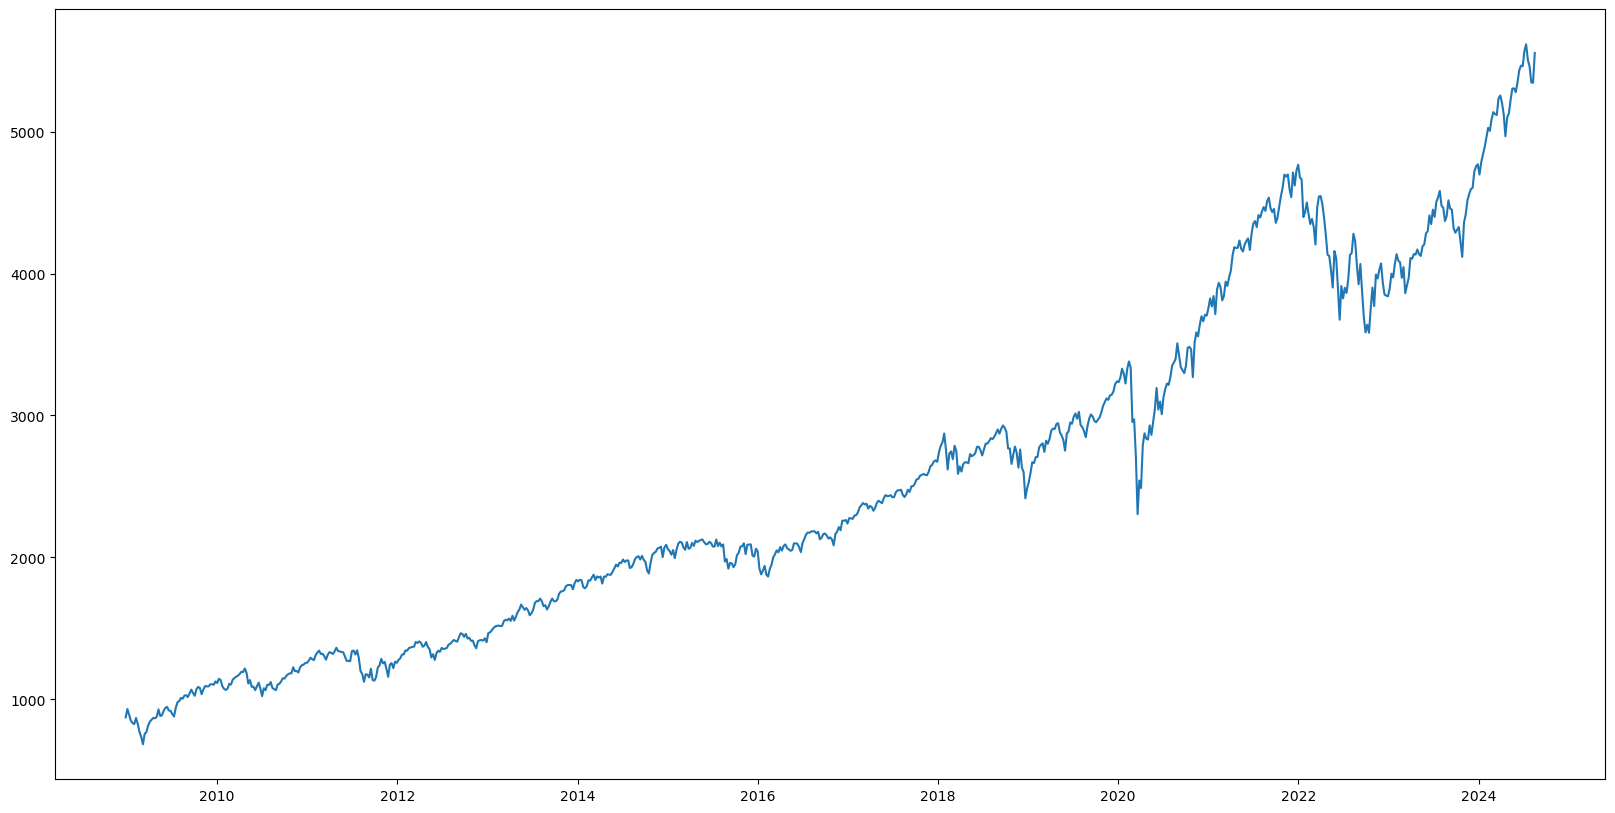

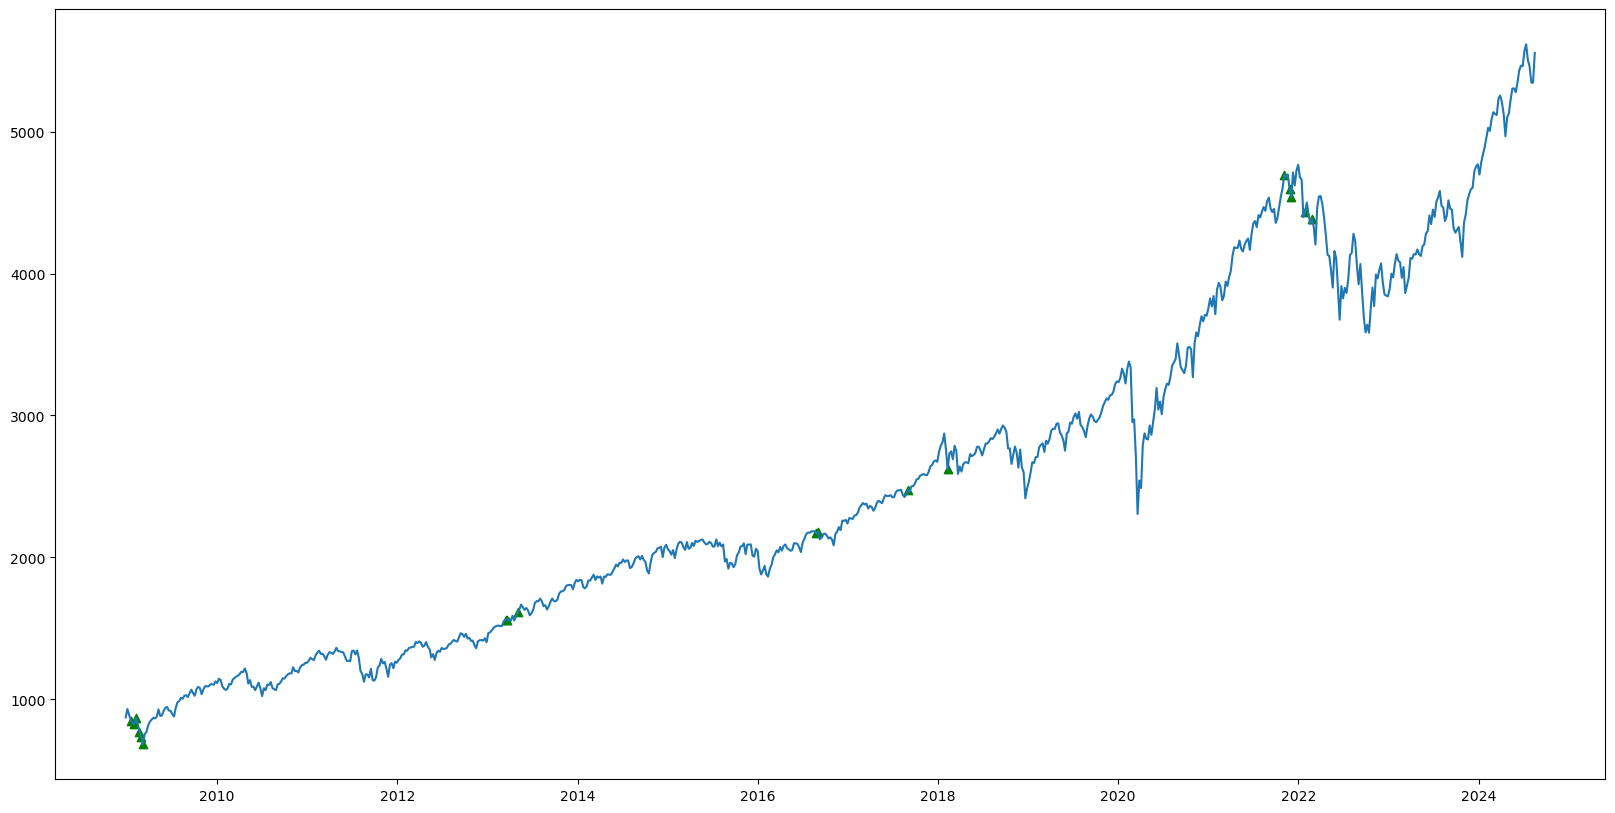

In [5]:
compute_backtest('S&P 500', '2007-01-01', 2)

In [2]:
compute_backtest('NASDAQ-100', '2007-01-01', 2)

NameError: name 'compute_backtest' is not defined

In [10]:
def compute_backtest(start_date, nb_years):

    assets = ['S&P 500', 'NASDAQ-100', 'DOW JONES',
               'EURO FX', 'BRITISH POUND', 'JAPANESE YEN', 'AUSTRALIAN DOLLAR', 'CANADIAN DOLLAR','MEXICAN PESO', 'CANADIAN DOLLAR', 'AUSTRALIAN DOLLAR',
            'GOLD',  'COPPER', 'PLATINUM', 'CRUDE OIL', 'NATURAL GAS', ]
    
    for asset in assets:

        df = pd.read_excel('Legacy/Historical/'+asset+'.xlsx')
        # start_date = datetime.strptime(start_date, '%Y-%m-%d')
        df = df[df['Date'] >= start_date].reset_index(drop=True)
        
        df['COT Commercials'] = 100 * (df['Net - Commercials'] - df['Net - Commercials'].rolling(52*nb_years).min()) / (df['Net - Commercials'].rolling(52*nb_years).max() - df['Net - Commercials'].rolling(52*nb_years).min())
        df['COT NonCommercials'] = 100 * (df['Net - NonCommercials'] - df['Net - NonCommercials'].rolling(52*nb_years).min()) / (df['Net - NonCommercials'].rolling(52*nb_years).max() - df['Net - NonCommercials'].rolling(52*nb_years).min())

        df = df.dropna().reset_index(drop=True)
        print('Begining date of positioning COT Index = '+ str(df['Date'].iloc[0]))
        
        final = pd.read_excel('Prices/Prices.xlsx', sheet_name=asset)
        final.index = final['Date']
        final = final.drop(columns=['Date'])
        final['COT Commercials'] = df['COT Commercials'].values
        final['COT NonCommercials'] = df['COT NonCommercials'].values
        
        # commercials_extreme_net_longs = []
        # commercials_extreme_net_shorts = []
        non_commercials_extreme_net_longs = []
        non_commercials_extreme_net_shorts = []
    

        for i in final.index[1:]:
            if final['COT NonCommercials'].loc[i] >= 99.5 and final['COT NonCommercials'].loc[i-timedelta(7)] <= 96:
                non_commercials_extreme_net_longs.append(i)
            elif final['COT NonCommercials'].loc[i] <= 0.5 and final['COT NonCommercials'].loc[i-timedelta(7)] >= 4:
                non_commercials_extreme_net_shorts.append(i)

        print(asset + 'vextreme net long')
        print(non_commercials_extreme_net_longs)
        plt.figure(figsize=(20,10))
        plt.plot(final.index, final[asset], label='Close Price')
        plt.scatter(non_commercials_extreme_net_longs, final[asset].loc[non_commercials_extreme_net_longs], color='green', marker='^', s=100)
        plt.show()

        print(asset + 'extreme net short')
        print(non_commercials_extreme_net_shorts)
        plt.figure(figsize=(20,10))
        plt.plot(final.index, final[asset], label='Close Price')
        plt.scatter(non_commercials_extreme_net_shorts, final[asset].loc[non_commercials_extreme_net_shorts], color='red', marker='v', s=100)
        plt.show()

Begining date of positioning COT Index = 2008-12-22 00:00:00
S&P 500vextreme net long
[Timestamp('2009-01-16 00:00:00'), Timestamp('2013-03-15 00:00:00'), Timestamp('2013-05-03 00:00:00'), Timestamp('2017-09-01 00:00:00'), Timestamp('2018-02-09 00:00:00'), Timestamp('2021-11-05 00:00:00'), Timestamp('2022-01-28 00:00:00'), Timestamp('2022-02-25 00:00:00')]


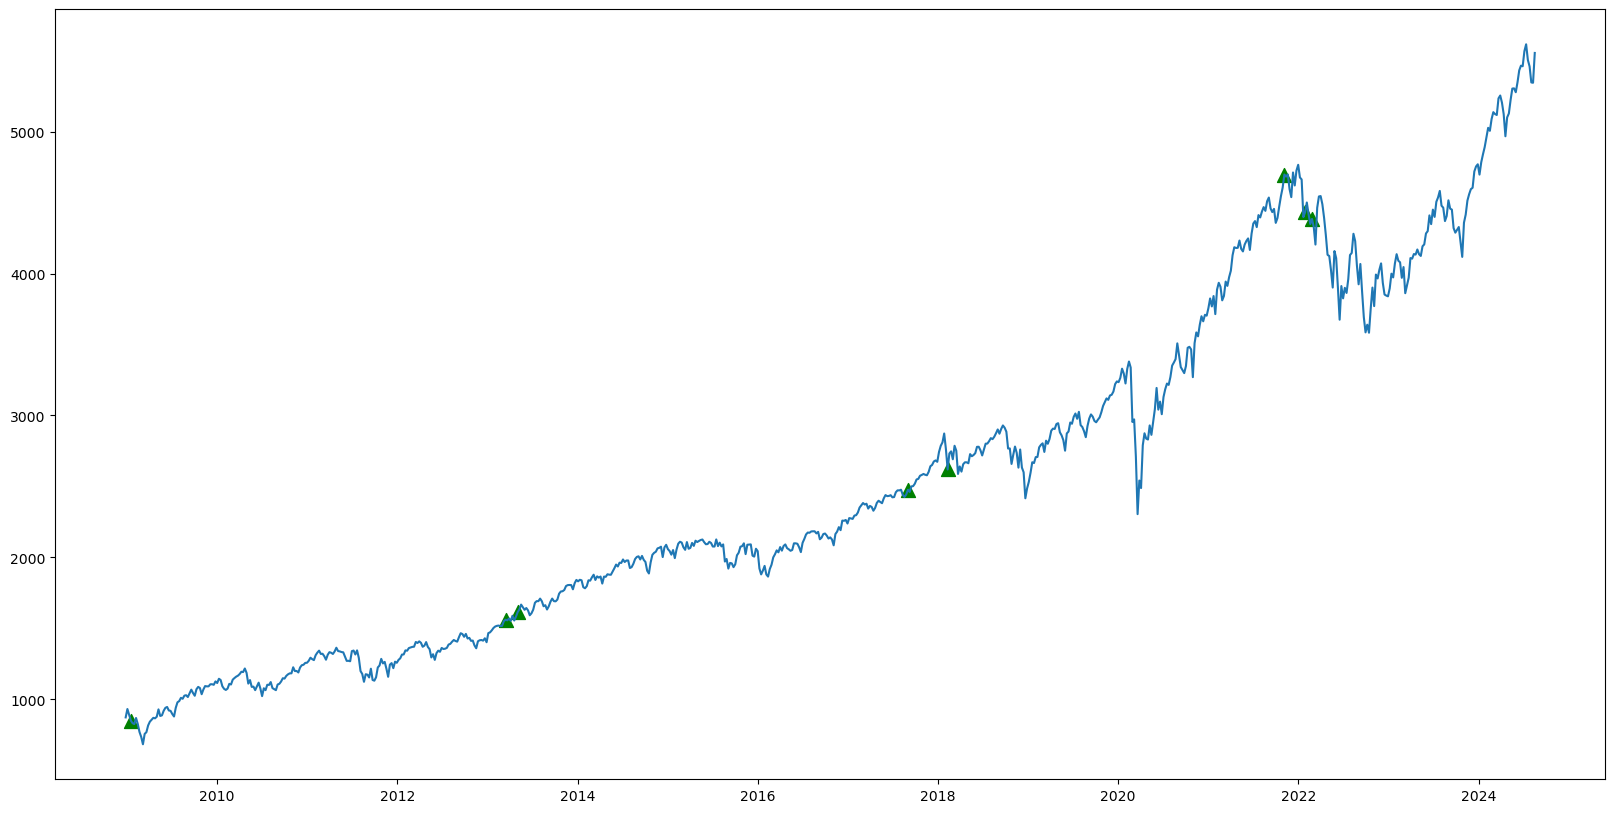

S&P 500extreme net short
[Timestamp('2010-09-24 00:00:00'), Timestamp('2010-11-12 00:00:00'), Timestamp('2010-11-26 00:00:00'), Timestamp('2010-12-10 00:00:00'), Timestamp('2011-09-02 00:00:00'), Timestamp('2011-10-21 00:00:00'), Timestamp('2015-07-03 00:00:00'), Timestamp('2015-09-04 00:00:00'), Timestamp('2015-10-09 00:00:00'), Timestamp('2019-01-25 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2022-06-24 00:00:00'), Timestamp('2023-04-07 00:00:00')]


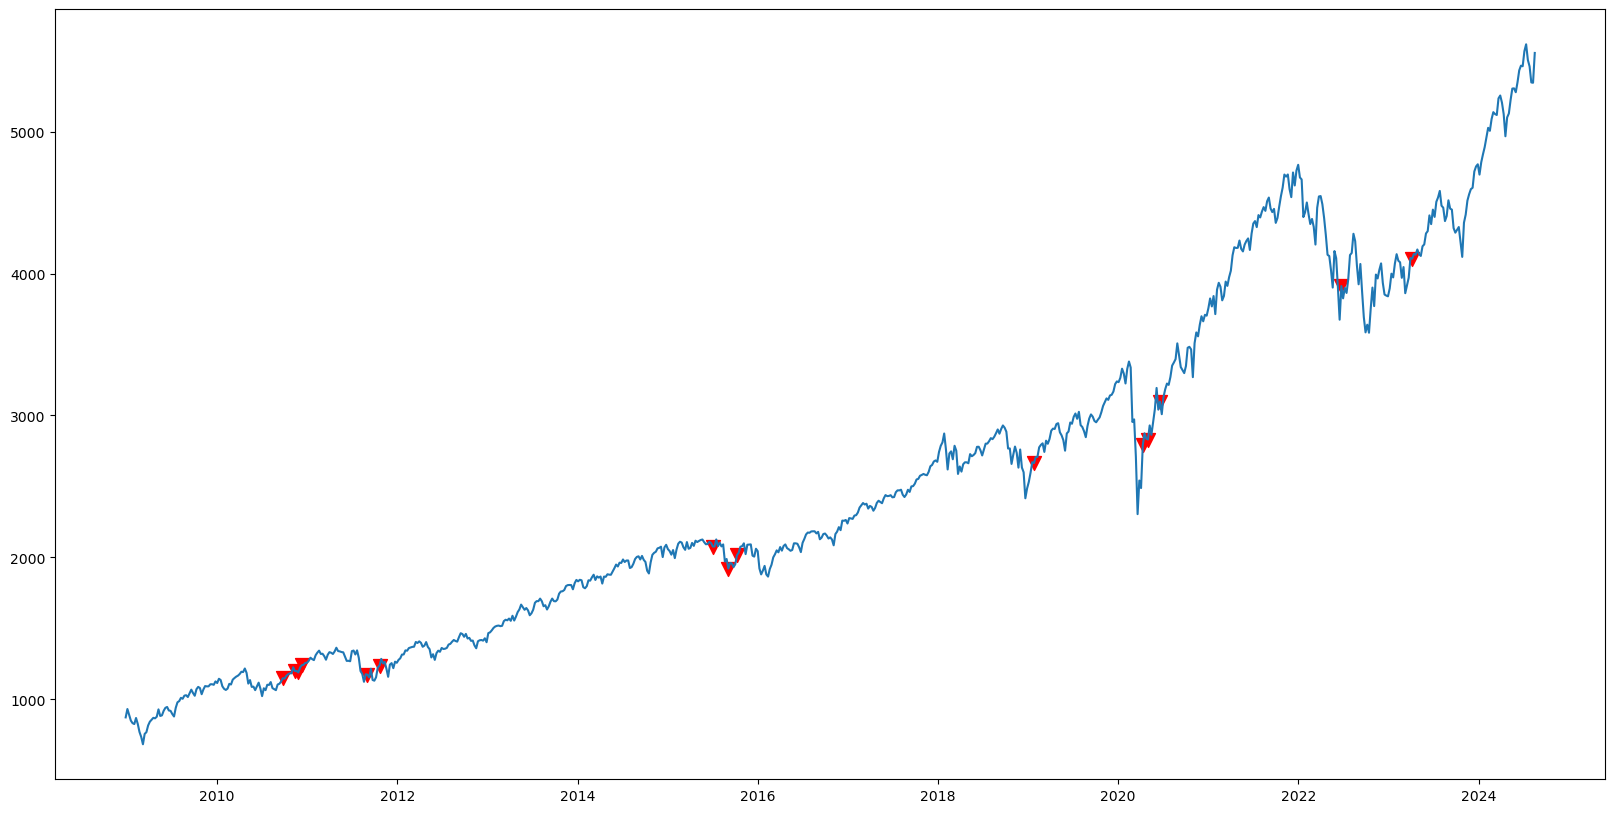

Begining date of positioning COT Index = 2008-12-22 00:00:00
NASDAQ-100vextreme net long
[Timestamp('2010-10-01 00:00:00'), Timestamp('2011-05-06 00:00:00'), Timestamp('2012-02-03 00:00:00'), Timestamp('2012-03-16 00:00:00'), Timestamp('2012-08-31 00:00:00'), Timestamp('2013-05-31 00:00:00'), Timestamp('2016-07-22 00:00:00'), Timestamp('2016-10-21 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-02-02 00:00:00')]


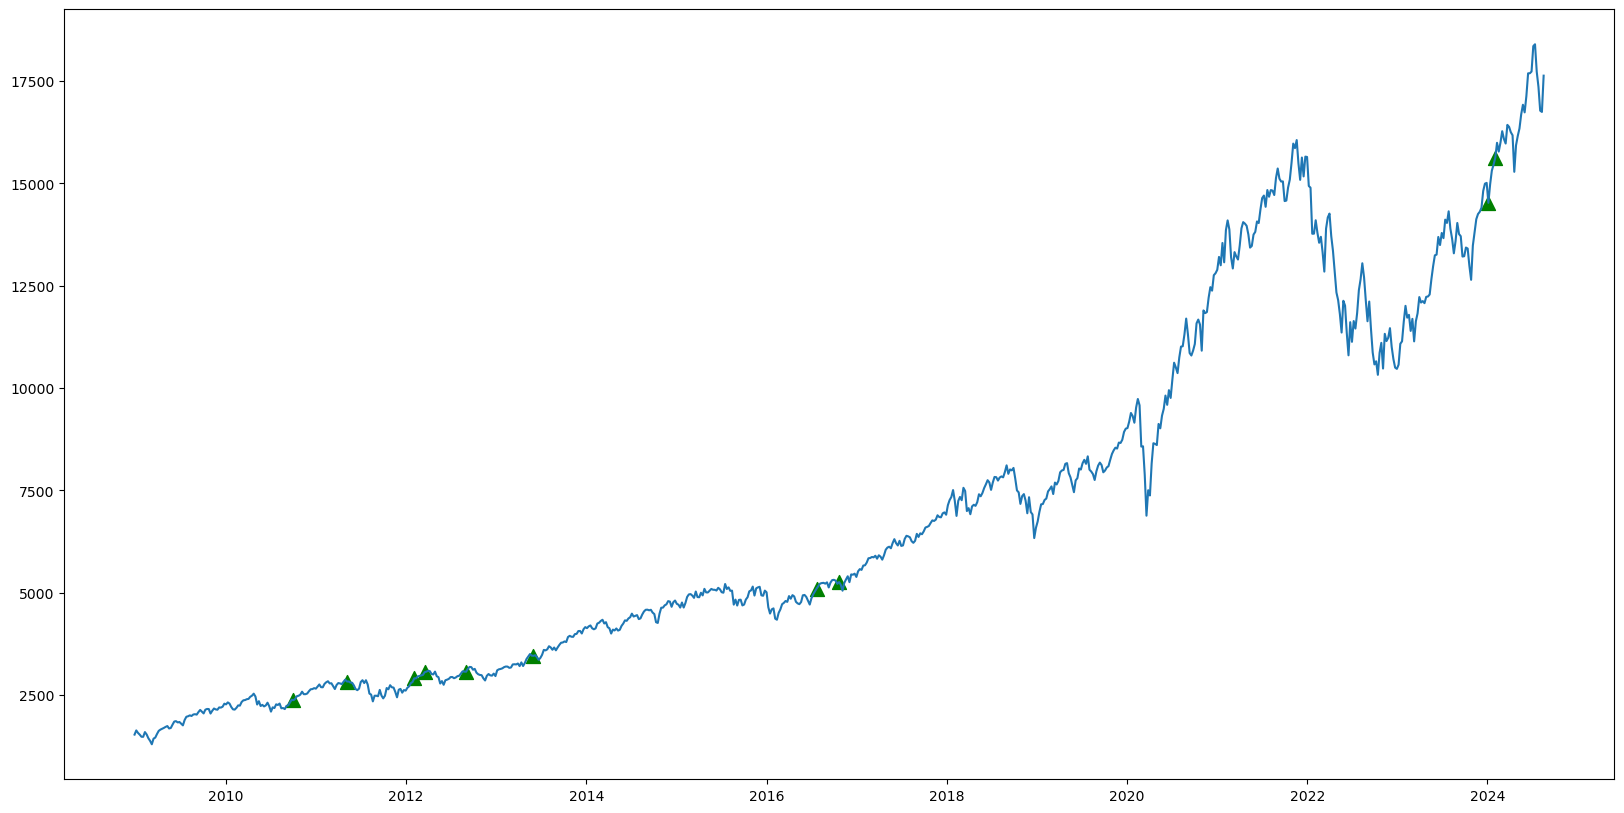

NASDAQ-100extreme net short
[Timestamp('2010-09-03 00:00:00'), Timestamp('2015-01-30 00:00:00'), Timestamp('2015-08-28 00:00:00'), Timestamp('2016-05-13 00:00:00'), Timestamp('2018-02-16 00:00:00'), Timestamp('2018-04-06 00:00:00'), Timestamp('2018-04-27 00:00:00'), Timestamp('2020-09-18 00:00:00'), Timestamp('2023-01-27 00:00:00')]


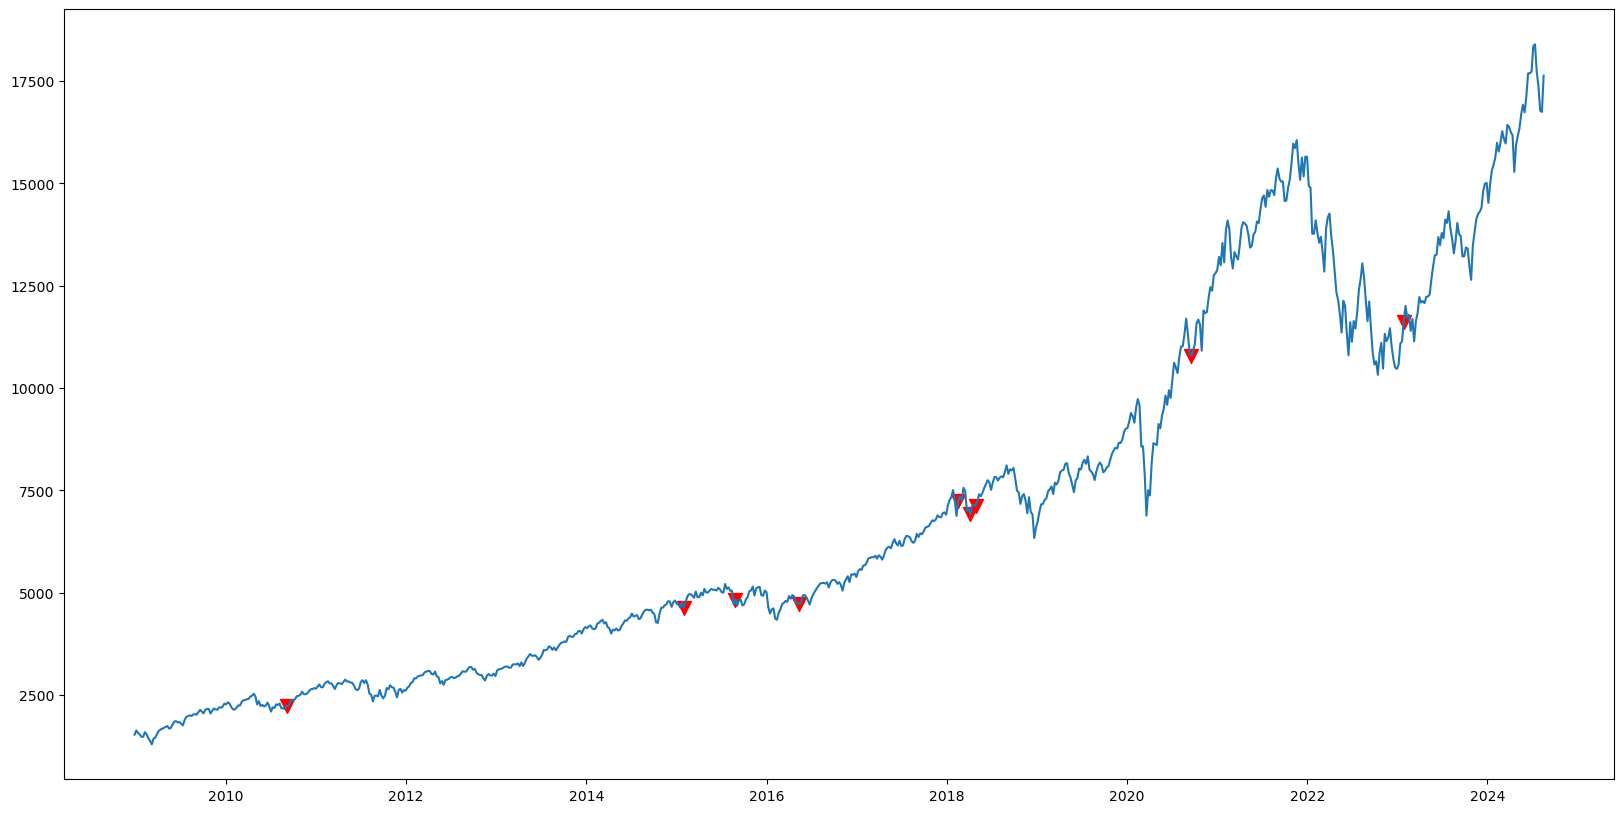

Begining date of positioning COT Index = 2008-12-22 00:00:00
DOW JONESvextreme net long
[Timestamp('2010-03-12 00:00:00'), Timestamp('2010-10-01 00:00:00'), Timestamp('2011-04-01 00:00:00'), Timestamp('2011-05-06 00:00:00'), Timestamp('2013-06-07 00:00:00'), Timestamp('2013-06-21 00:00:00'), Timestamp('2013-09-27 00:00:00'), Timestamp('2016-06-17 00:00:00'), Timestamp('2016-07-08 00:00:00'), Timestamp('2017-08-18 00:00:00'), Timestamp('2017-09-29 00:00:00'), Timestamp('2023-12-22 00:00:00'), Timestamp('2024-02-02 00:00:00')]


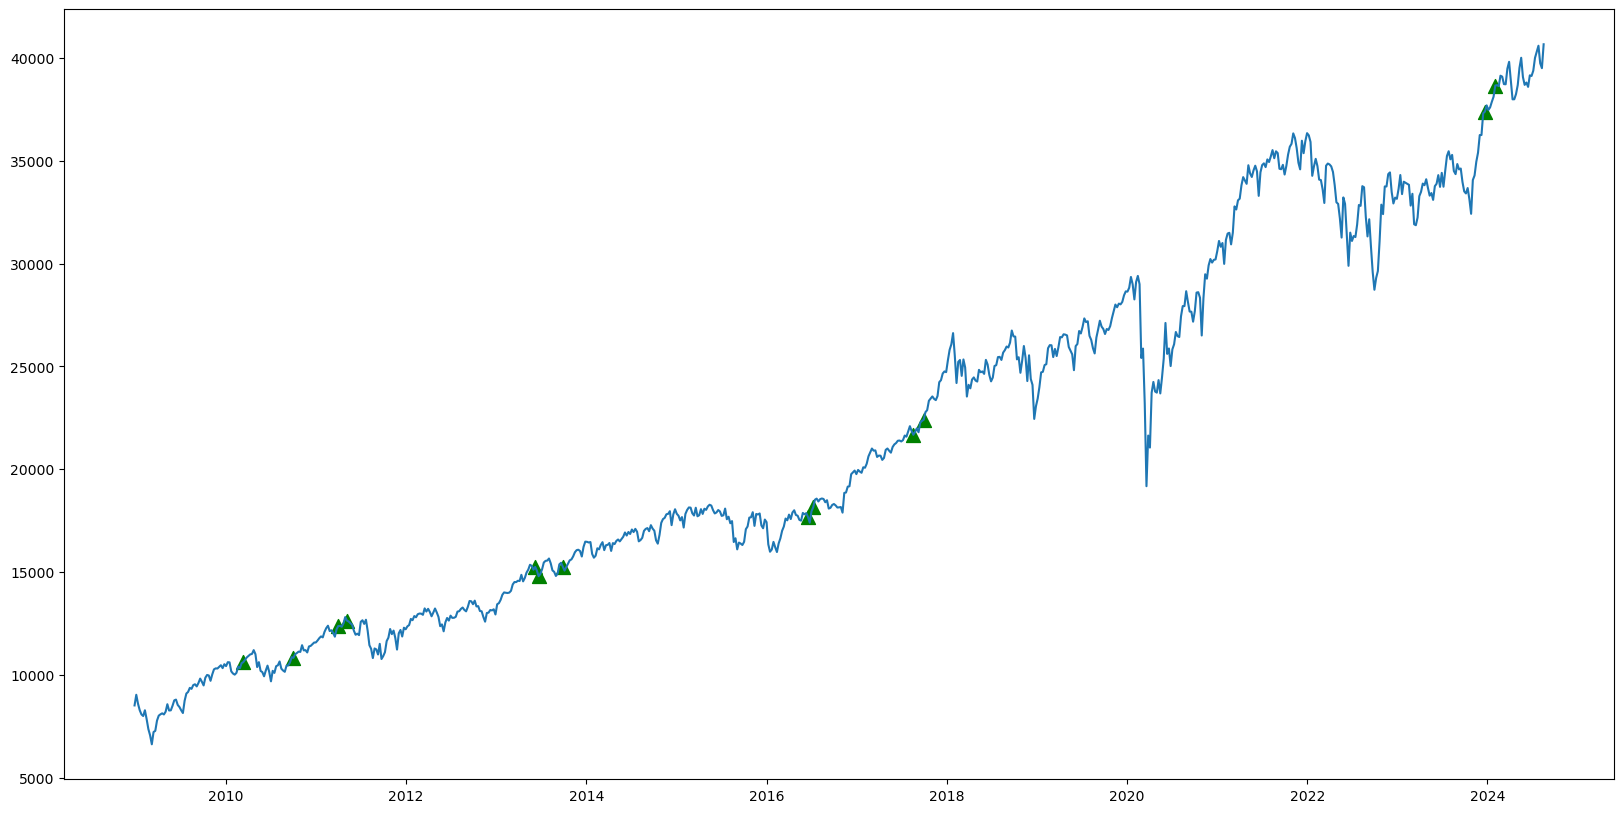

DOW JONESextreme net short
[Timestamp('2012-11-23 00:00:00'), Timestamp('2014-02-14 00:00:00'), Timestamp('2015-08-14 00:00:00'), Timestamp('2018-04-27 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2023-10-06 00:00:00')]


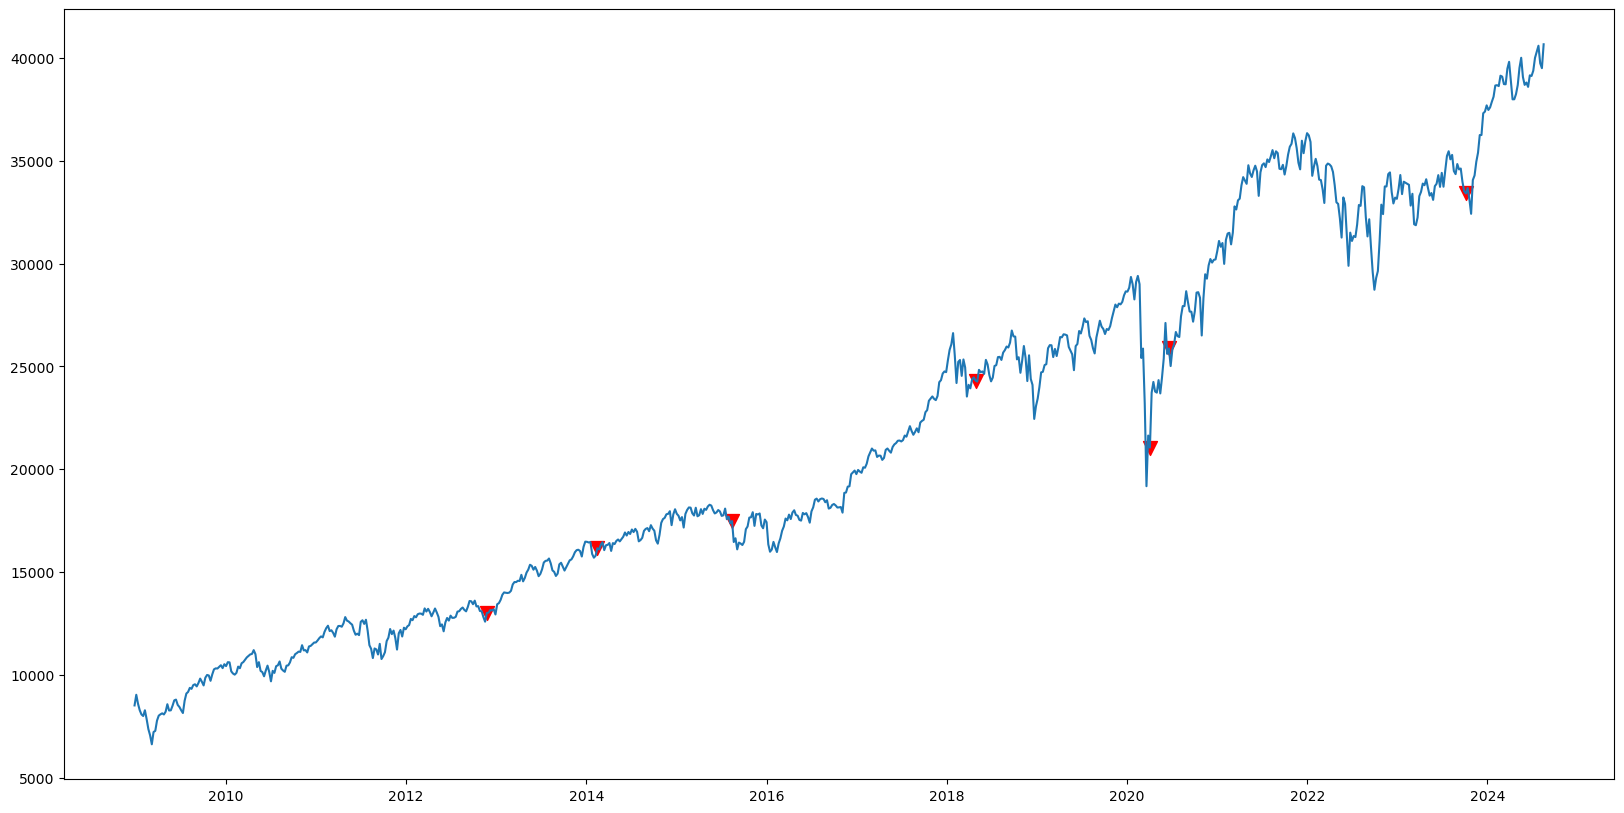

Begining date of positioning COT Index = 2008-12-22 00:00:00
EURO FXvextreme net long
[Timestamp('2013-08-23 00:00:00'), Timestamp('2017-03-24 00:00:00'), Timestamp('2017-05-05 00:00:00'), Timestamp('2018-01-05 00:00:00'), Timestamp('2018-04-13 00:00:00'), Timestamp('2023-02-03 00:00:00')]


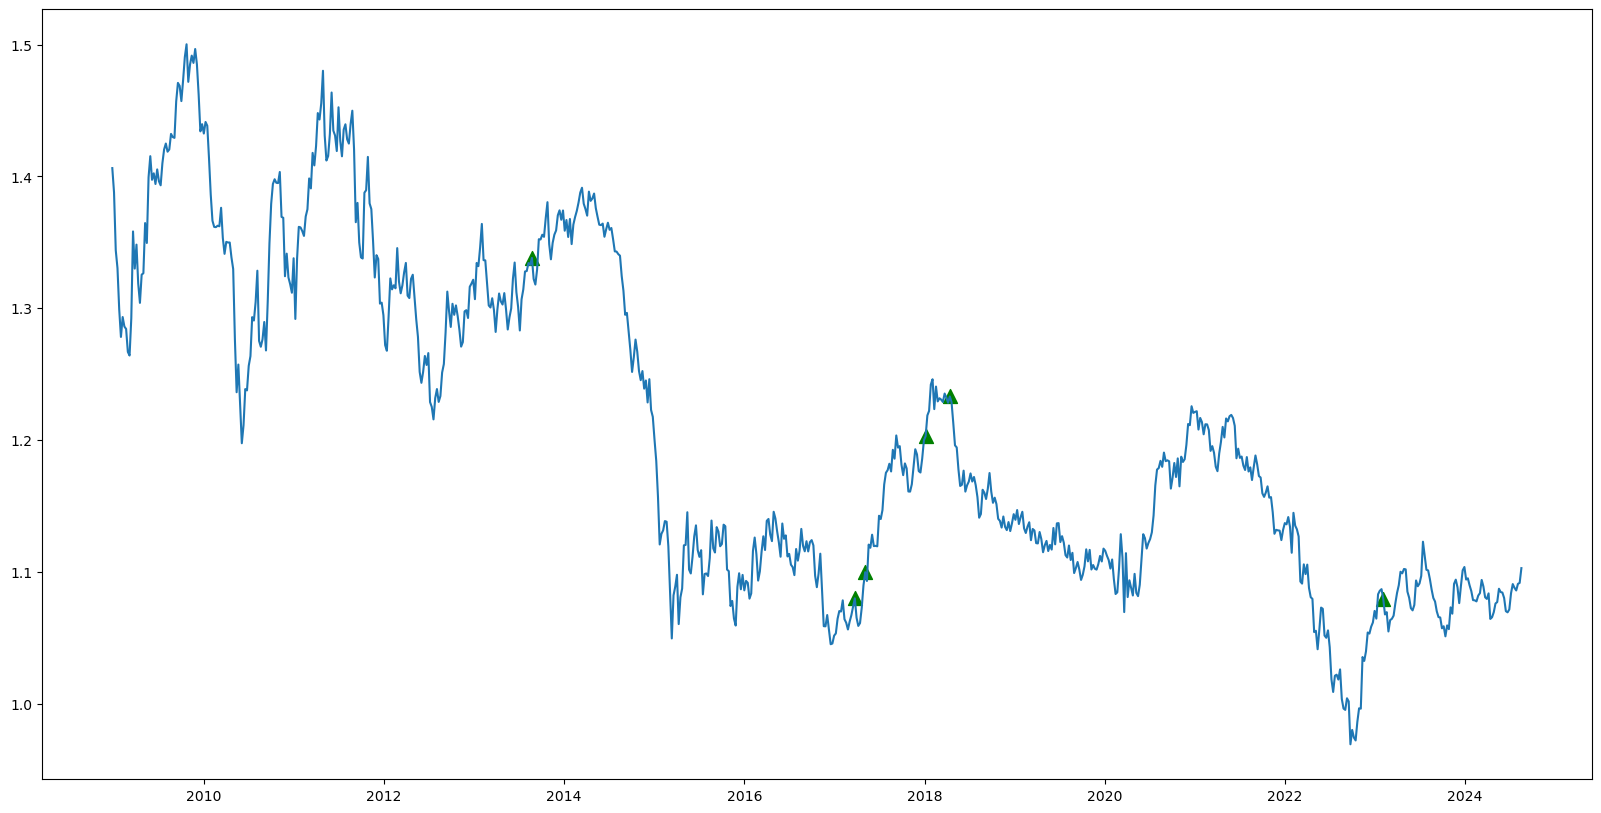

EURO FXextreme net short
[Timestamp('2010-03-26 00:00:00'), Timestamp('2010-04-30 00:00:00'), Timestamp('2011-12-16 00:00:00'), Timestamp('2012-05-18 00:00:00'), Timestamp('2015-01-23 00:00:00'), Timestamp('2019-02-15 00:00:00'), Timestamp('2020-02-28 00:00:00')]


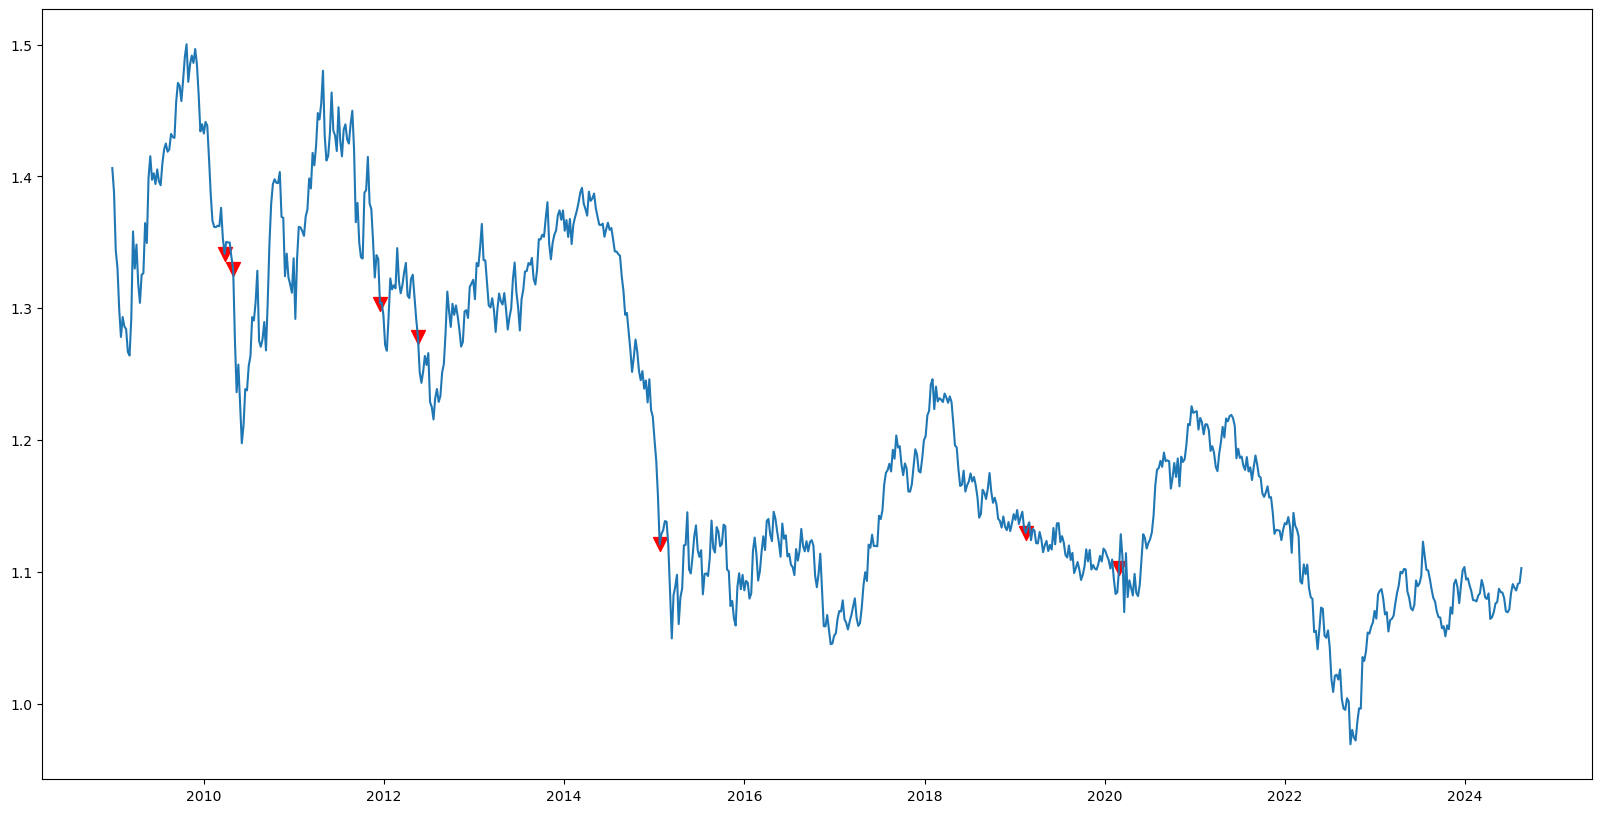

Begining date of positioning COT Index = 2008-12-22 00:00:00
BRITISH POUNDvextreme net long
[Timestamp('2010-08-06 00:00:00'), Timestamp('2010-10-08 00:00:00'), Timestamp('2010-11-05 00:00:00'), Timestamp('2014-06-20 00:00:00'), Timestamp('2017-12-22 00:00:00'), Timestamp('2018-03-30 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2024-07-12 00:00:00')]


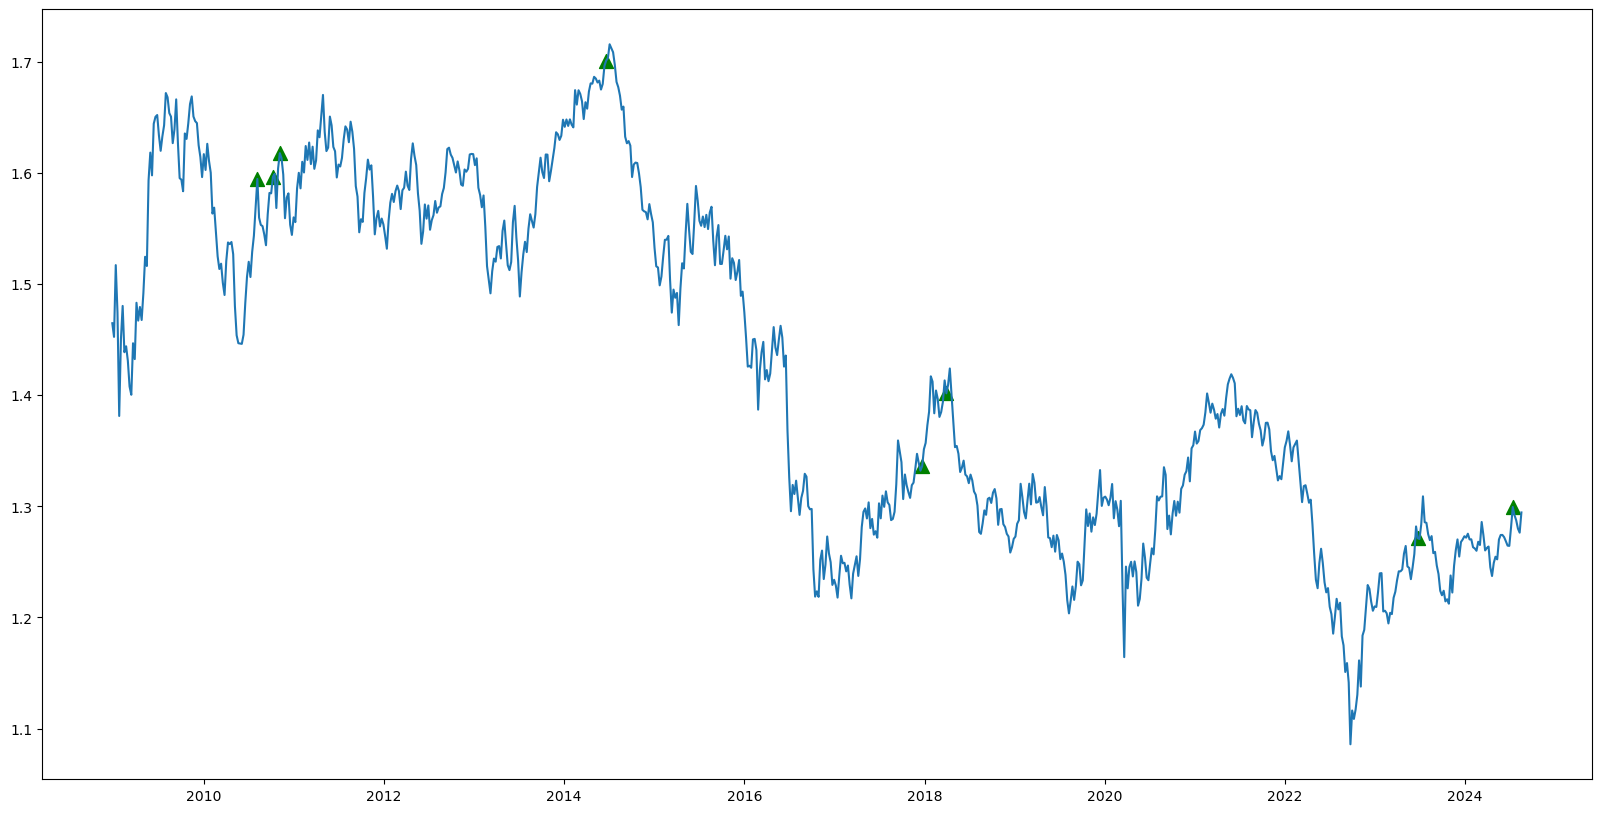

BRITISH POUNDextreme net short
[Timestamp('2010-03-26 00:00:00'), Timestamp('2010-05-14 00:00:00'), Timestamp('2013-05-24 00:00:00'), Timestamp('2016-01-29 00:00:00'), Timestamp('2016-03-11 00:00:00'), Timestamp('2016-06-10 00:00:00'), Timestamp('2016-07-22 00:00:00'), Timestamp('2016-10-07 00:00:00'), Timestamp('2017-03-17 00:00:00'), Timestamp('2022-04-22 00:00:00')]


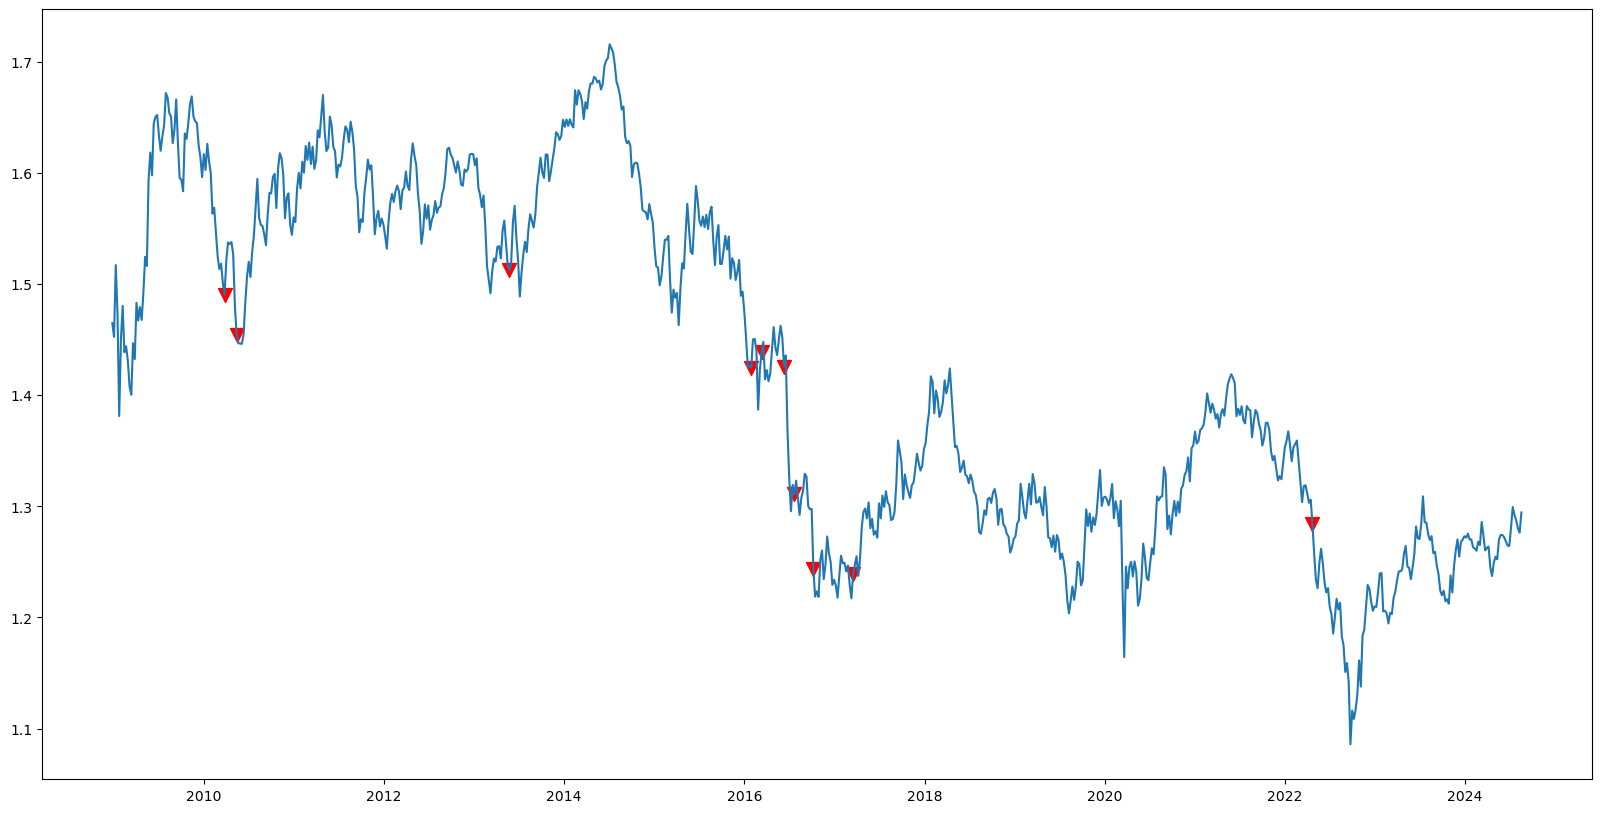

Begining date of positioning COT Index = 2008-12-22 00:00:00
JAPANESE YENvextreme net long
[Timestamp('2011-08-05 00:00:00'), Timestamp('2015-10-23 00:00:00'), Timestamp('2016-01-08 00:00:00'), Timestamp('2019-08-09 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-05-29 00:00:00'), Timestamp('2020-11-13 00:00:00'), Timestamp('2024-08-09 00:00:00')]


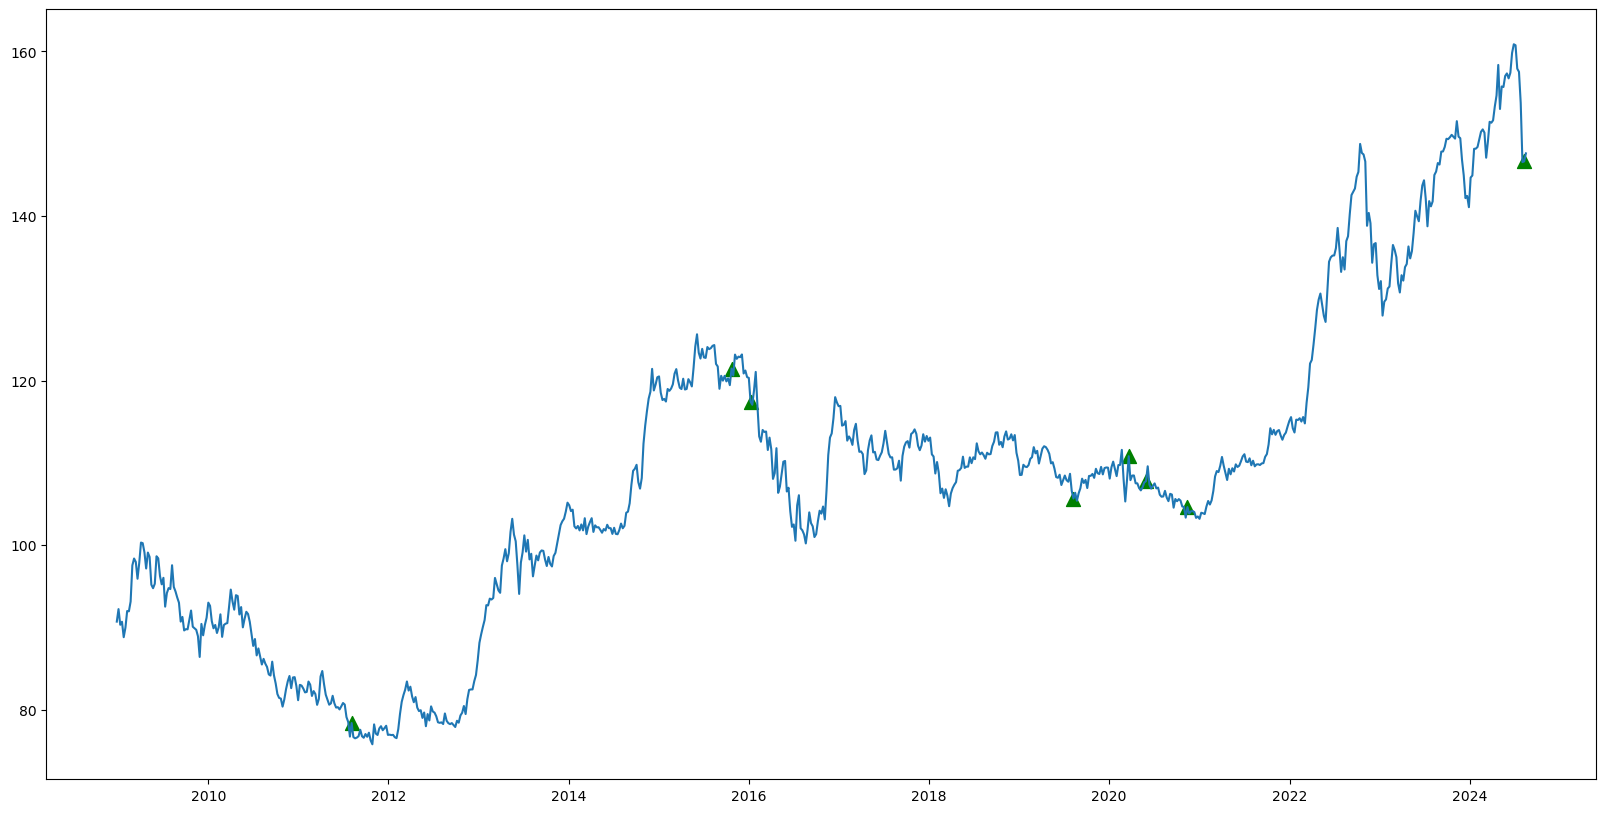

JAPANESE YENextreme net short
[Timestamp('2010-04-02 00:00:00'), Timestamp('2010-05-07 00:00:00'), Timestamp('2012-03-30 00:00:00'), Timestamp('2012-11-30 00:00:00'), Timestamp('2013-03-15 00:00:00'), Timestamp('2017-07-14 00:00:00'), Timestamp('2017-11-10 00:00:00'), Timestamp('2021-07-02 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-11-17 00:00:00'), Timestamp('2024-03-01 00:00:00')]


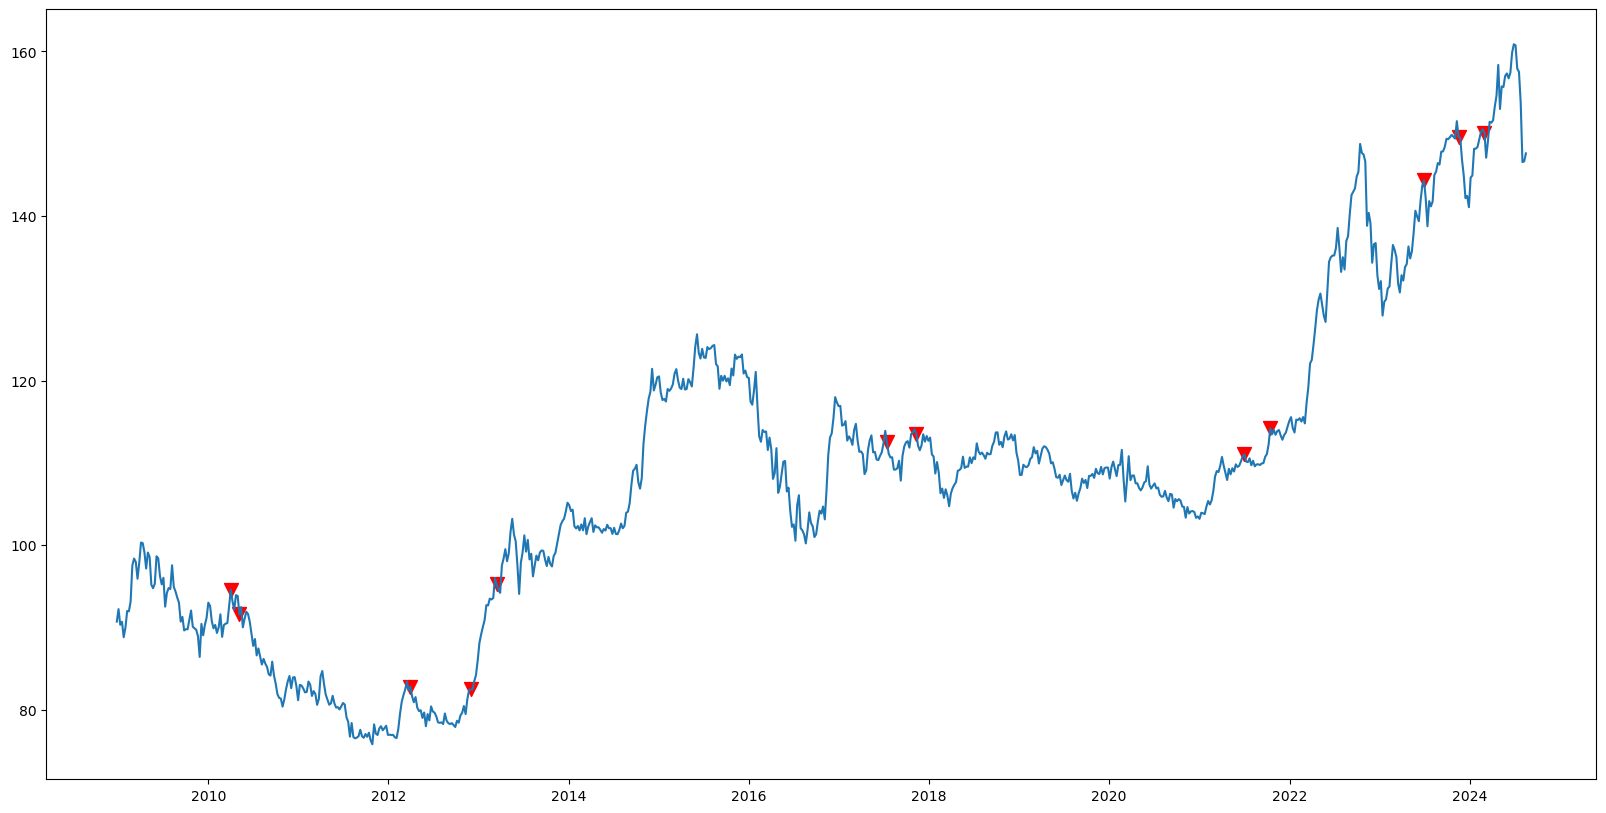

Begining date of positioning COT Index = 2008-12-22 00:00:00
AUSTRALIAN DOLLARvextreme net long
[Timestamp('2011-04-01 00:00:00'), Timestamp('2012-12-07 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-09-18 00:00:00'), Timestamp('2024-06-28 00:00:00')]


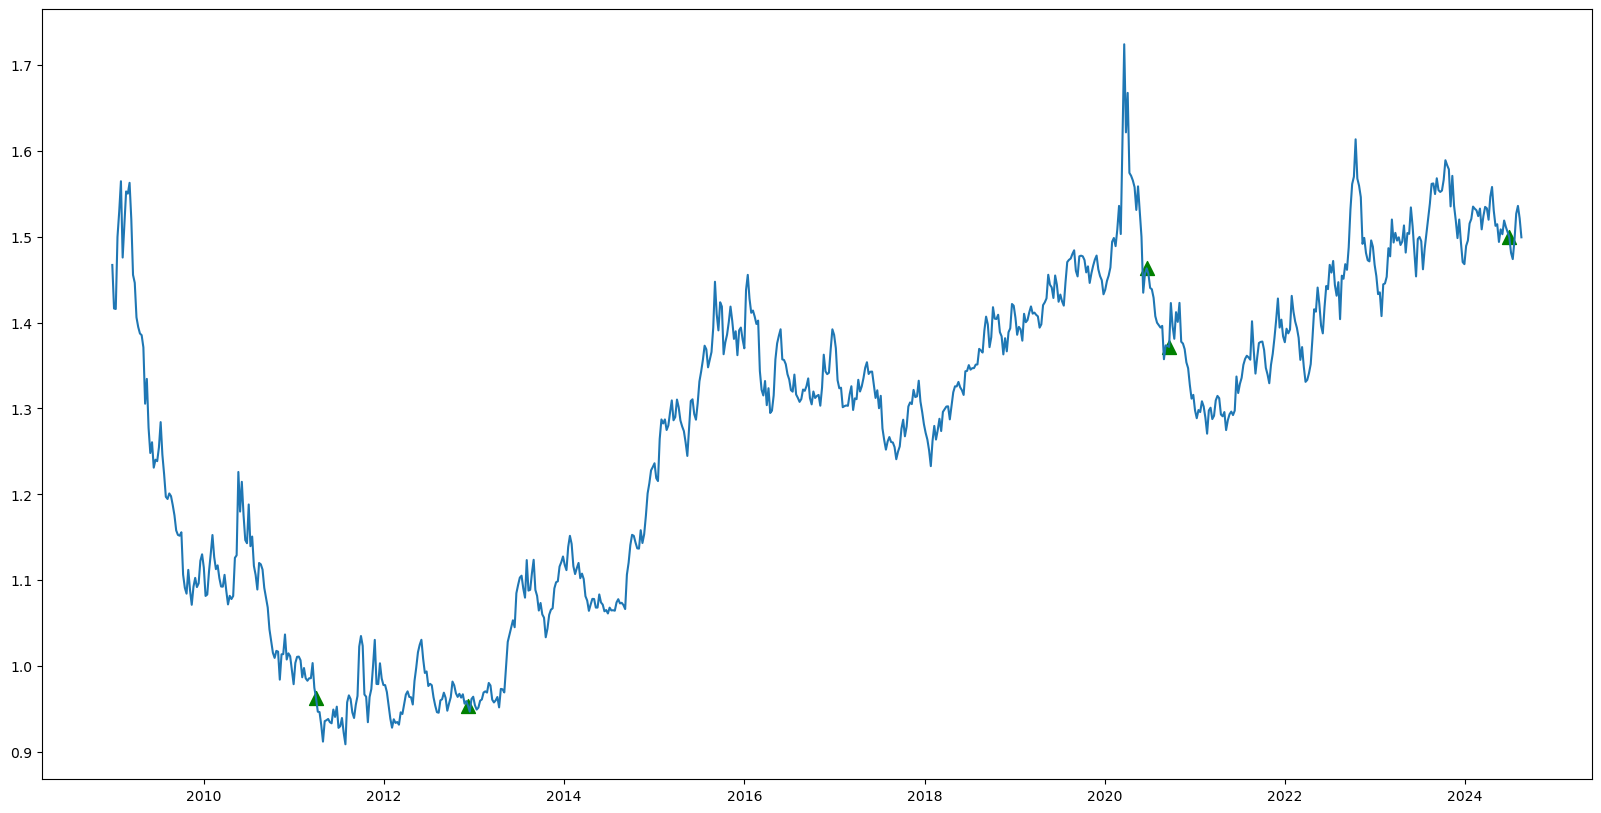

AUSTRALIAN DOLLARextreme net short
[Timestamp('2011-09-30 00:00:00'), Timestamp('2012-05-18 00:00:00'), Timestamp('2013-06-07 00:00:00'), Timestamp('2013-07-19 00:00:00'), Timestamp('2015-03-13 00:00:00'), Timestamp('2018-06-22 00:00:00'), Timestamp('2018-09-21 00:00:00'), Timestamp('2023-09-22 00:00:00'), Timestamp('2024-03-22 00:00:00')]


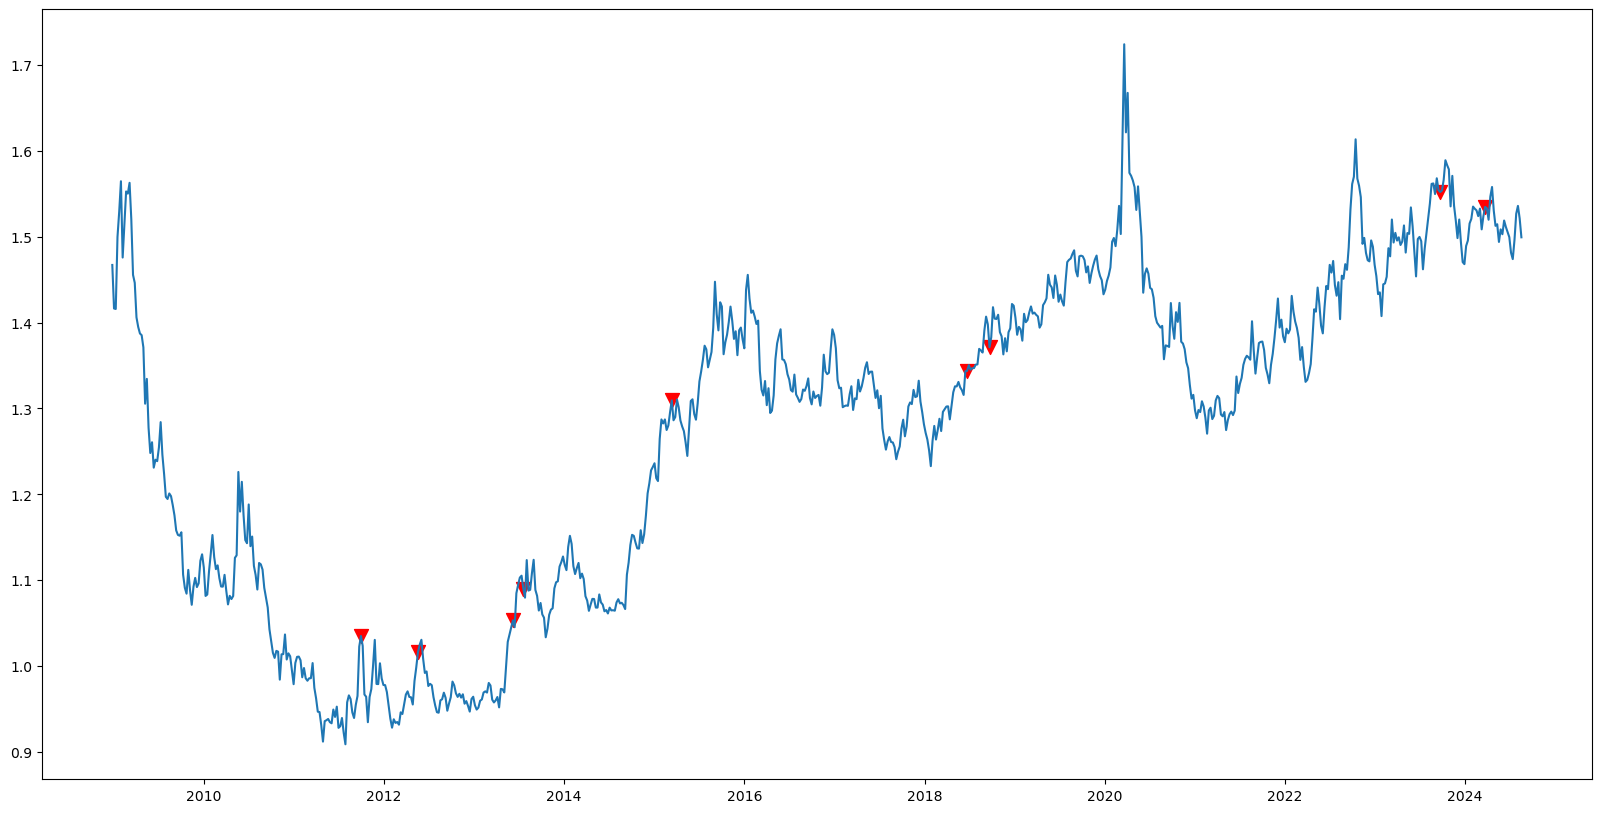

Begining date of positioning COT Index = 2008-12-22 00:00:00
CANADIAN DOLLARvextreme net long
[Timestamp('2010-03-12 00:00:00'), Timestamp('2011-03-04 00:00:00'), Timestamp('2012-09-14 00:00:00'), Timestamp('2016-05-13 00:00:00'), Timestamp('2016-06-03 00:00:00'), Timestamp('2019-11-08 00:00:00')]


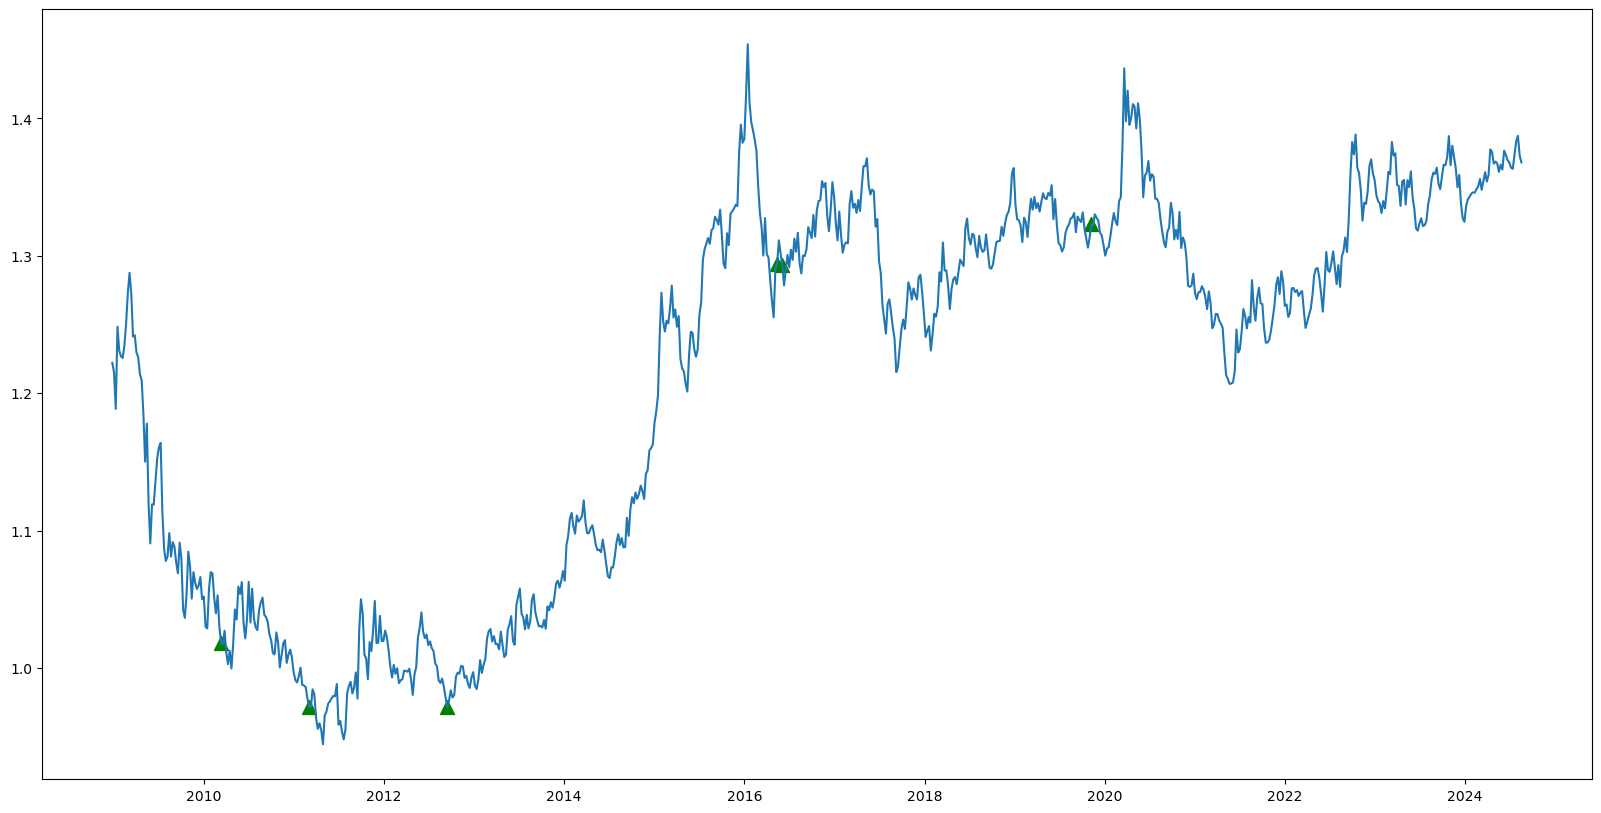

CANADIAN DOLLARextreme net short
[Timestamp('2011-09-16 00:00:00'), Timestamp('2011-10-14 00:00:00'), Timestamp('2011-12-23 00:00:00'), Timestamp('2013-03-08 00:00:00'), Timestamp('2017-05-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-03-24 00:00:00'), Timestamp('2023-11-10 00:00:00'), Timestamp('2024-04-19 00:00:00'), Timestamp('2024-07-26 00:00:00')]


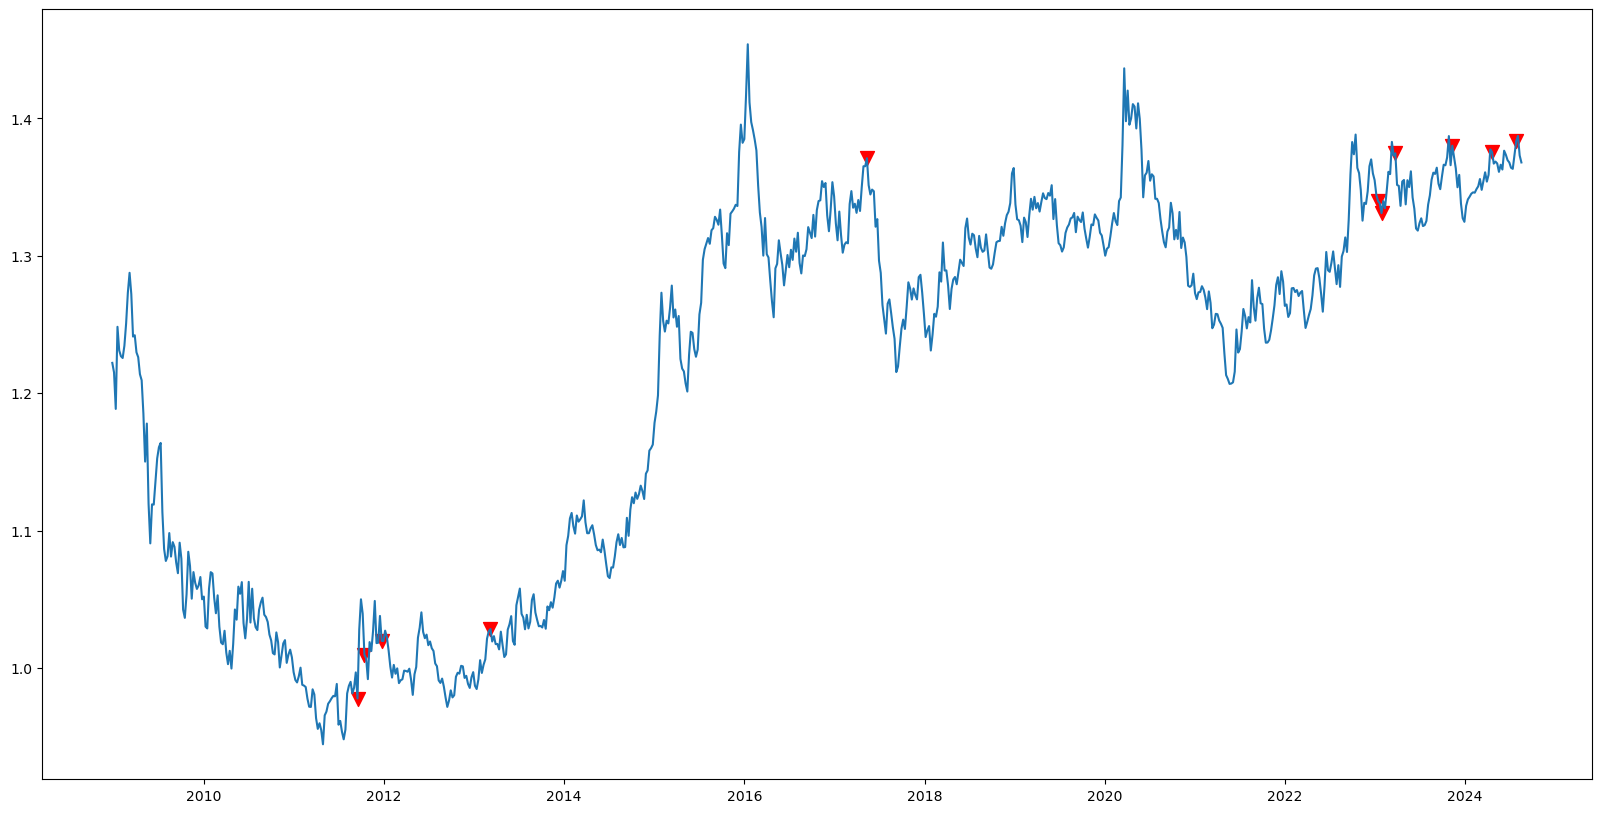

Begining date of positioning COT Index = 2008-12-22 00:00:00
MEXICAN PESOvextreme net long
[Timestamp('2012-09-28 00:00:00'), Timestamp('2012-12-14 00:00:00'), Timestamp('2013-01-18 00:00:00'), Timestamp('2013-04-19 00:00:00'), Timestamp('2017-04-21 00:00:00'), Timestamp('2017-06-02 00:00:00'), Timestamp('2017-07-14 00:00:00'), Timestamp('2017-09-08 00:00:00'), Timestamp('2019-03-22 00:00:00'), Timestamp('2020-01-10 00:00:00'), Timestamp('2022-03-11 00:00:00'), Timestamp('2022-11-11 00:00:00'), Timestamp('2023-05-12 00:00:00'), Timestamp('2024-02-16 00:00:00'), Timestamp('2024-03-08 00:00:00')]


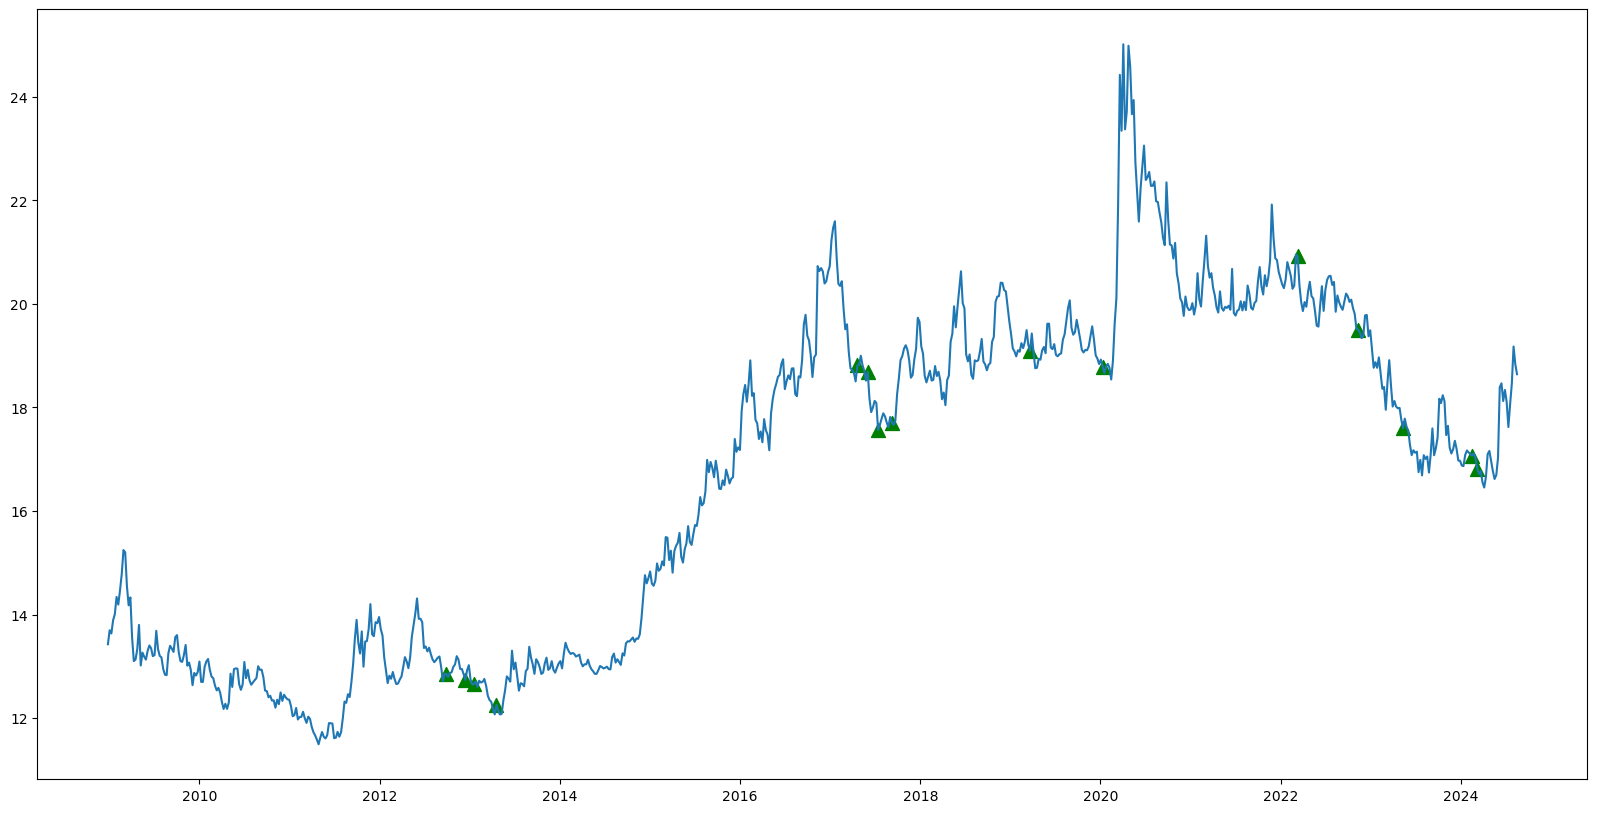

MEXICAN PESOextreme net short
[Timestamp('2009-10-09 00:00:00'), Timestamp('2011-11-25 00:00:00'), Timestamp('2014-01-31 00:00:00'), Timestamp('2015-07-10 00:00:00'), Timestamp('2016-09-23 00:00:00'), Timestamp('2021-03-19 00:00:00'), Timestamp('2021-10-08 00:00:00')]


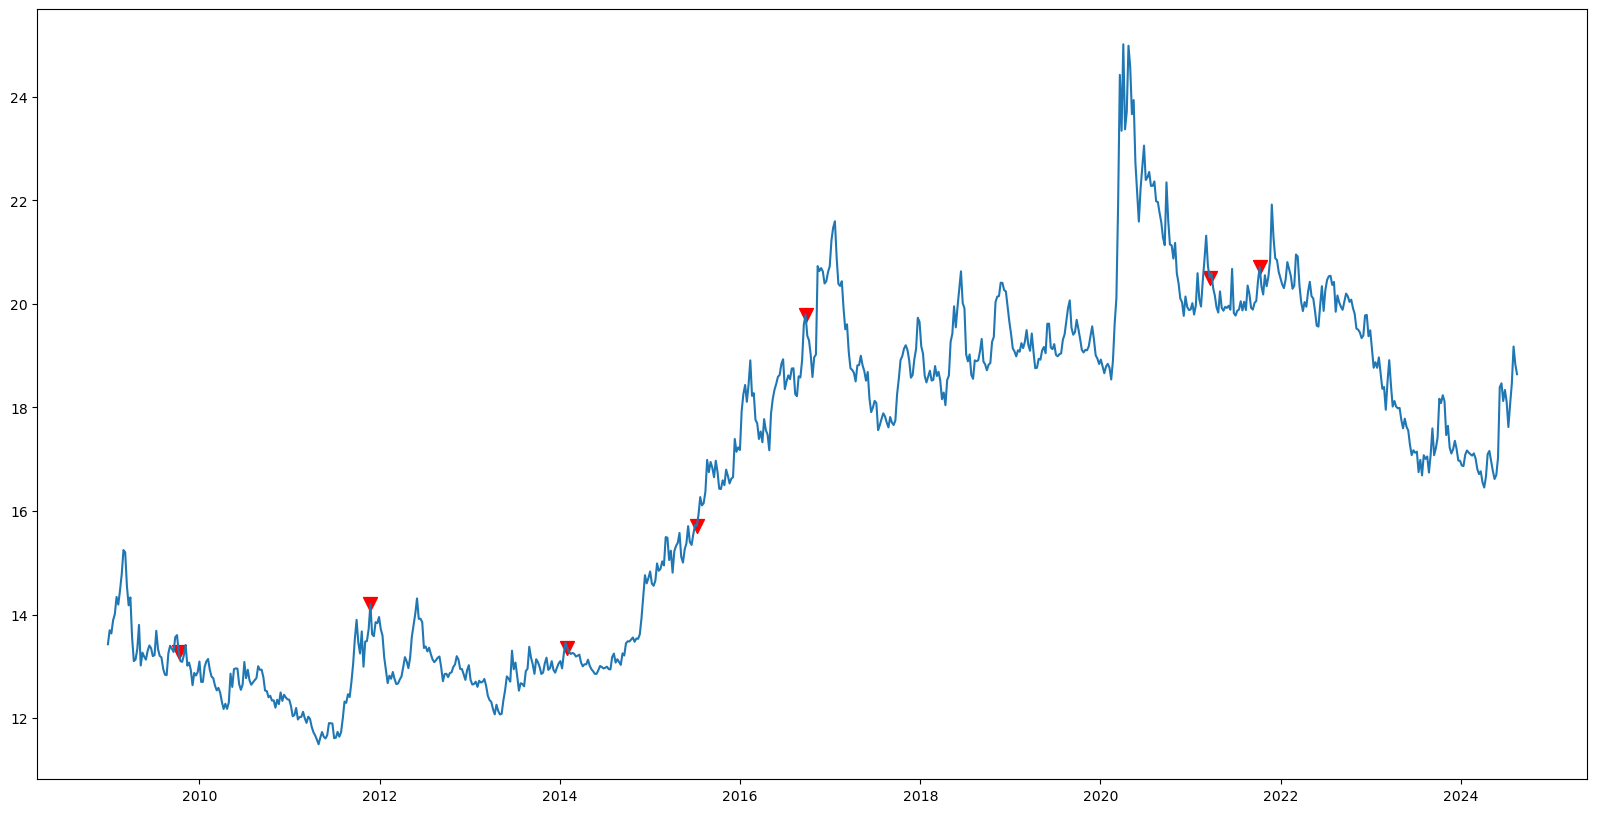

Begining date of positioning COT Index = 2008-12-22 00:00:00
CANADIAN DOLLARvextreme net long
[Timestamp('2010-03-12 00:00:00'), Timestamp('2011-03-04 00:00:00'), Timestamp('2012-09-14 00:00:00'), Timestamp('2016-05-13 00:00:00'), Timestamp('2016-06-03 00:00:00'), Timestamp('2019-11-08 00:00:00')]


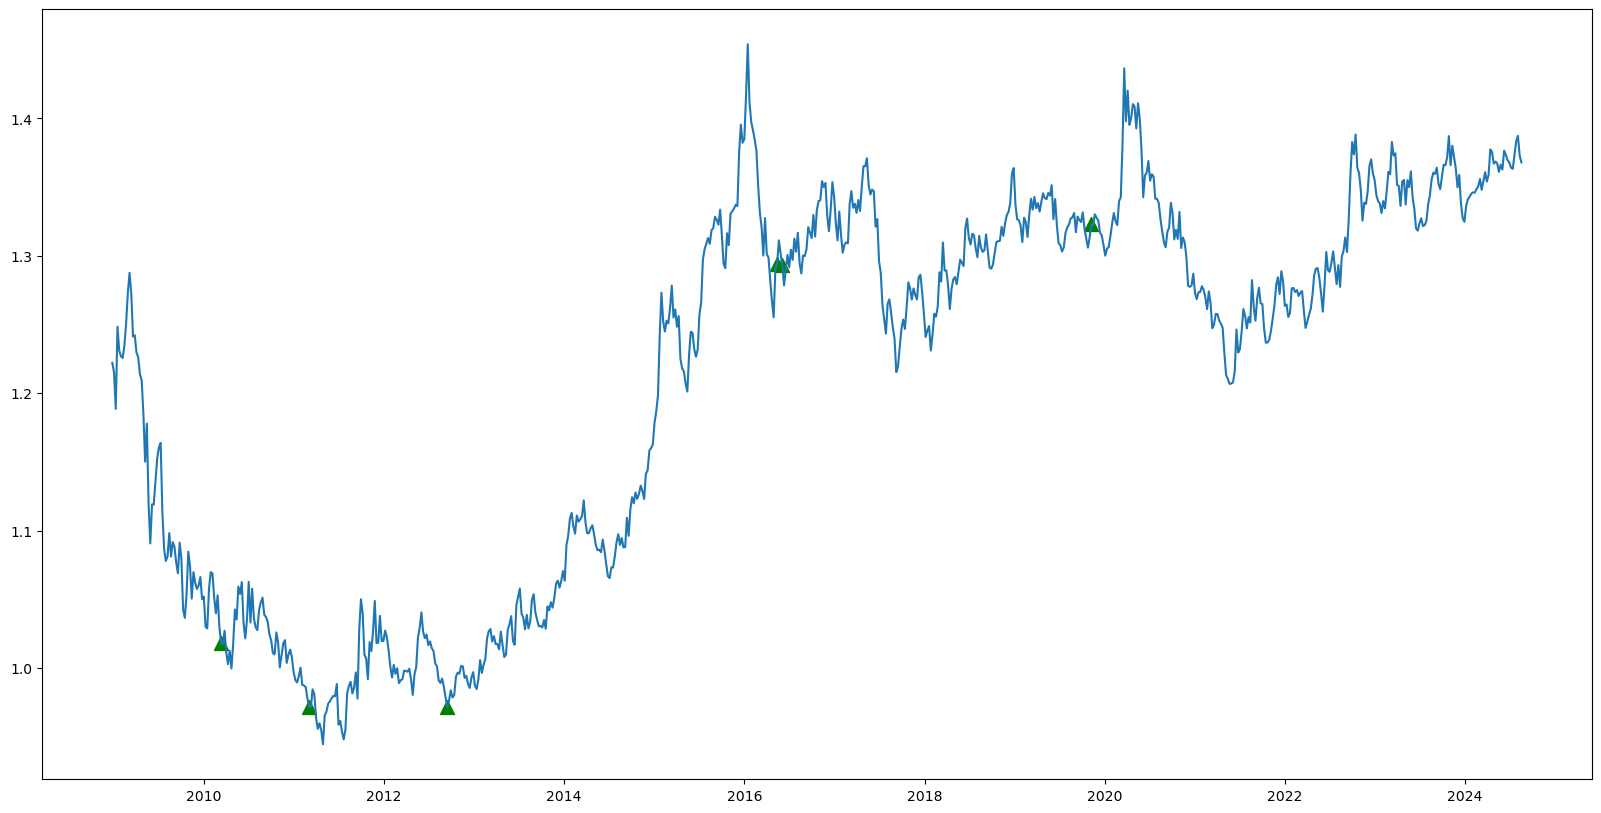

CANADIAN DOLLARextreme net short
[Timestamp('2011-09-16 00:00:00'), Timestamp('2011-10-14 00:00:00'), Timestamp('2011-12-23 00:00:00'), Timestamp('2013-03-08 00:00:00'), Timestamp('2017-05-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-03-24 00:00:00'), Timestamp('2023-11-10 00:00:00'), Timestamp('2024-04-19 00:00:00'), Timestamp('2024-07-26 00:00:00')]


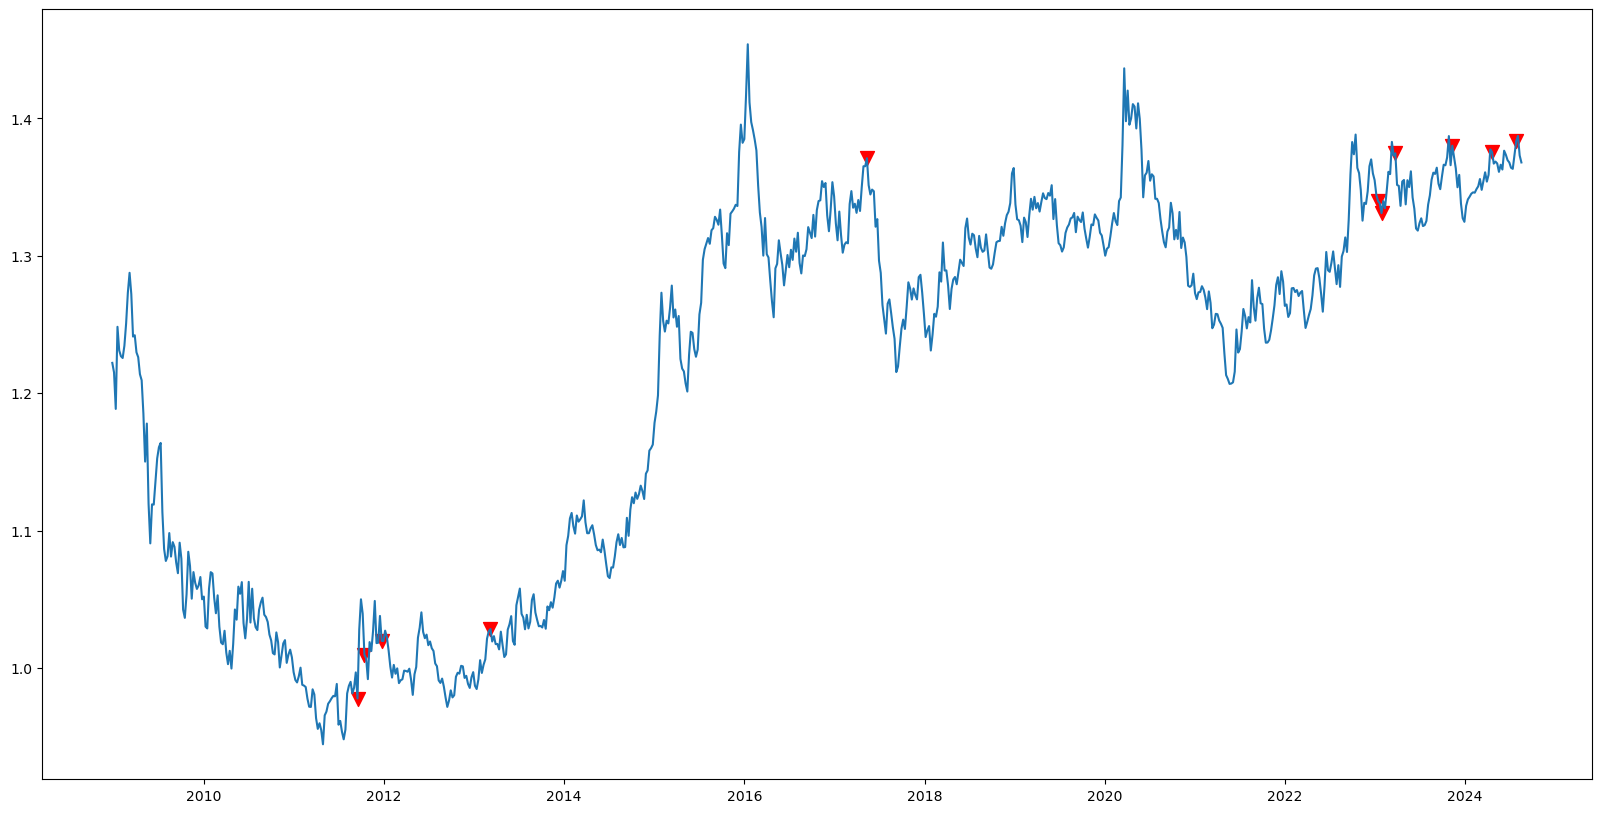

Begining date of positioning COT Index = 2008-12-22 00:00:00
AUSTRALIAN DOLLARvextreme net long
[Timestamp('2011-04-01 00:00:00'), Timestamp('2012-12-07 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-09-18 00:00:00'), Timestamp('2024-06-28 00:00:00')]


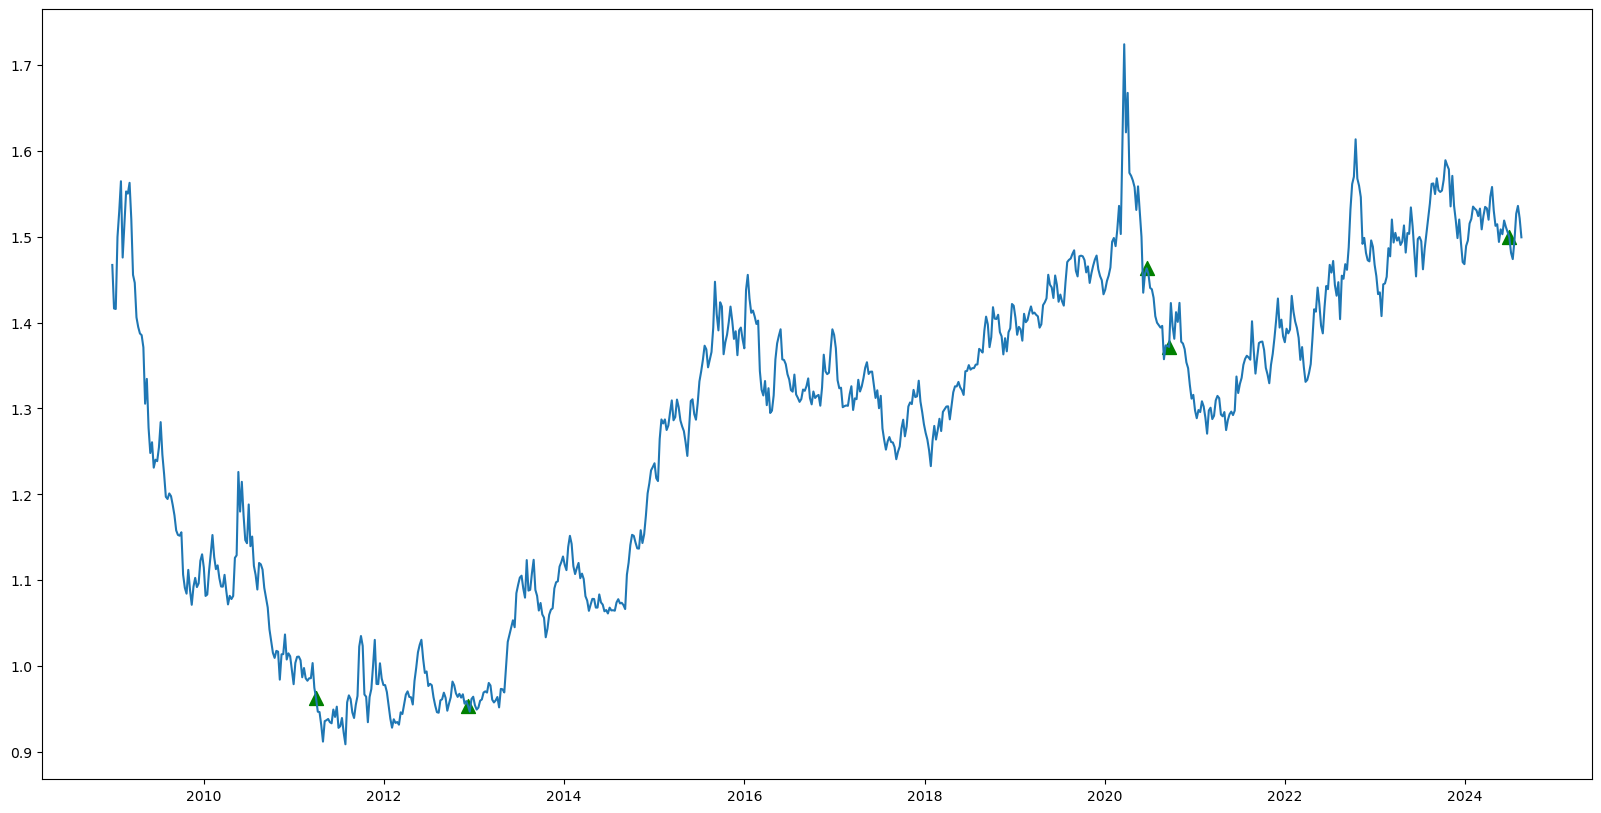

AUSTRALIAN DOLLARextreme net short
[Timestamp('2011-09-30 00:00:00'), Timestamp('2012-05-18 00:00:00'), Timestamp('2013-06-07 00:00:00'), Timestamp('2013-07-19 00:00:00'), Timestamp('2015-03-13 00:00:00'), Timestamp('2018-06-22 00:00:00'), Timestamp('2018-09-21 00:00:00'), Timestamp('2023-09-22 00:00:00'), Timestamp('2024-03-22 00:00:00')]


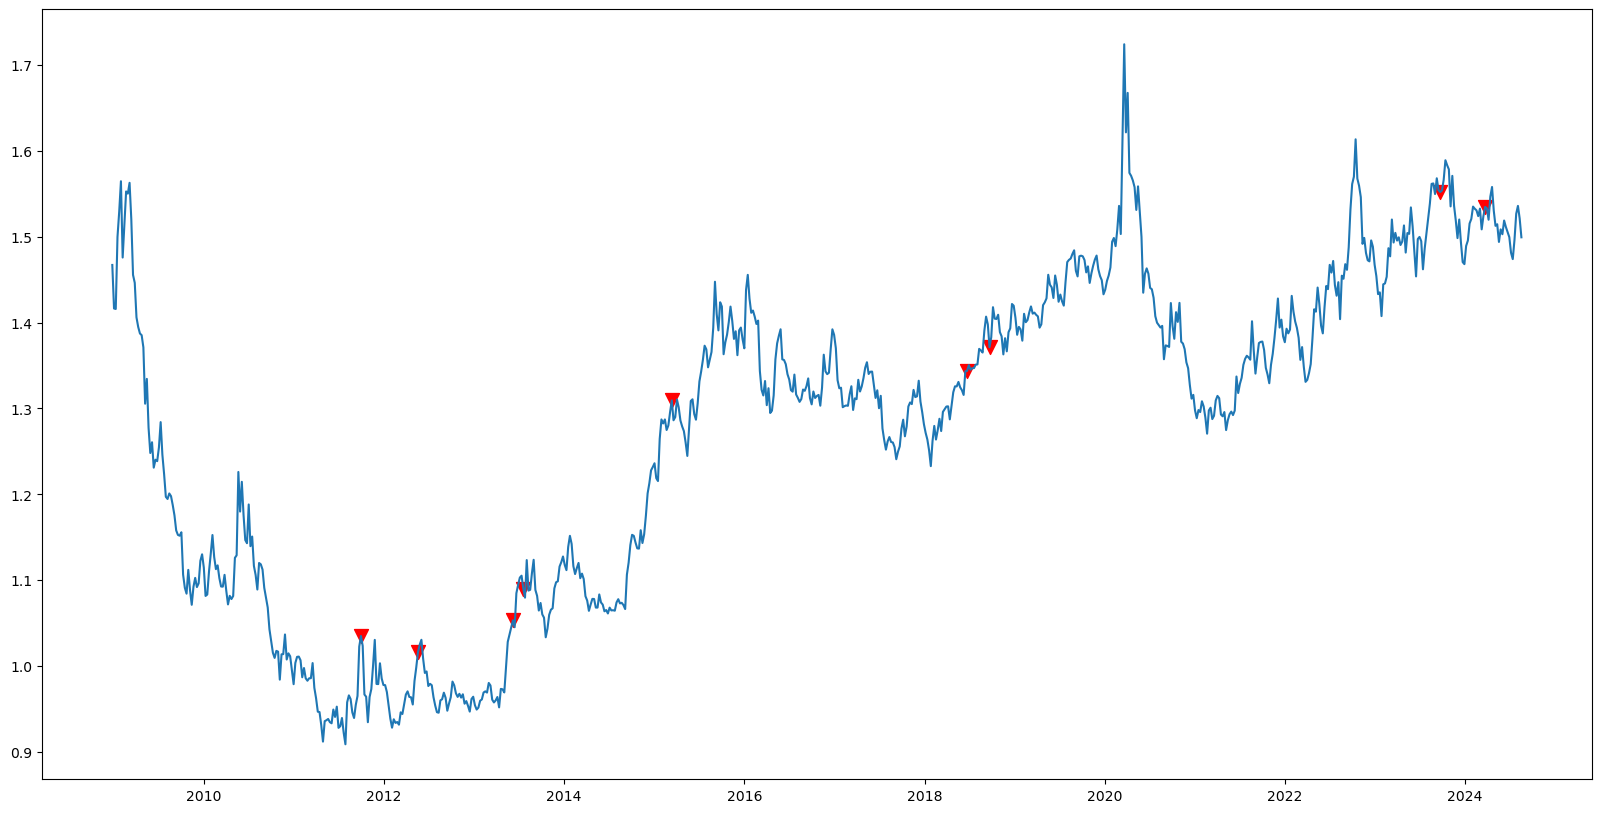

Begining date of positioning COT Index = 2008-12-22 00:00:00
GOLDvextreme net long
[Timestamp('2009-09-11 00:00:00'), Timestamp('2009-11-27 00:00:00'), Timestamp('2015-01-23 00:00:00'), Timestamp('2016-04-01 00:00:00'), Timestamp('2016-06-17 00:00:00'), Timestamp('2019-07-05 00:00:00'), Timestamp('2019-09-27 00:00:00'), Timestamp('2020-02-21 00:00:00')]


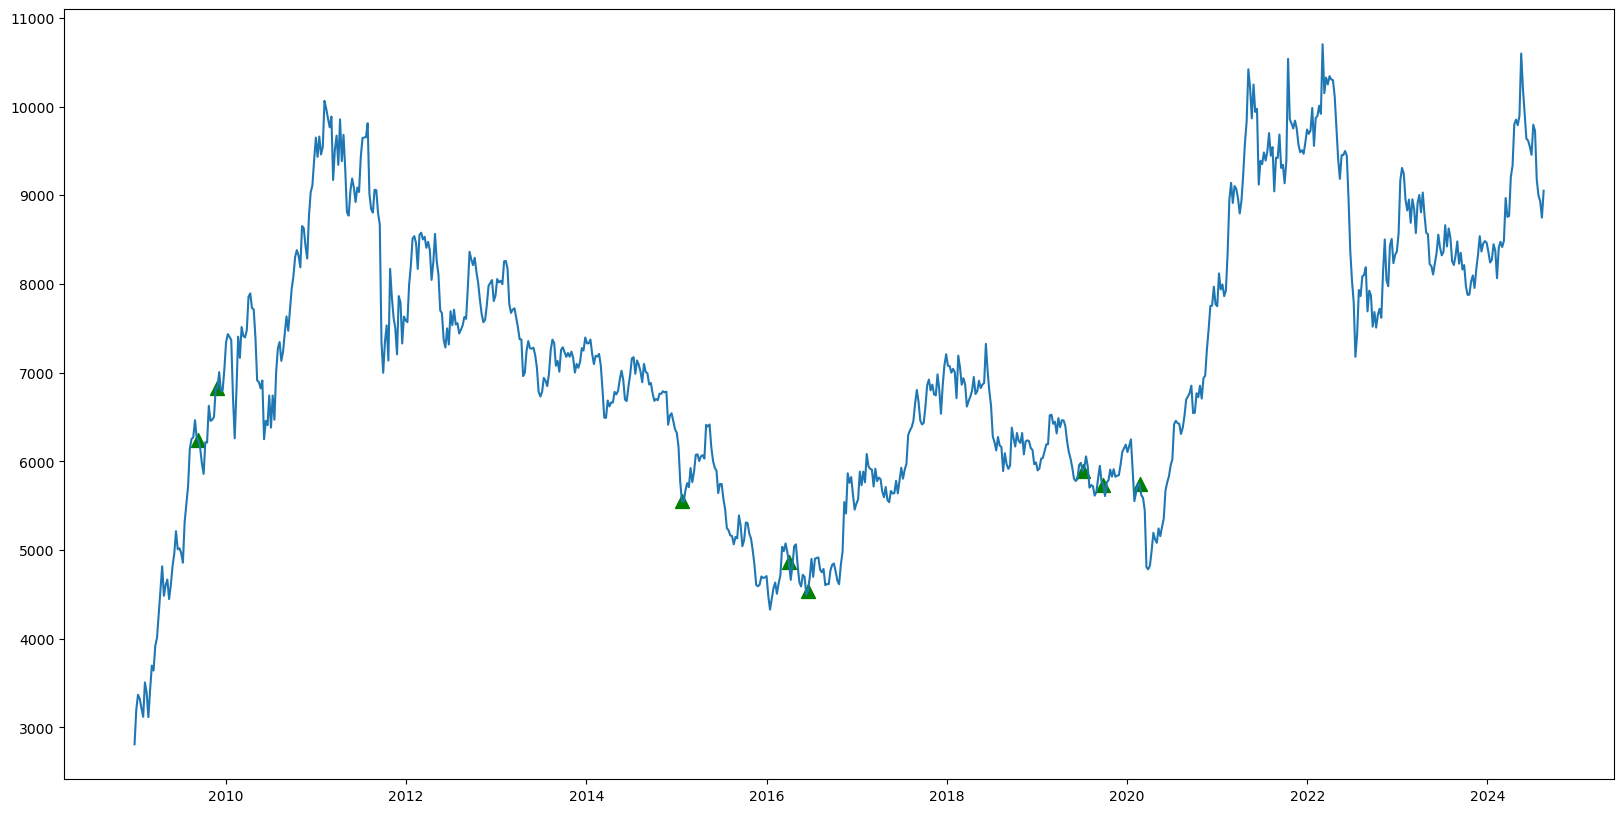

GOLDextreme net short
[Timestamp('2011-09-23 00:00:00'), Timestamp('2011-10-21 00:00:00'), Timestamp('2012-05-11 00:00:00'), Timestamp('2013-02-22 00:00:00'), Timestamp('2013-04-26 00:00:00'), Timestamp('2015-11-27 00:00:00'), Timestamp('2018-07-20 00:00:00'), Timestamp('2021-06-25 00:00:00'), Timestamp('2022-06-17 00:00:00')]


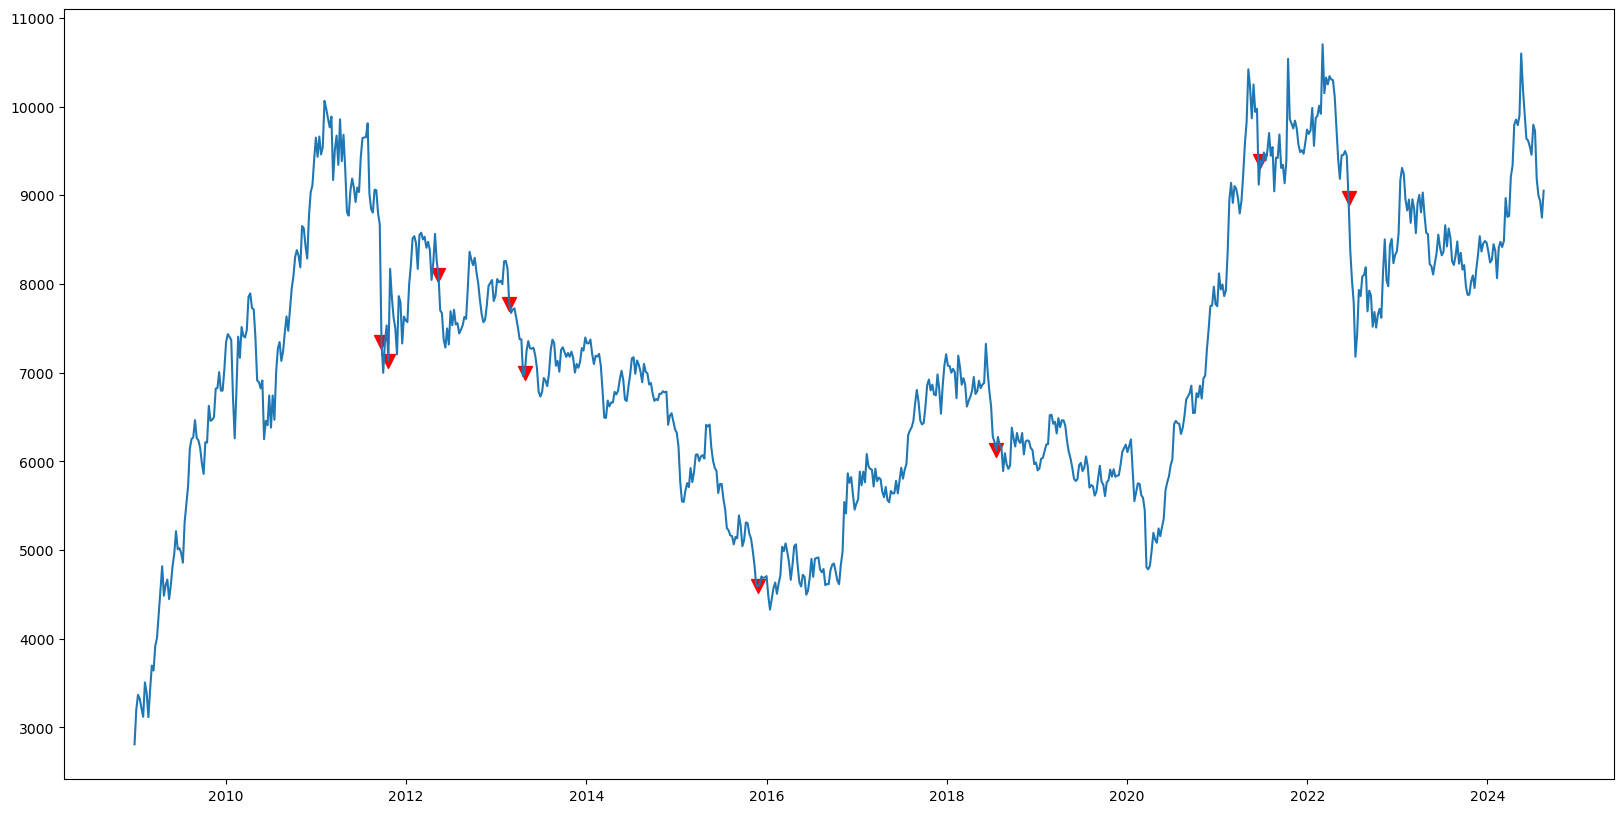

Begining date of positioning COT Index = 2008-12-22 00:00:00
COPPERvextreme net long
[Timestamp('2010-01-01 00:00:00'), Timestamp('2010-11-12 00:00:00'), Timestamp('2010-12-17 00:00:00'), Timestamp('2016-11-04 00:00:00'), Timestamp('2018-01-05 00:00:00'), Timestamp('2018-06-15 00:00:00'), Timestamp('2020-07-17 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-10-23 00:00:00'), Timestamp('2024-04-12 00:00:00')]


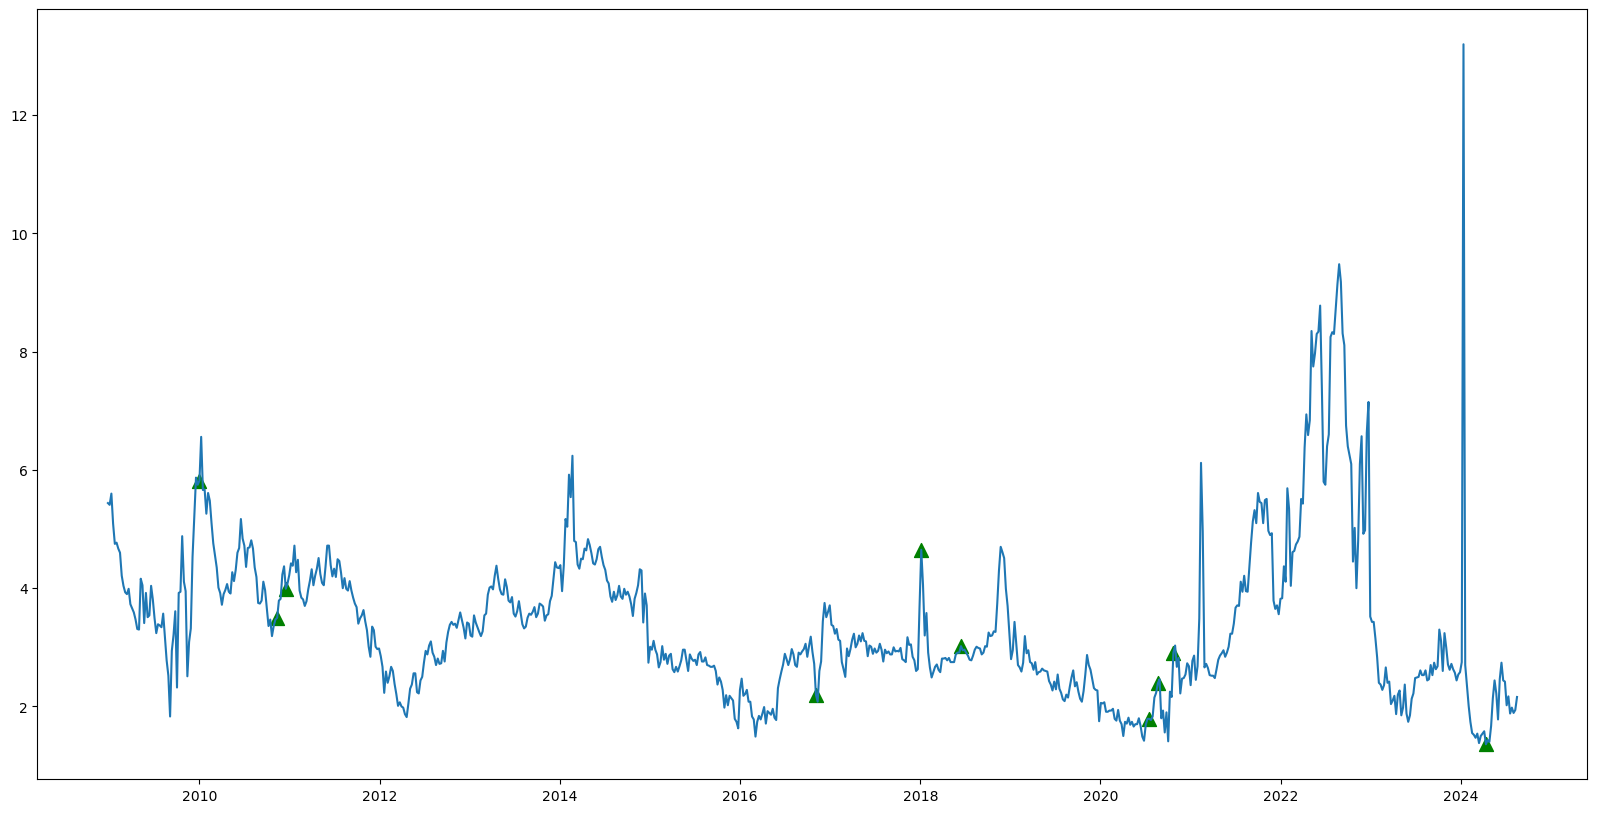

COPPERextreme net short
[Timestamp('2009-01-16 00:00:00'), Timestamp('2011-10-07 00:00:00'), Timestamp('2012-05-25 00:00:00'), Timestamp('2012-06-29 00:00:00'), Timestamp('2012-08-10 00:00:00'), Timestamp('2013-11-22 00:00:00'), Timestamp('2014-12-05 00:00:00'), Timestamp('2016-01-15 00:00:00'), Timestamp('2016-06-17 00:00:00'), Timestamp('2018-12-28 00:00:00'), Timestamp('2019-08-09 00:00:00'), Timestamp('2019-08-30 00:00:00'), Timestamp('2022-05-06 00:00:00'), Timestamp('2023-05-19 00:00:00')]


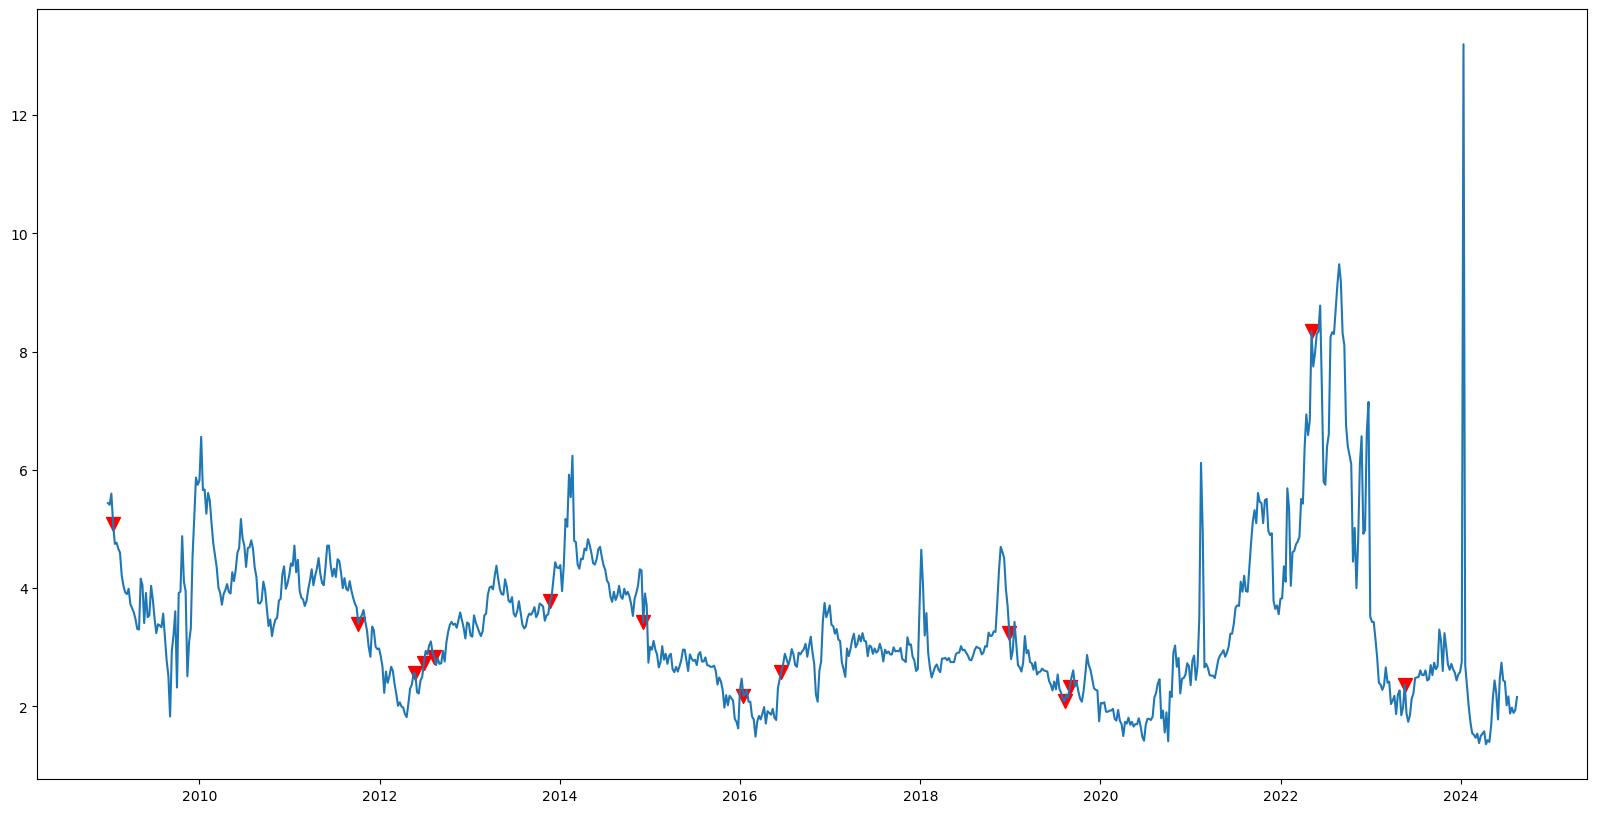

Begining date of positioning COT Index = 2008-12-22 00:00:00
PLATINUMvextreme net long
[Timestamp('2009-08-07 00:00:00'), Timestamp('2009-09-11 00:00:00'), Timestamp('2011-01-21 00:00:00'), Timestamp('2012-09-07 00:00:00'), Timestamp('2013-02-01 00:00:00'), Timestamp('2014-07-11 00:00:00')]


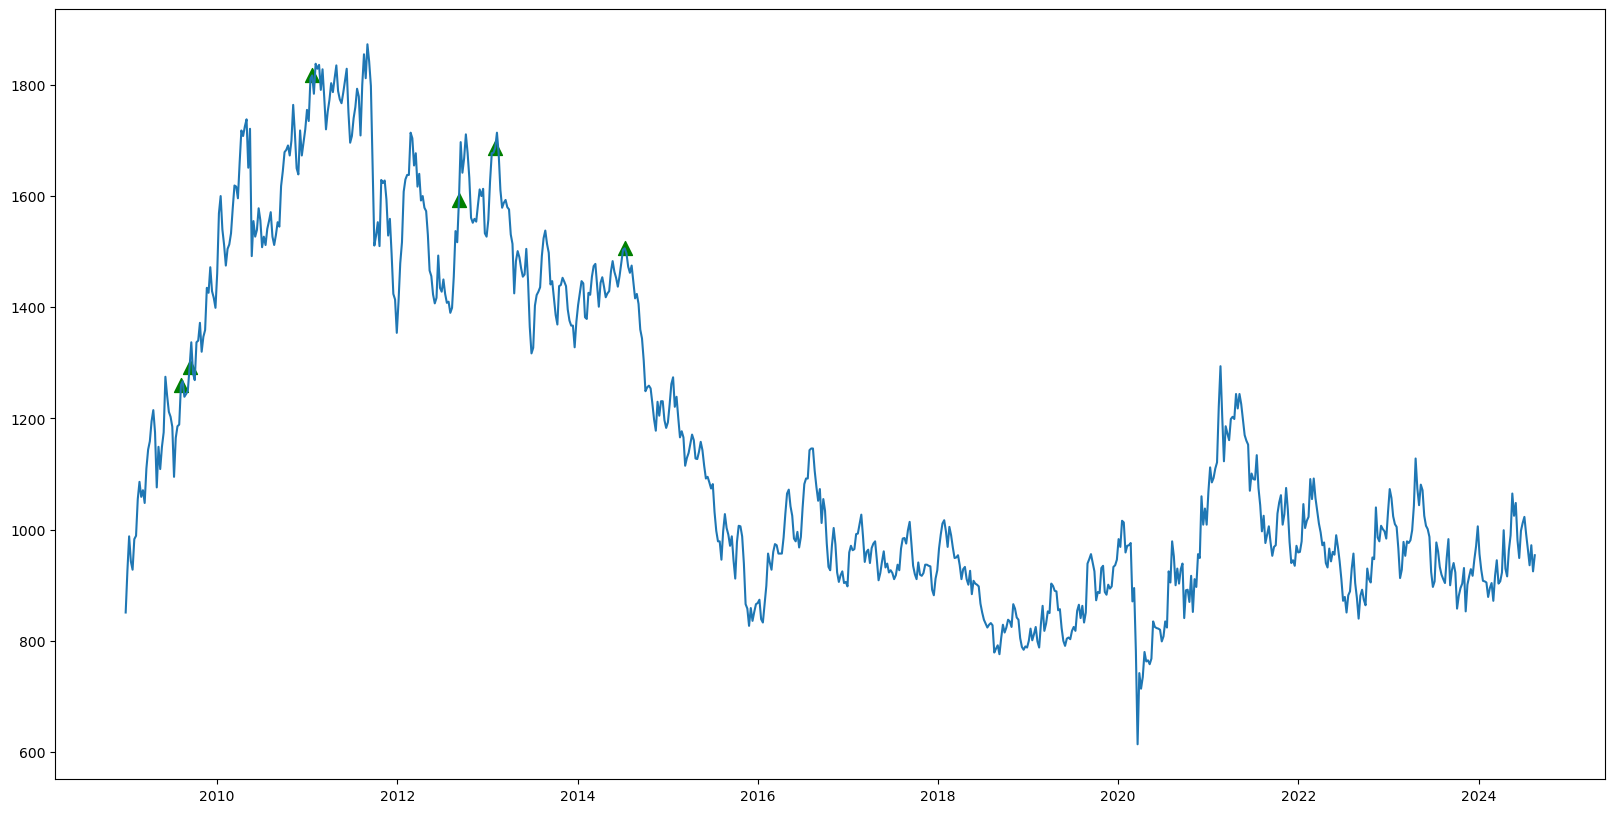

PLATINUMextreme net short
[Timestamp('2012-05-25 00:00:00'), Timestamp('2014-10-31 00:00:00'), Timestamp('2014-11-21 00:00:00'), Timestamp('2015-06-26 00:00:00'), Timestamp('2015-11-27 00:00:00'), Timestamp('2017-05-05 00:00:00'), Timestamp('2018-05-25 00:00:00'), Timestamp('2022-04-29 00:00:00')]


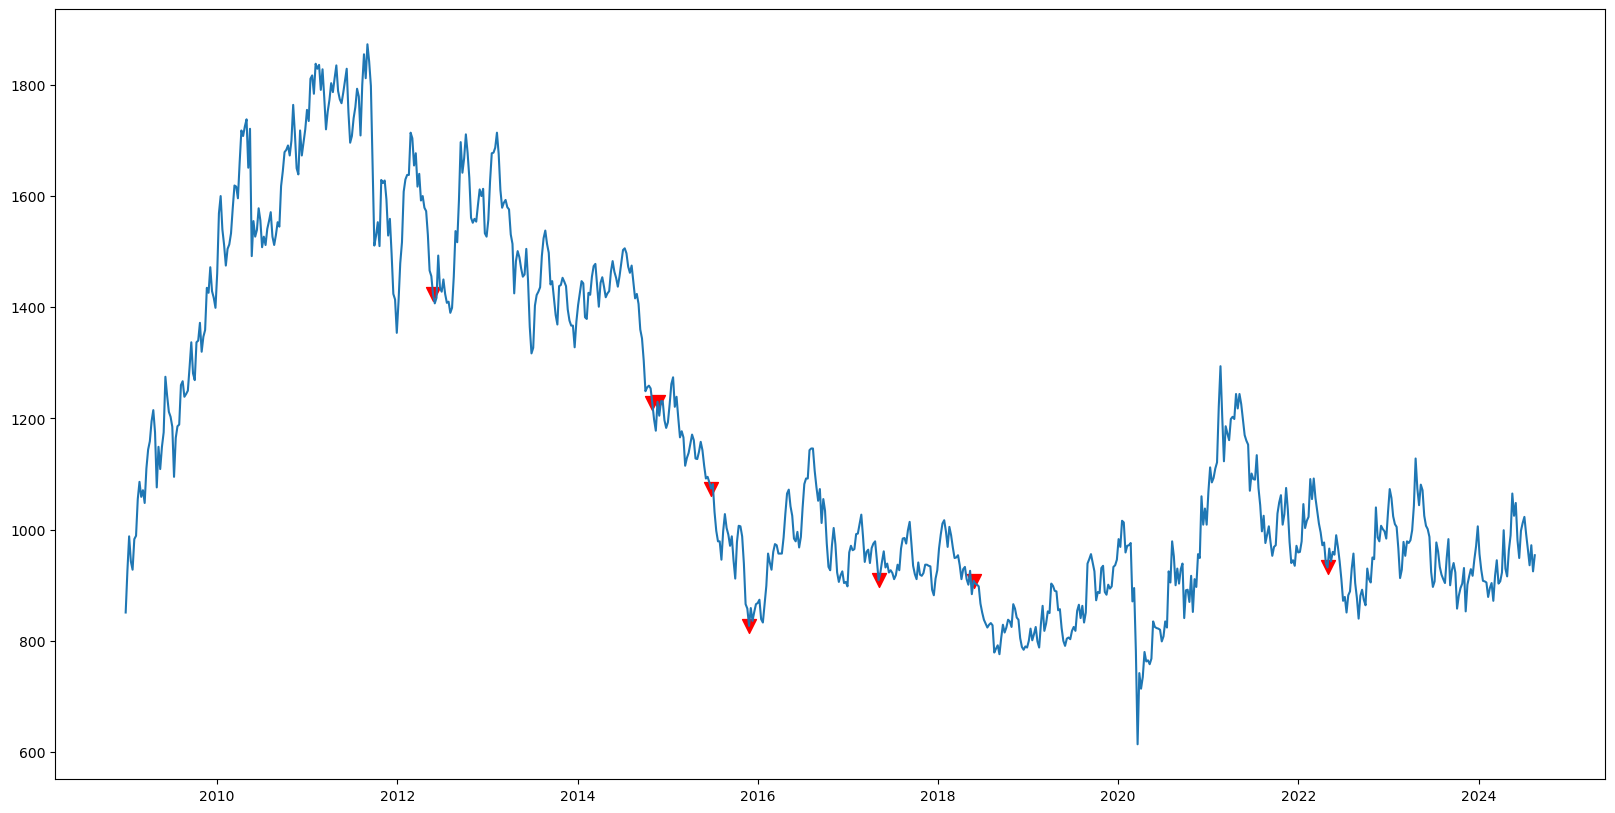

Begining date of positioning COT Index = 2008-12-22 00:00:00
CRUDE OILvextreme net long
[Timestamp('2010-12-10 00:00:00'), Timestamp('2011-02-25 00:00:00'), Timestamp('2013-07-12 00:00:00'), Timestamp('2016-12-16 00:00:00'), Timestamp('2017-02-17 00:00:00'), Timestamp('2017-12-01 00:00:00')]


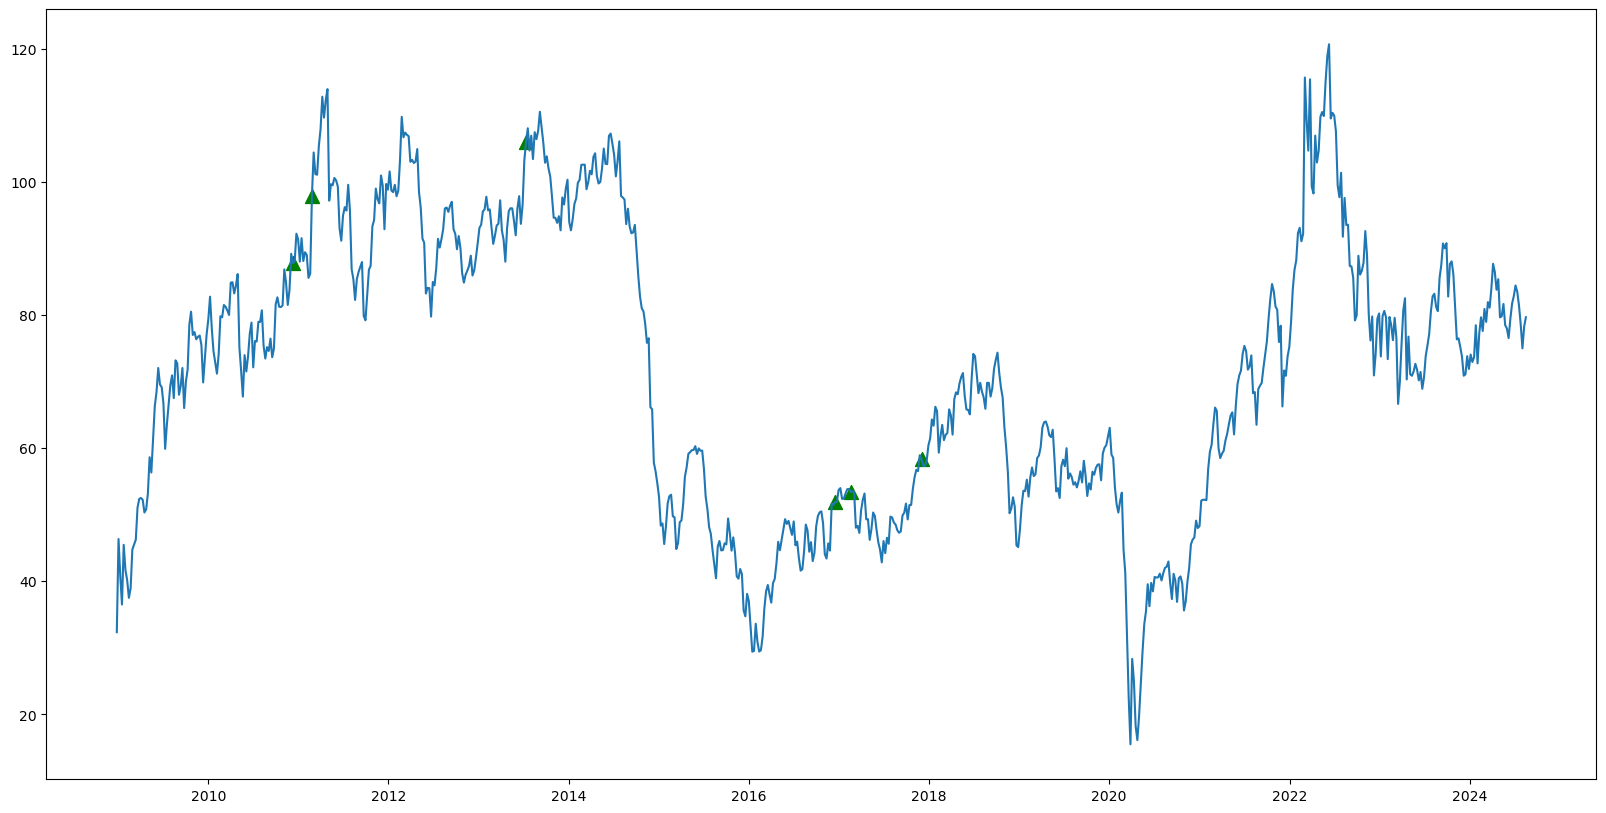

CRUDE OILextreme net short
[Timestamp('2015-03-27 00:00:00'), Timestamp('2015-12-25 00:00:00'), Timestamp('2016-02-19 00:00:00'), Timestamp('2021-12-17 00:00:00'), Timestamp('2022-06-17 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-16 00:00:00')]


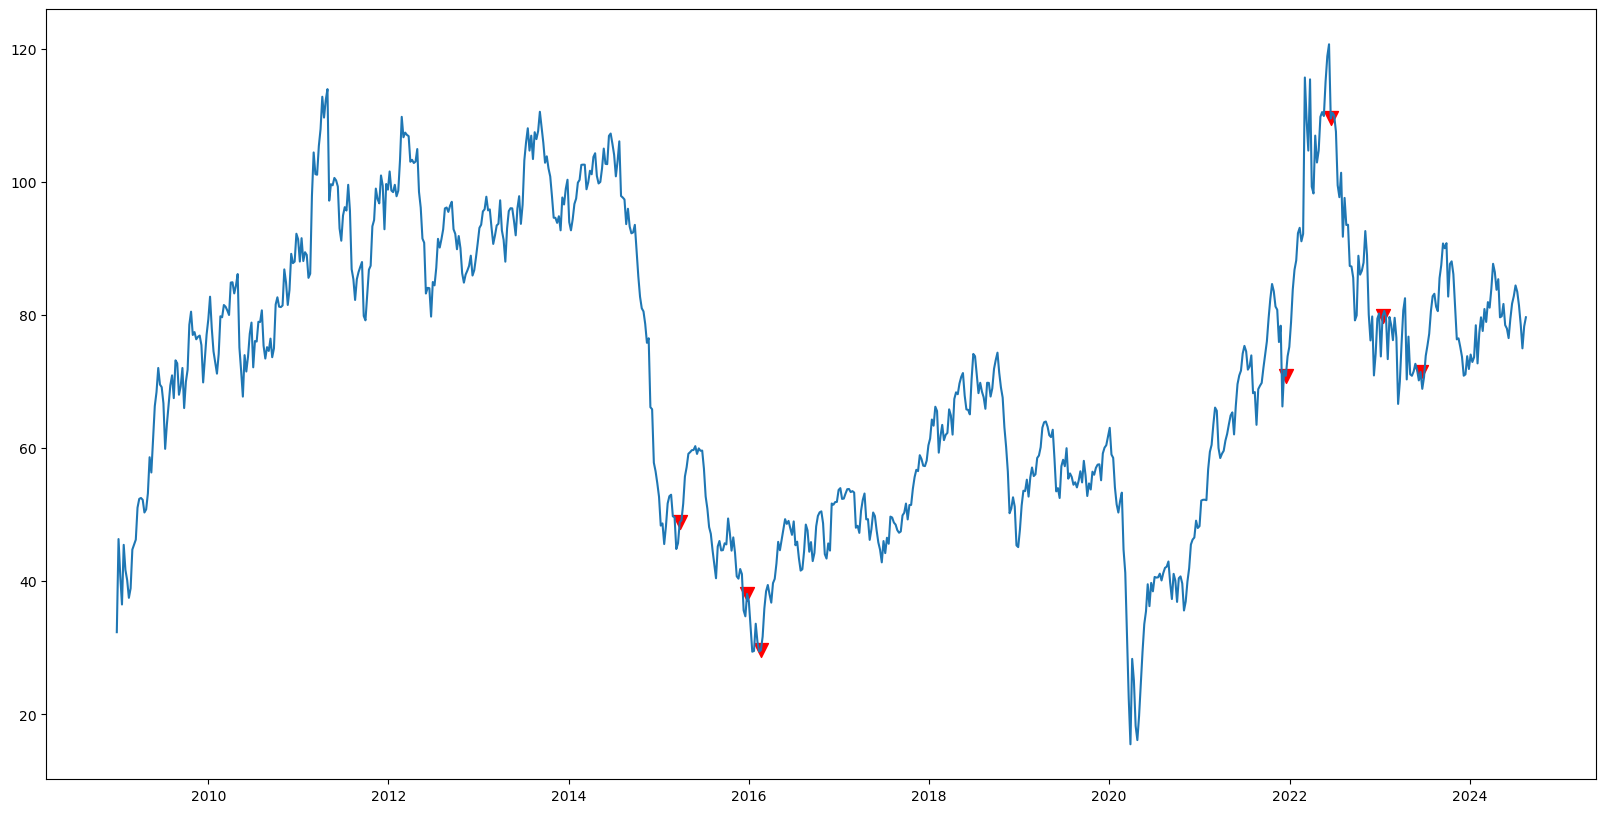

Begining date of positioning COT Index = 2008-12-22 00:00:00
NATURAL GASvextreme net long
[Timestamp('2012-01-27 00:00:00'), Timestamp('2012-04-06 00:00:00'), Timestamp('2012-05-11 00:00:00'), Timestamp('2012-06-01 00:00:00'), Timestamp('2012-07-06 00:00:00'), Timestamp('2012-10-05 00:00:00'), Timestamp('2013-05-10 00:00:00'), Timestamp('2014-01-24 00:00:00'), Timestamp('2016-08-05 00:00:00'), Timestamp('2016-09-02 00:00:00'), Timestamp('2016-12-16 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-14 00:00:00'), Timestamp('2023-10-06 00:00:00')]


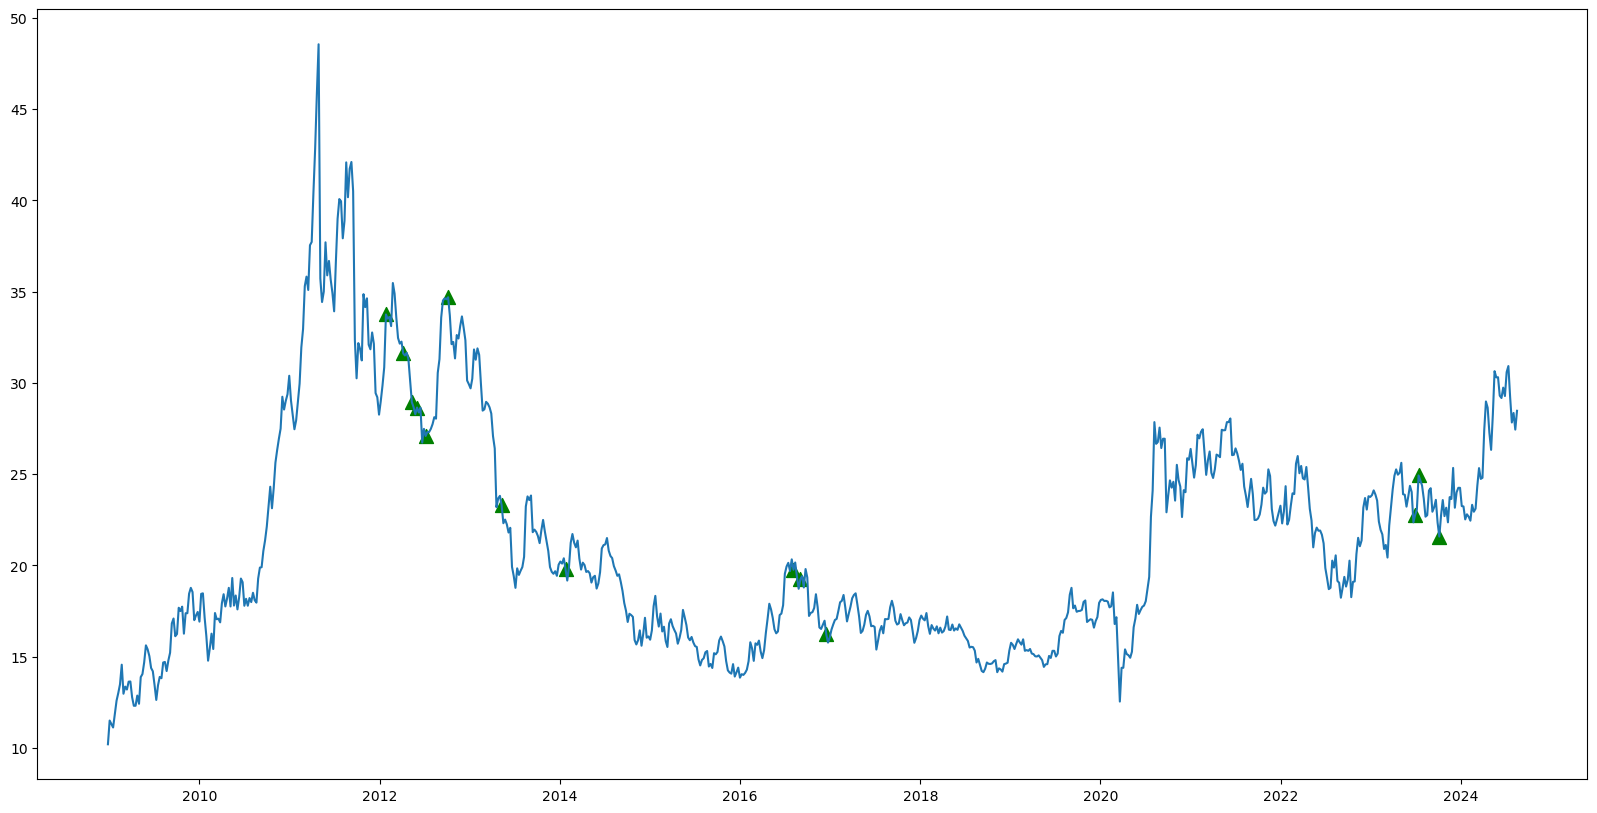

NATURAL GASextreme net short
[Timestamp('2011-01-21 00:00:00'), Timestamp('2014-10-10 00:00:00'), Timestamp('2015-01-30 00:00:00'), Timestamp('2015-06-12 00:00:00'), Timestamp('2019-07-26 00:00:00'), Timestamp('2019-12-06 00:00:00'), Timestamp('2020-01-17 00:00:00'), Timestamp('2022-11-25 00:00:00')]


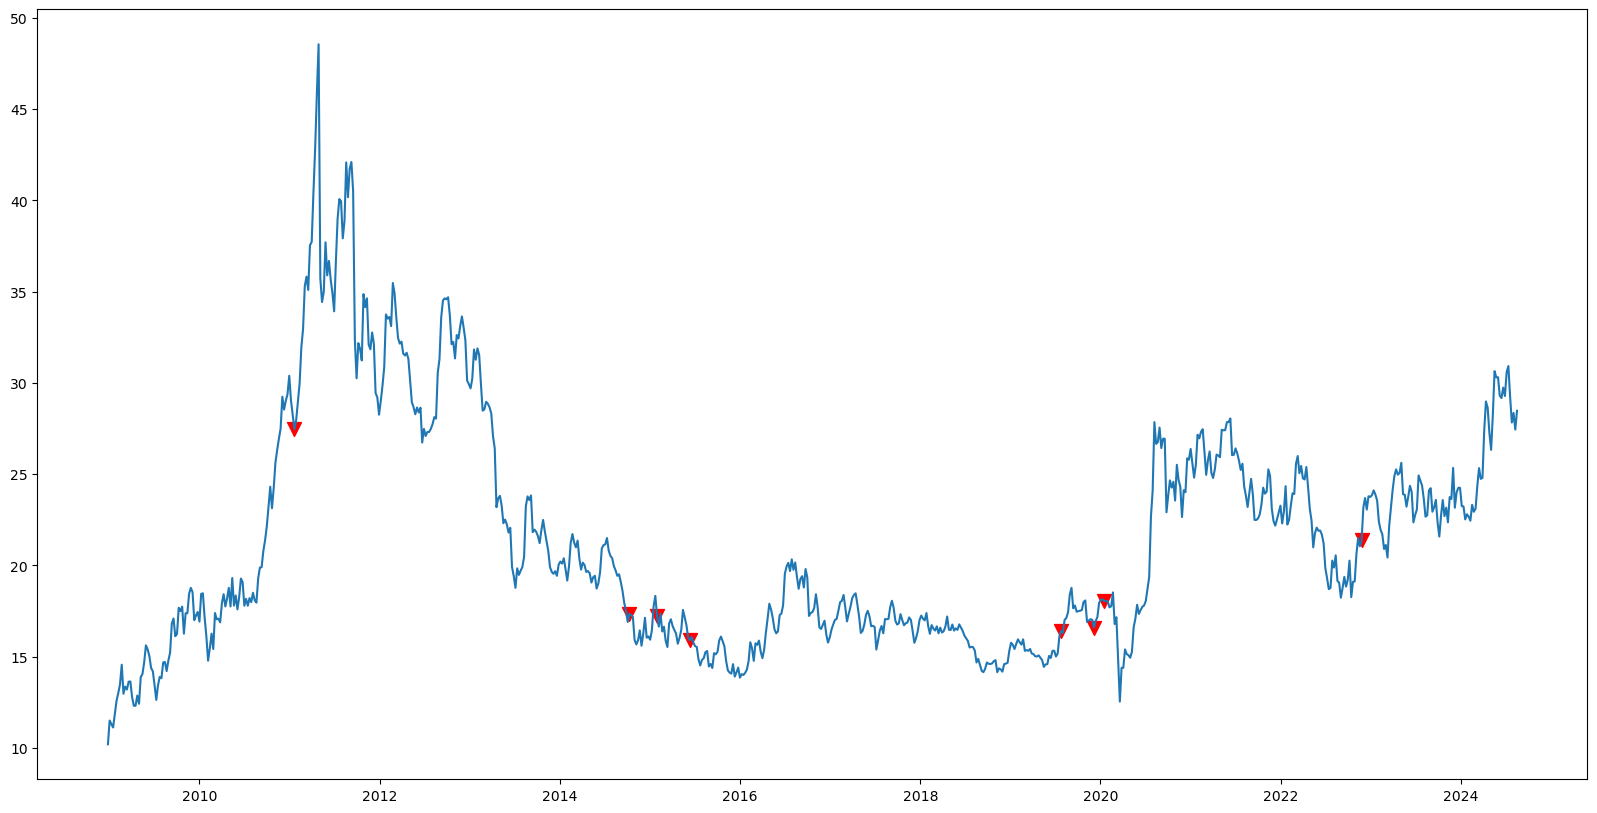

In [11]:
compute_backtest('2007-01-01', 2)

S&P 500


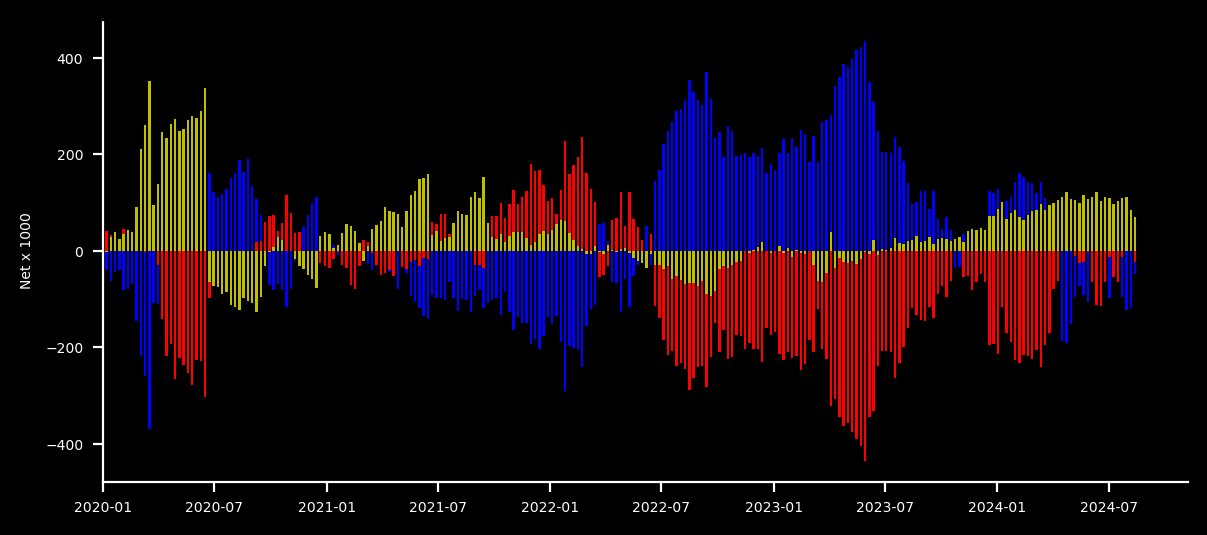

NASDAQ-100


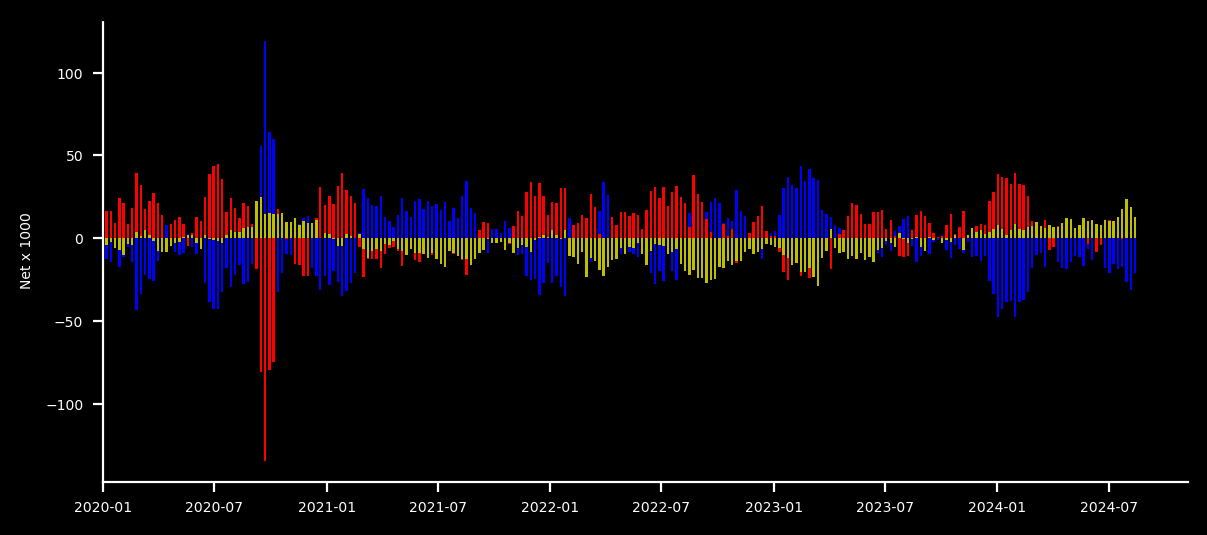

DOW JONES


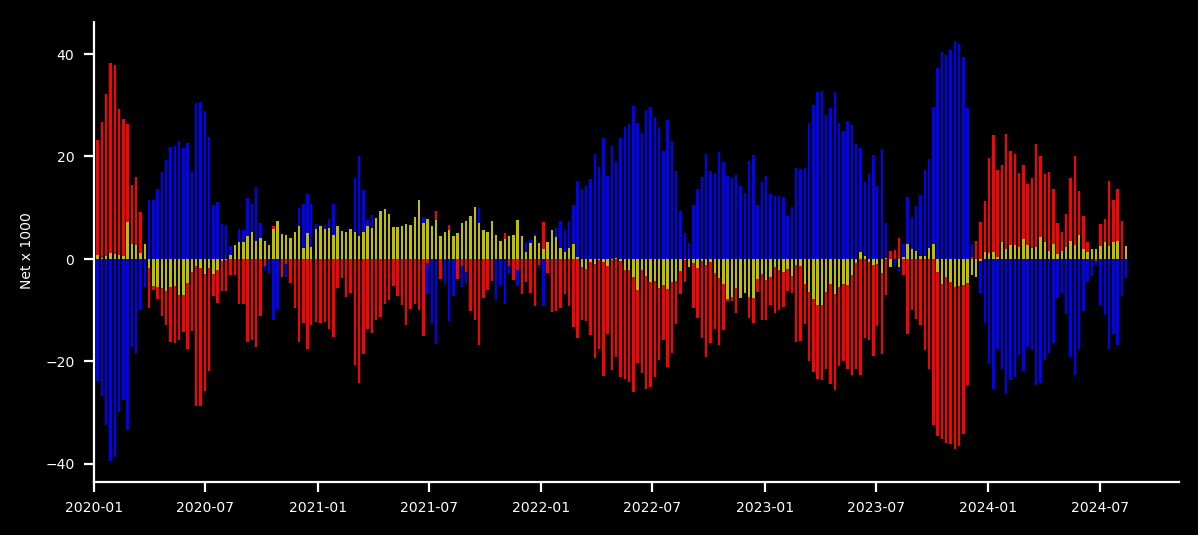

RUSSELL 2000


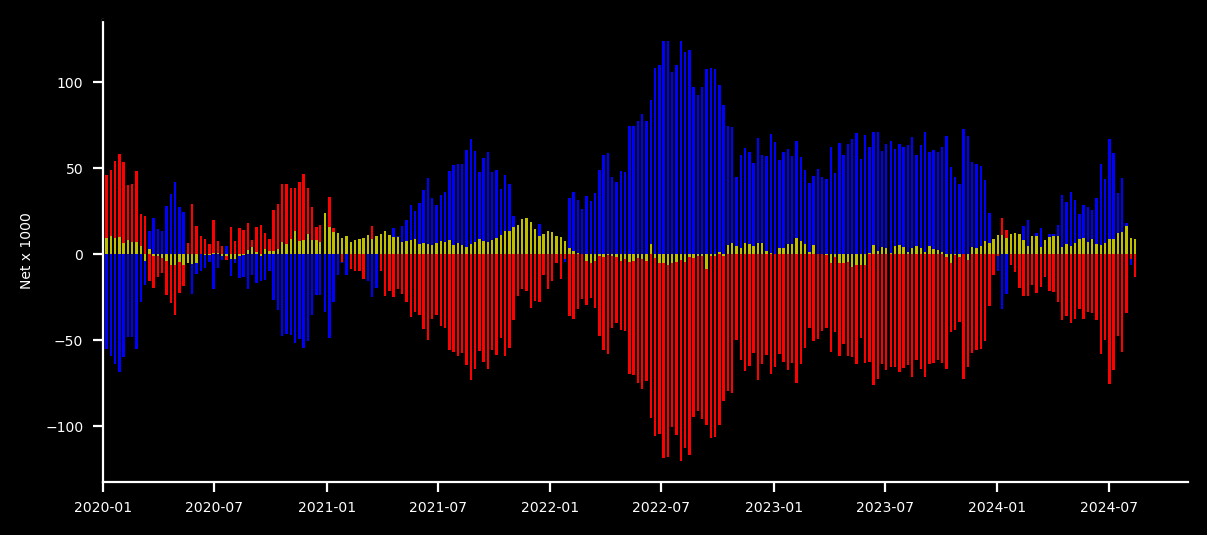

S&P 400 MID CAP


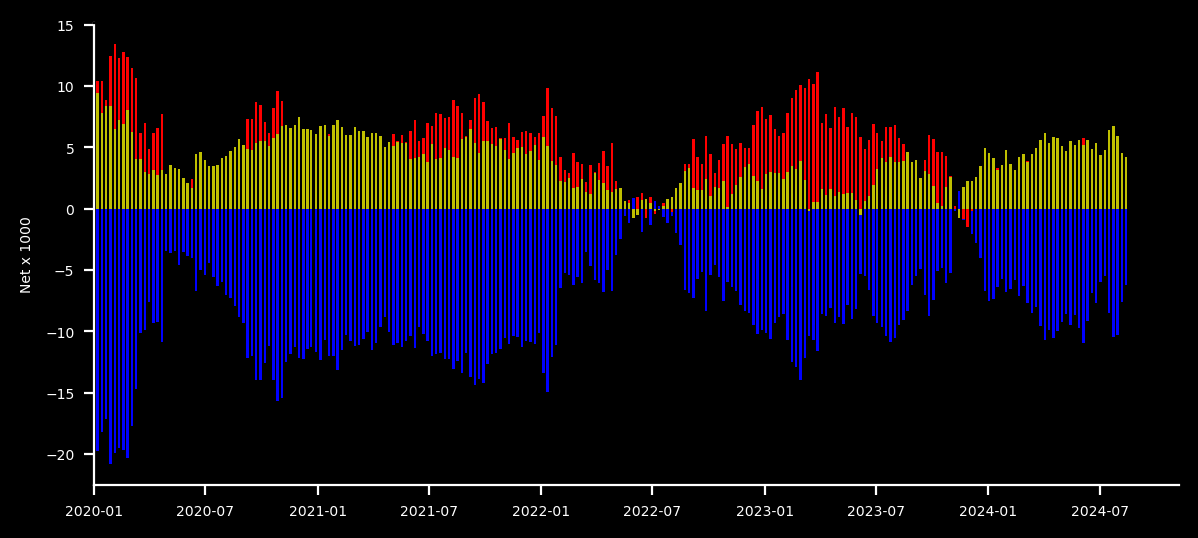

S&P 500 ANNUAL DIVIDEND


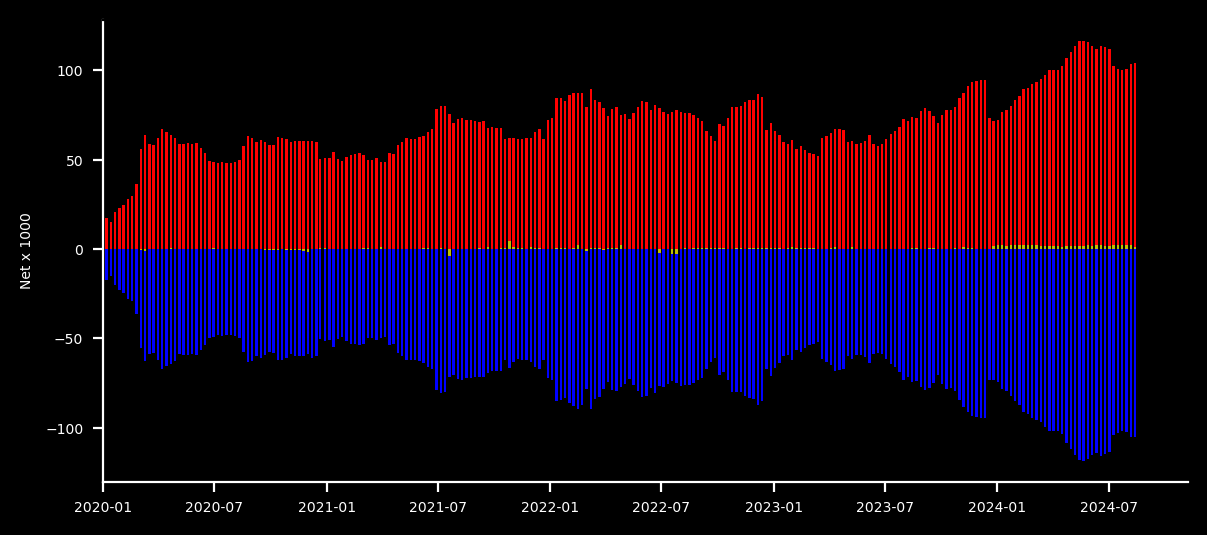

S&P CONSUMER STAPLES INDEX


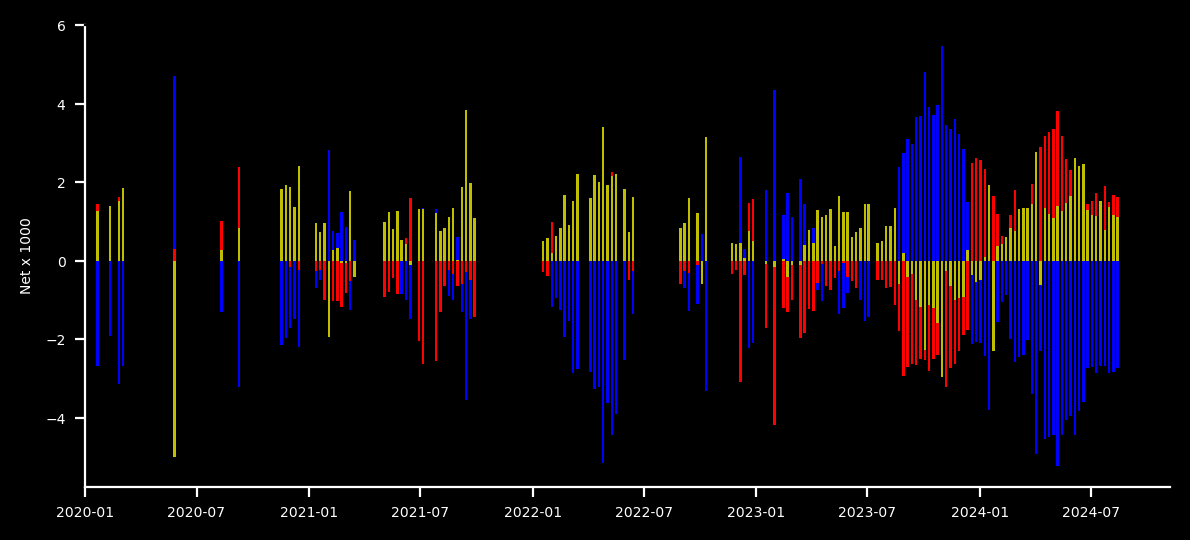

S&P ENERGY INDEX


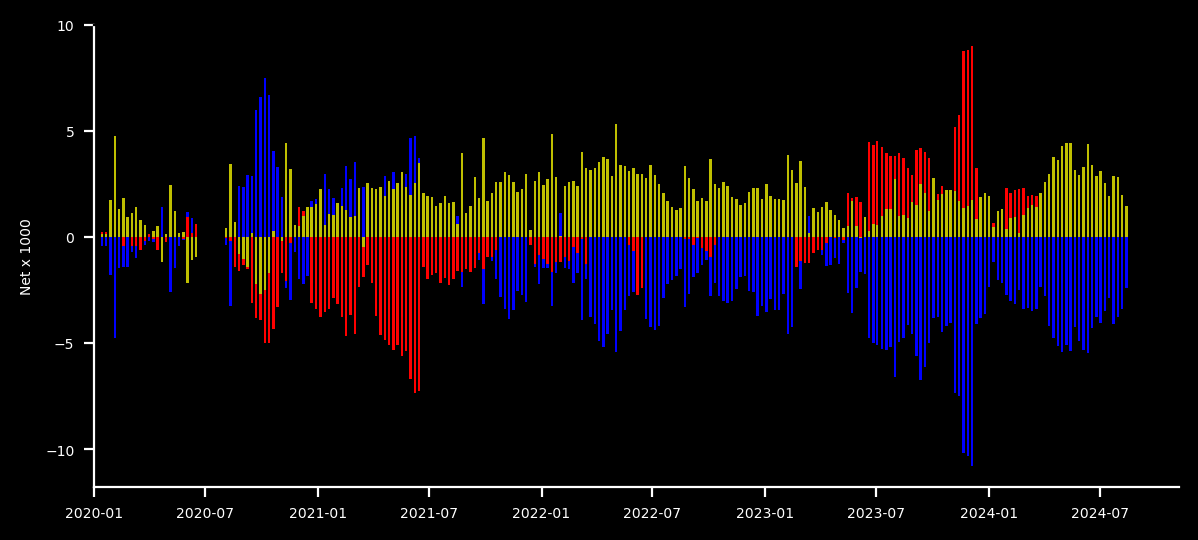

S&P FINANCIAL INDEX


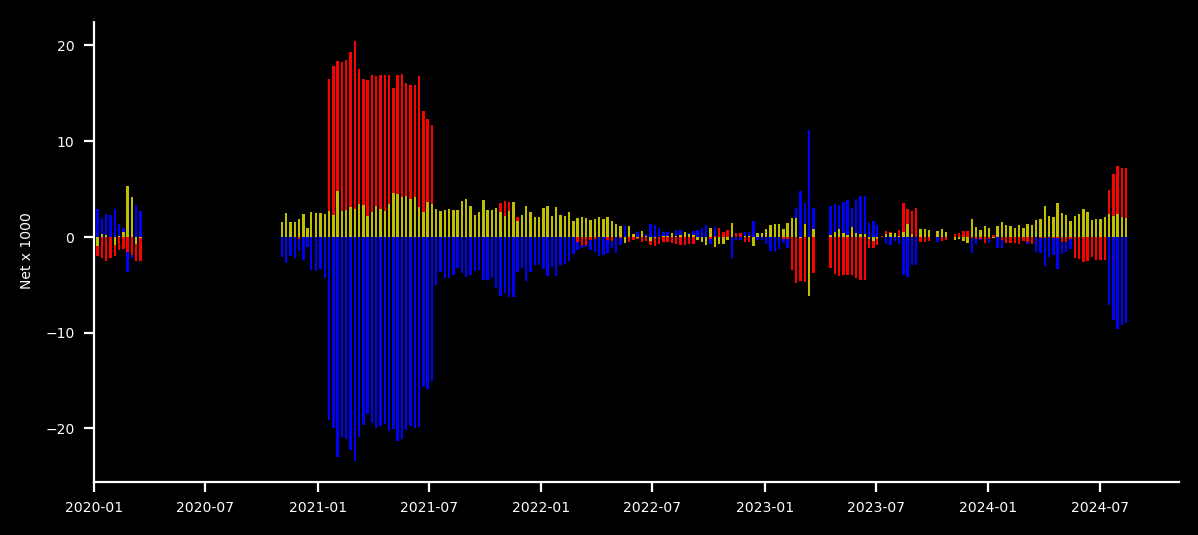

S&P UTILITIES INDEX


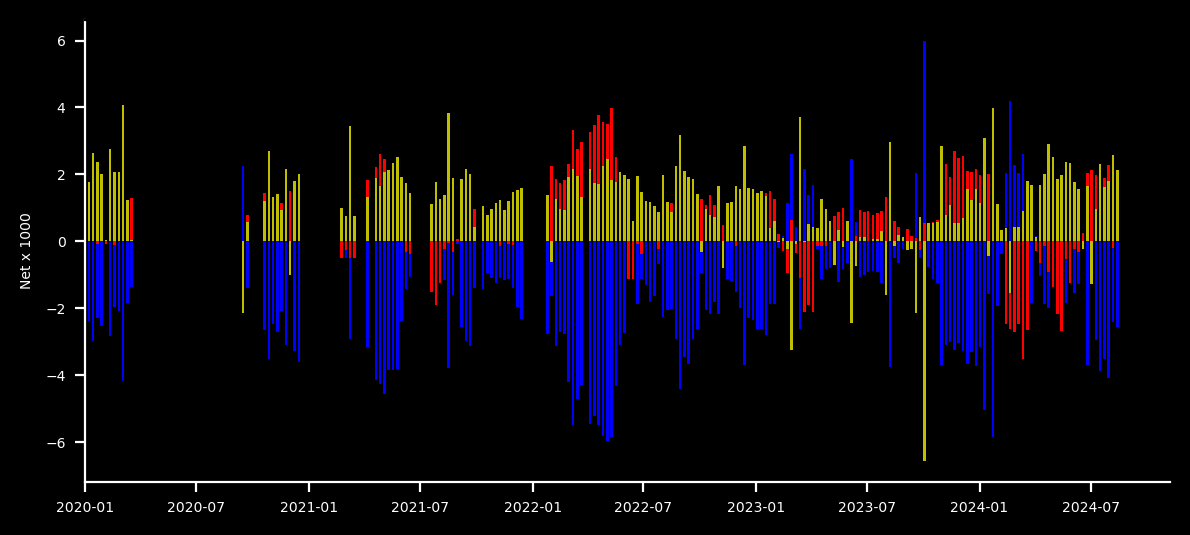

DOW JONES U.S. REAL ESTATE


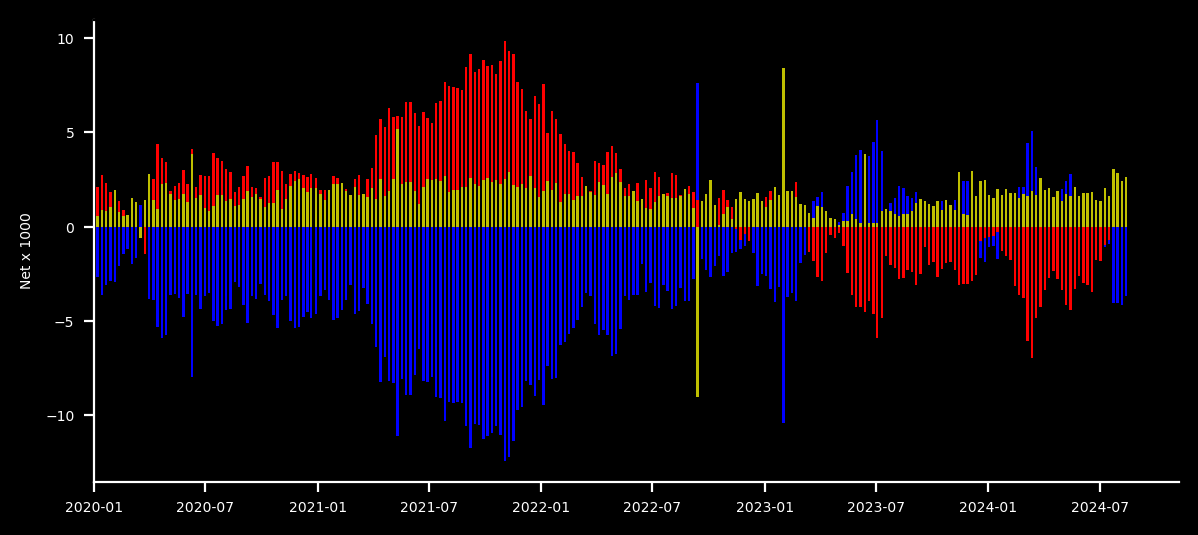

NIKKEI STOCK AVERAGE YEN DENOM


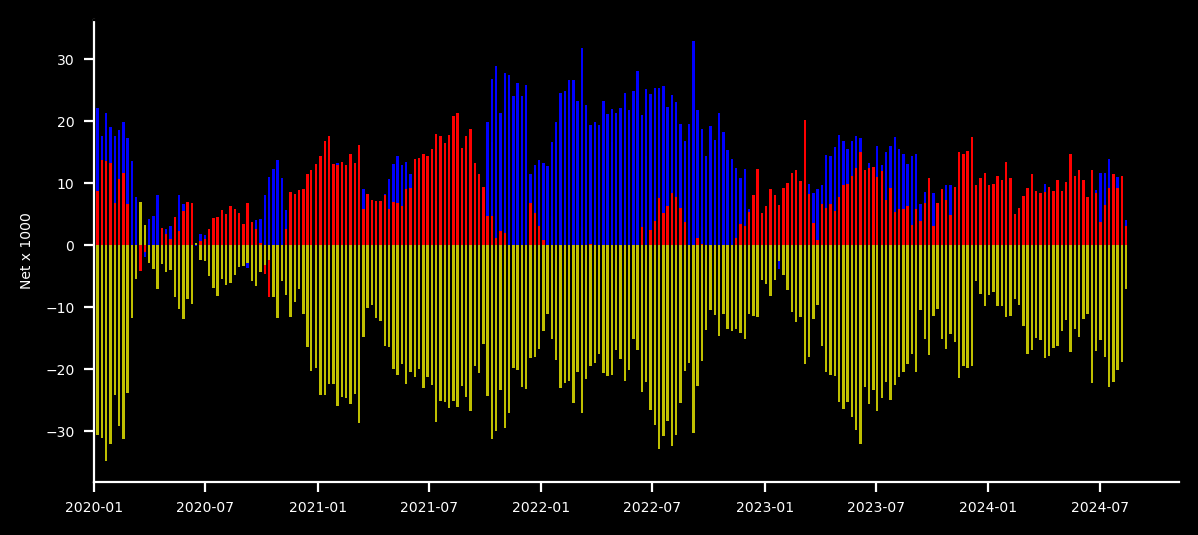

MSCI EAFE


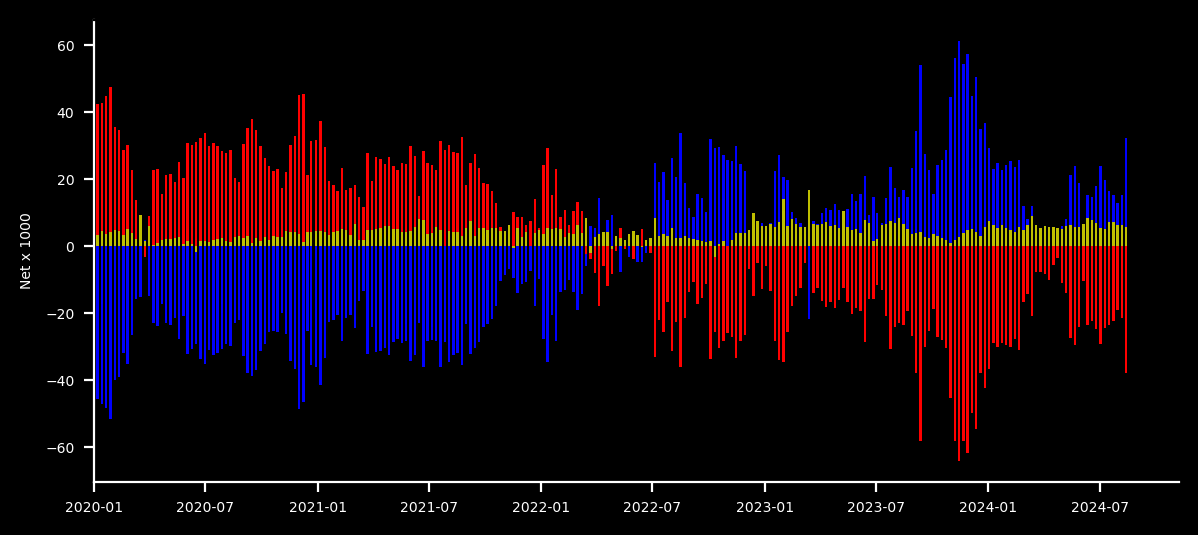

MSCI EM INDEX


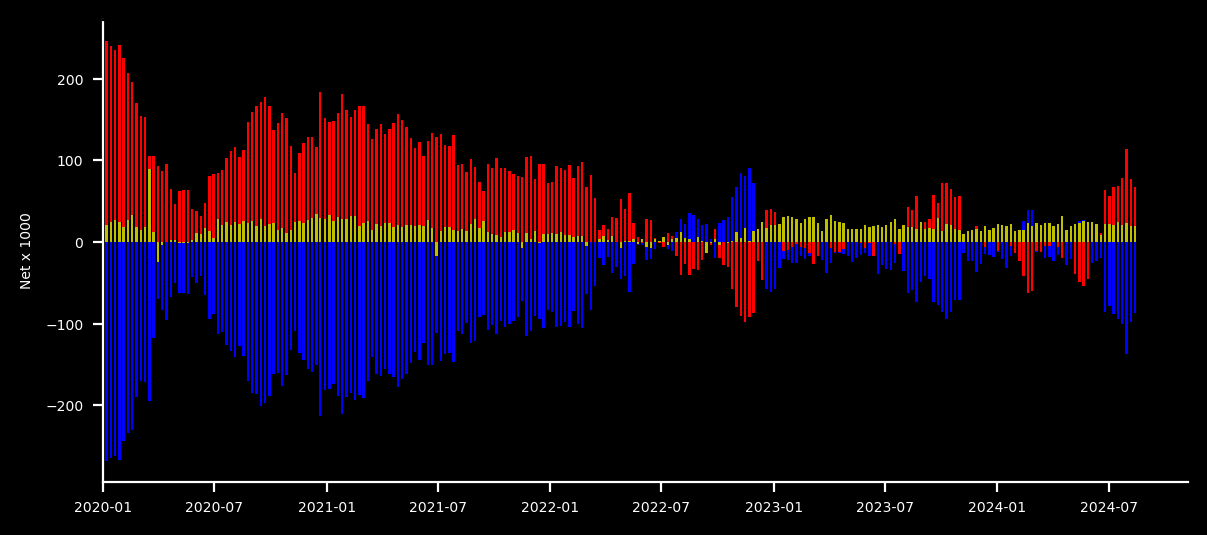

VIX


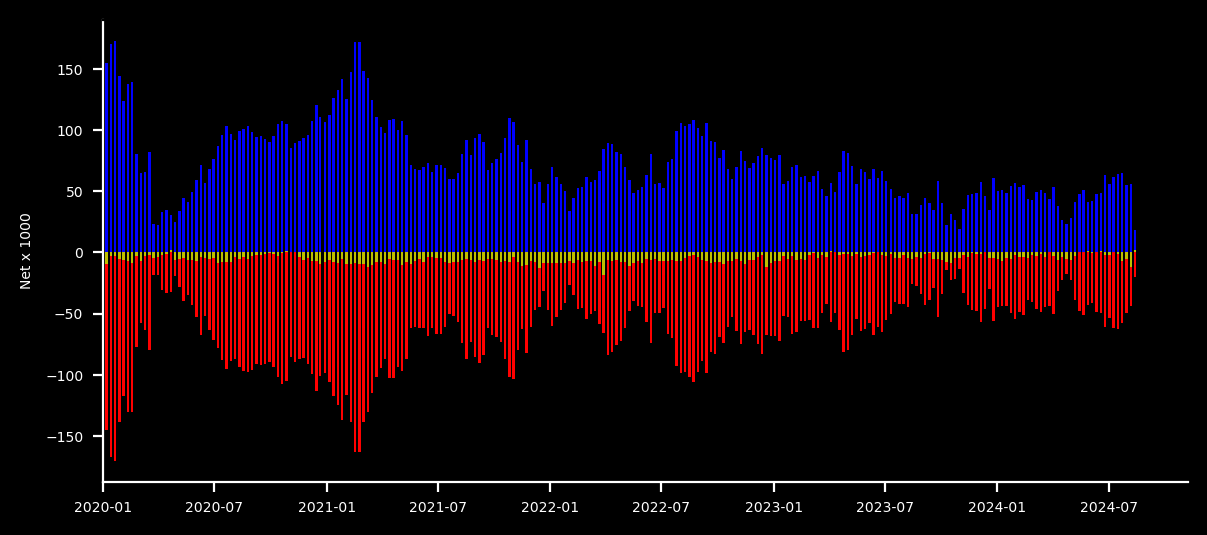

FED FUNDS


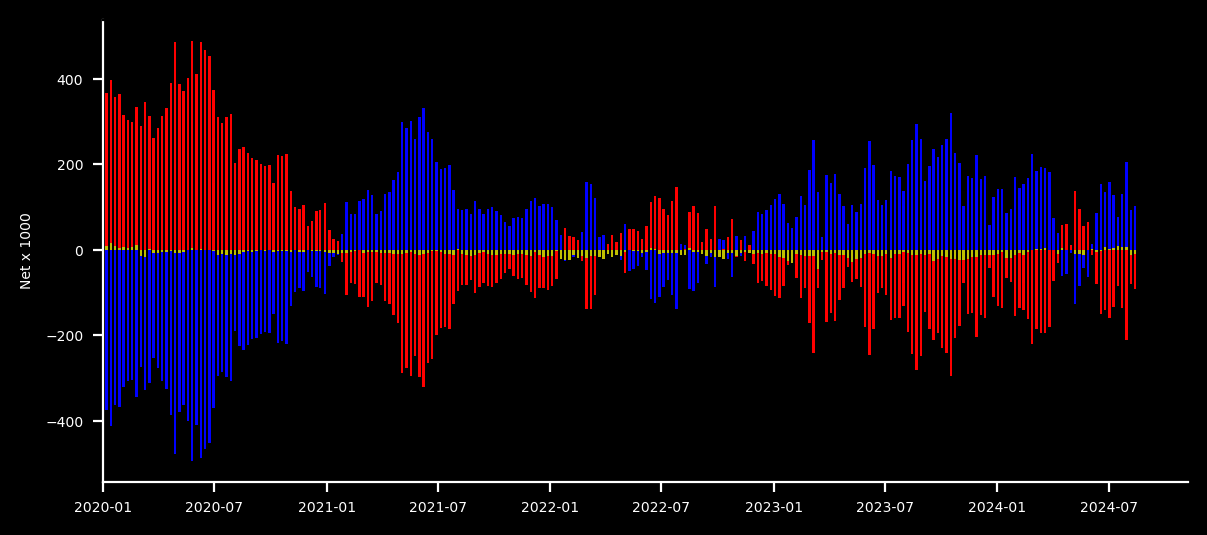

SOFR-1M


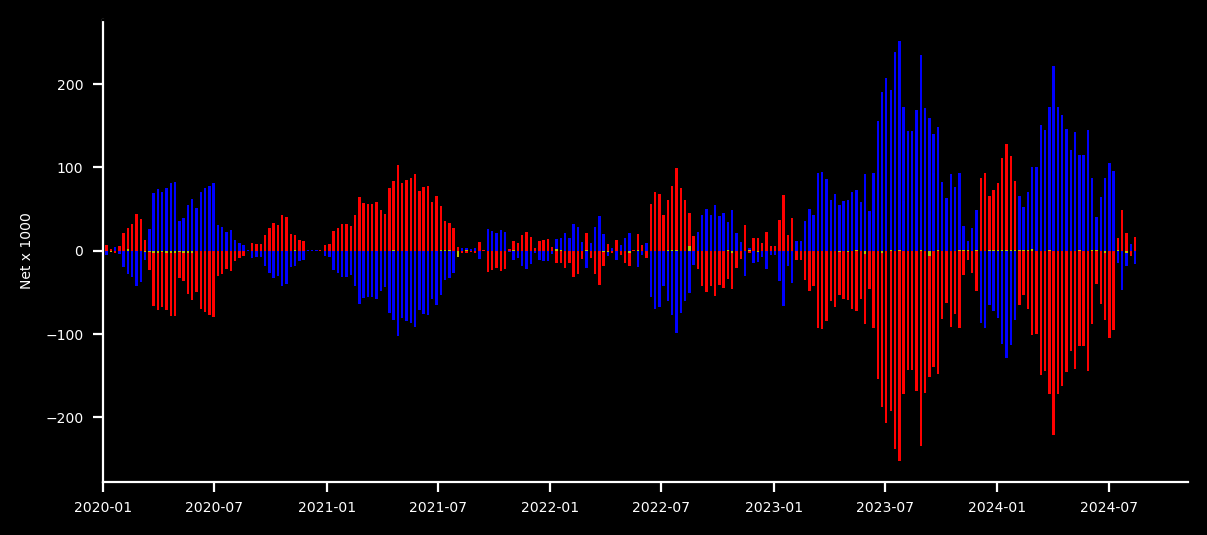

SOFR-3M


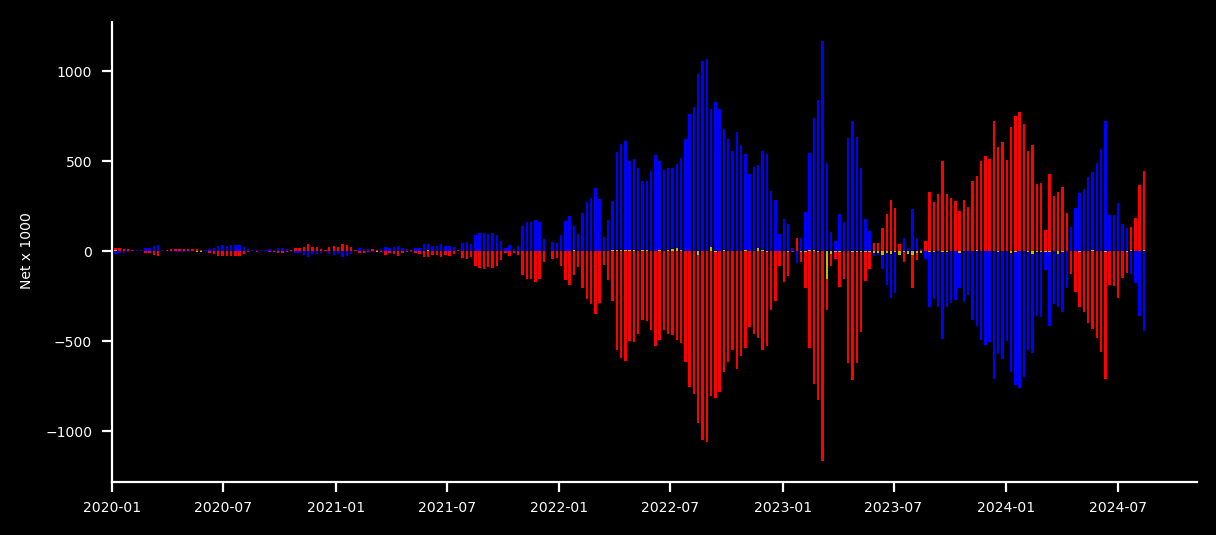

2-YEAR NOTES


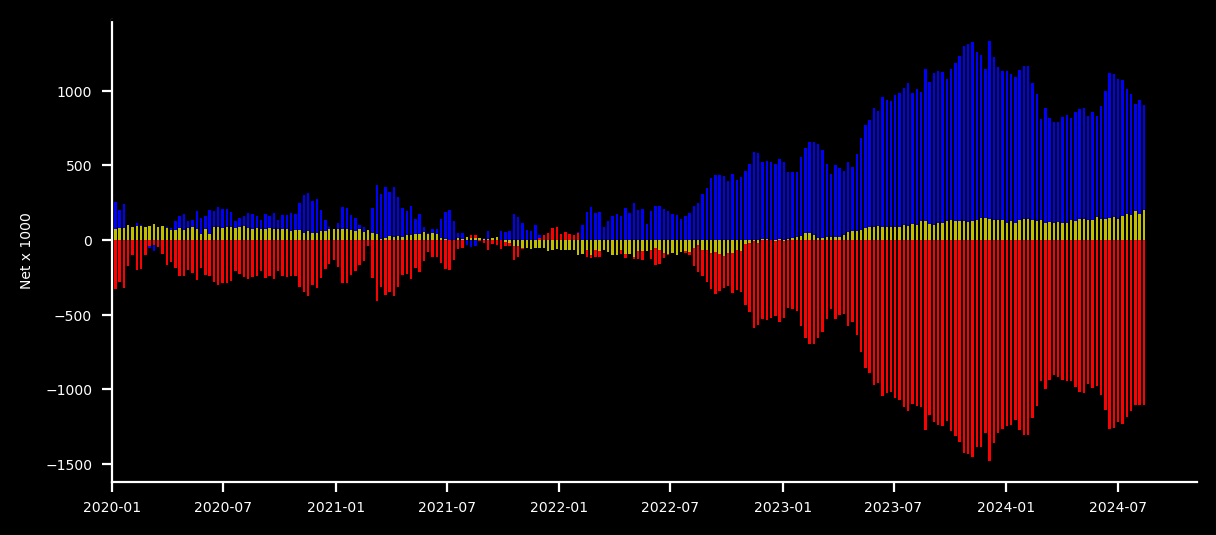

5-YEAR NOTES


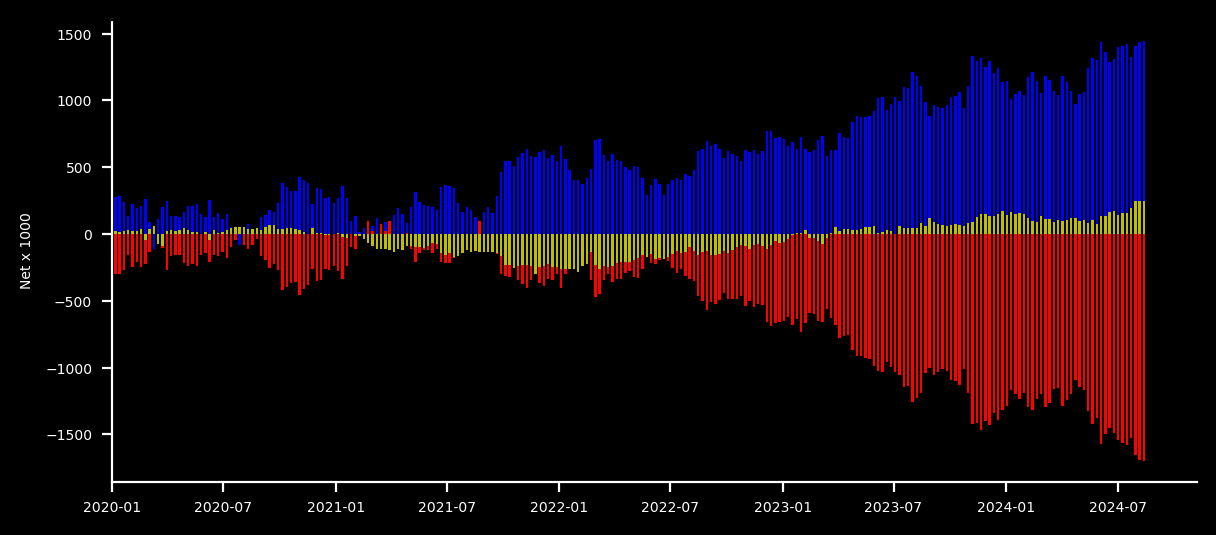

10-YEAR NOTES


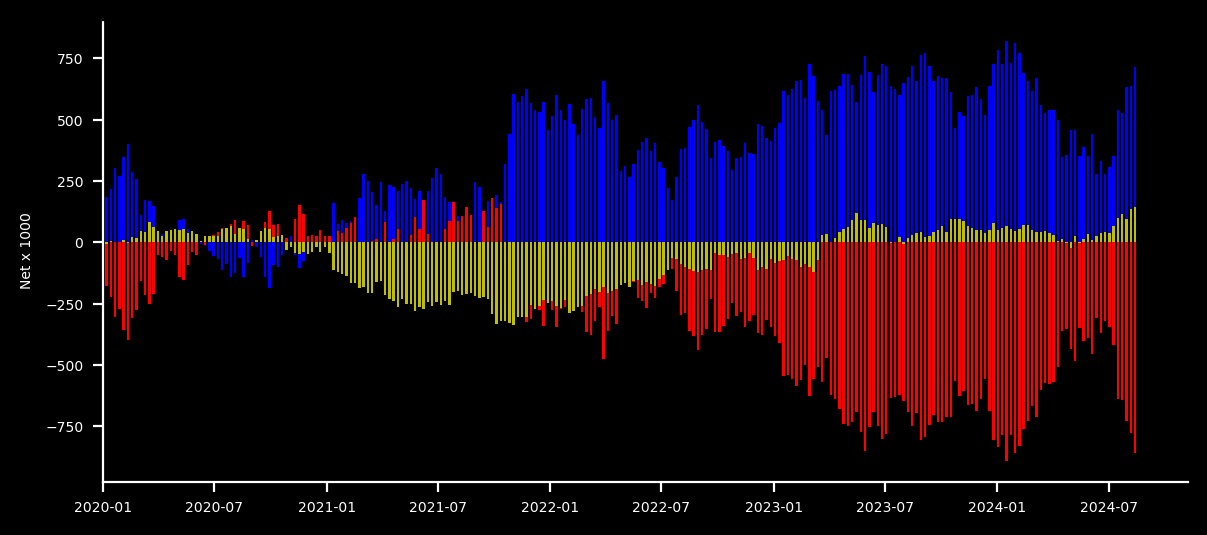

ULTRA 10-YEAR NOTES


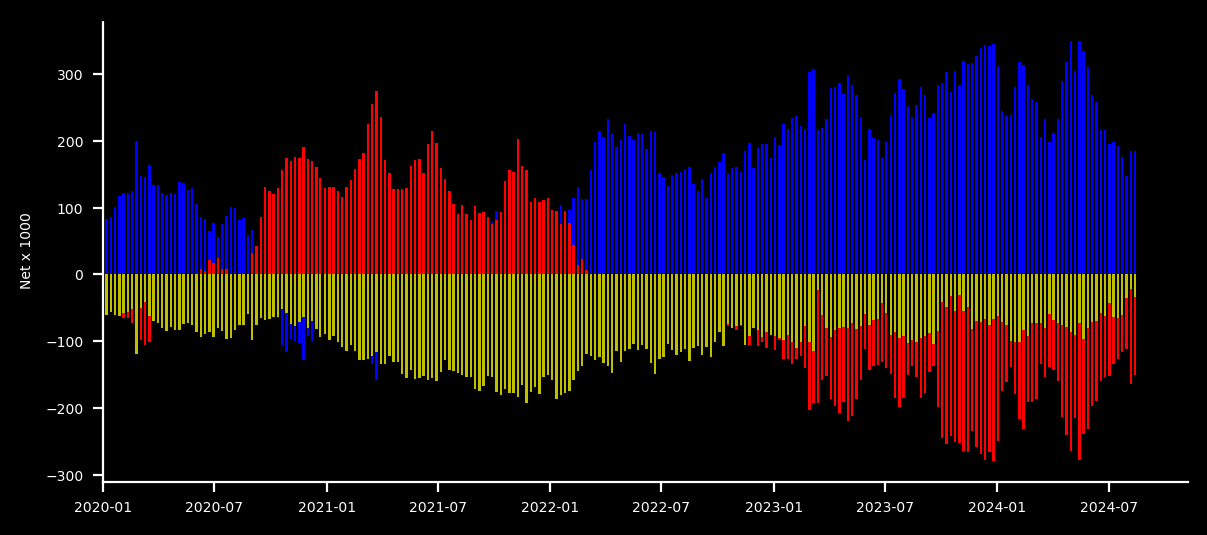

30-YEAR BONDS


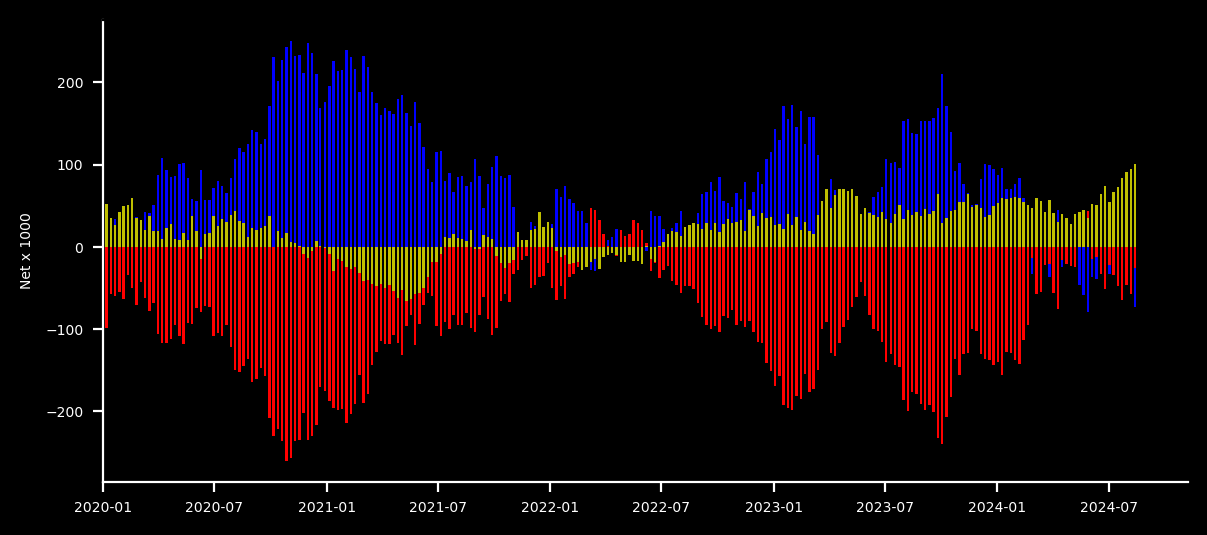

ULTRA 30-YEAR BONDS


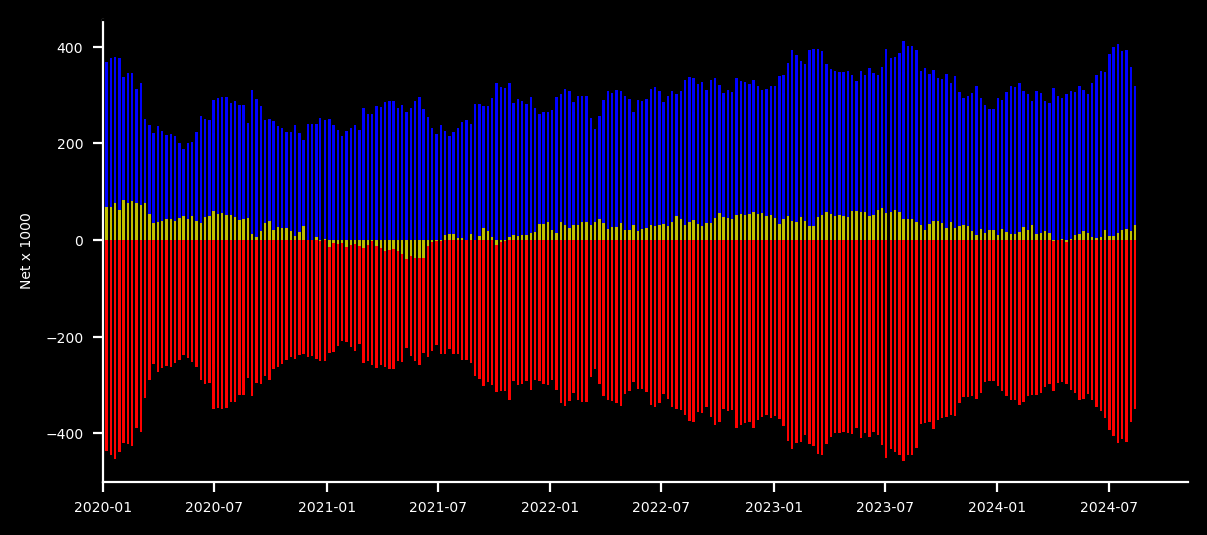

USD INDEX


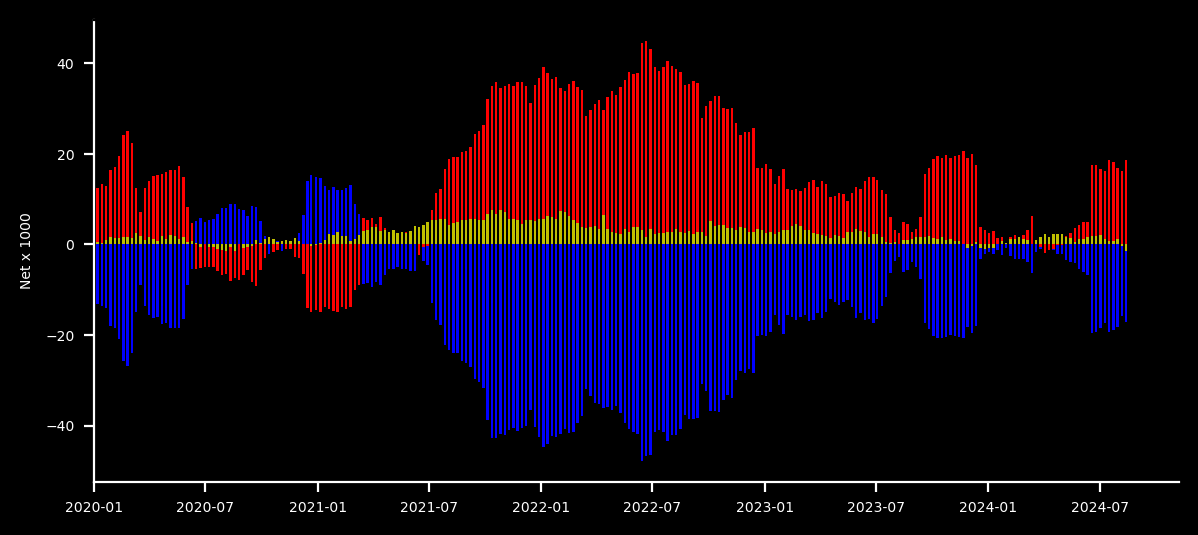

EURO FX


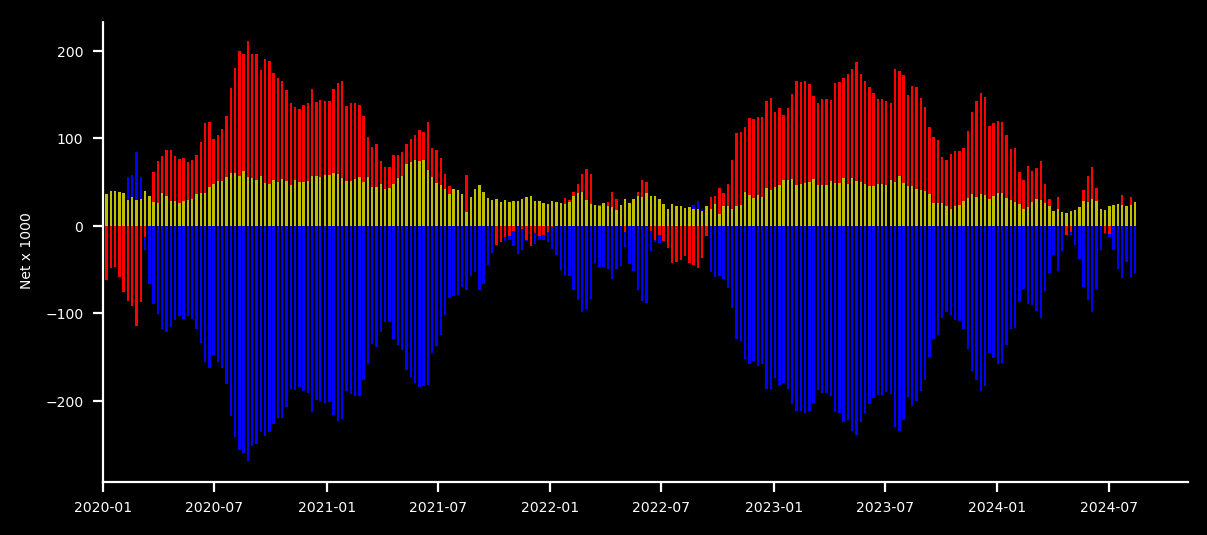

BRITISH POUND


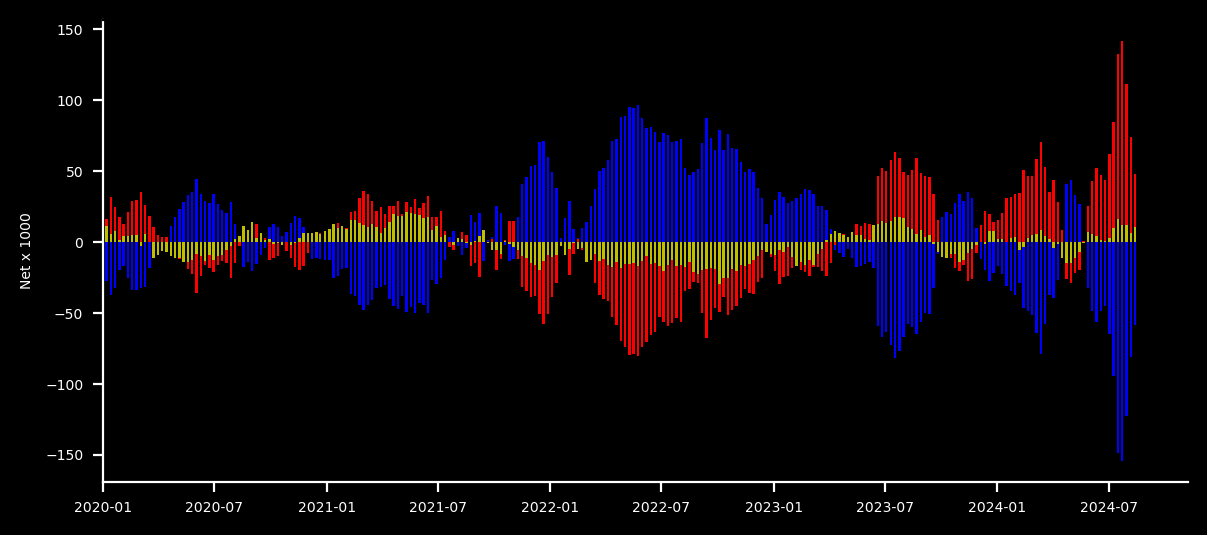

JAPANESE YEN


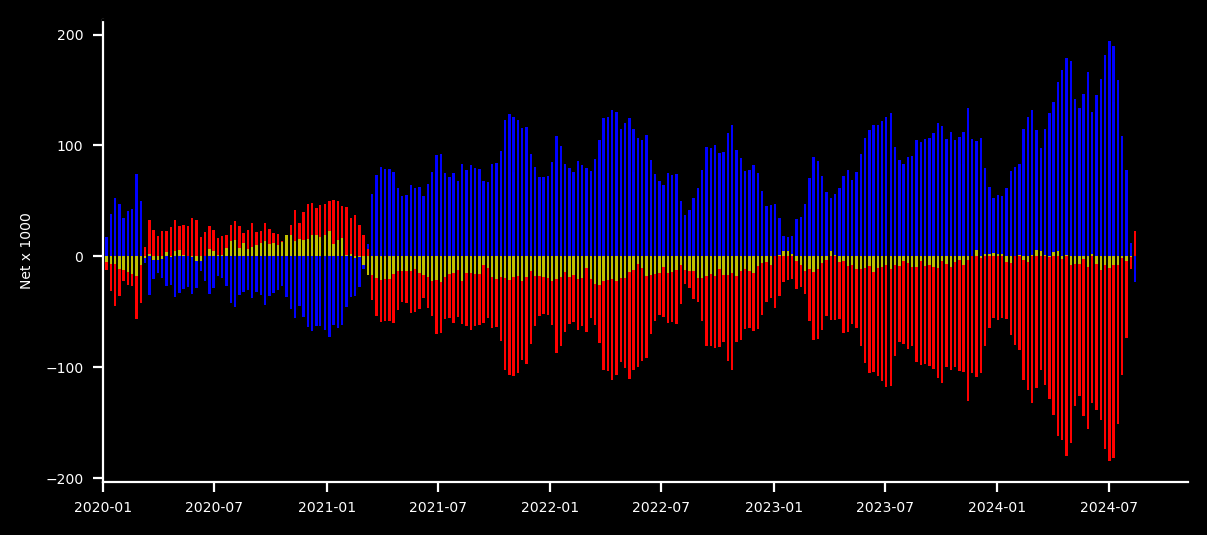

SWISS FRANC


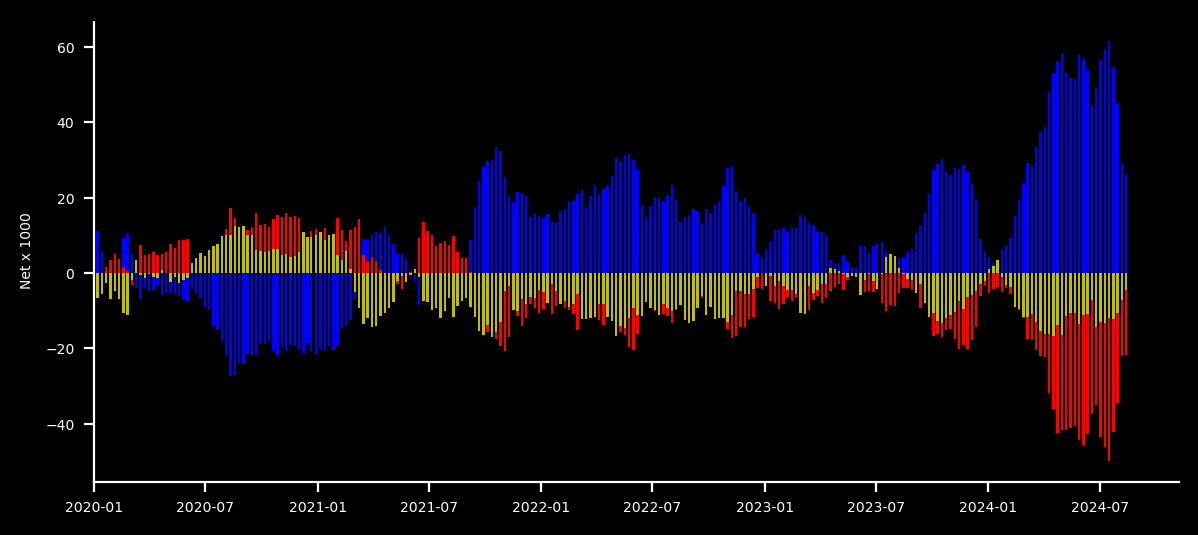

CANADIAN DOLLAR


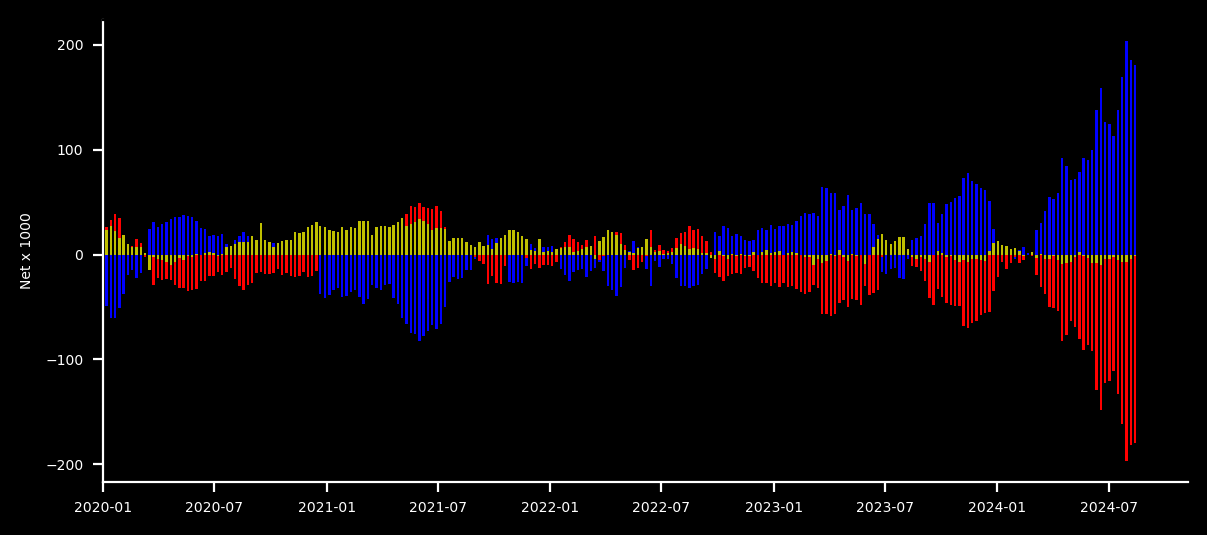

AUSTRALIAN DOLLAR


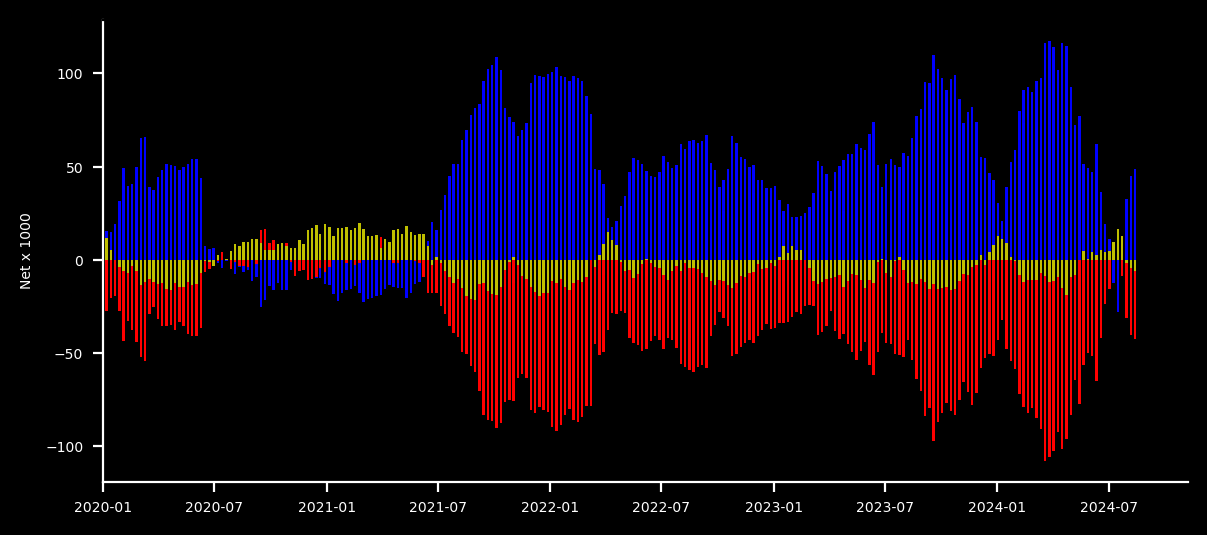

NEW ZEALAND DOLLAR


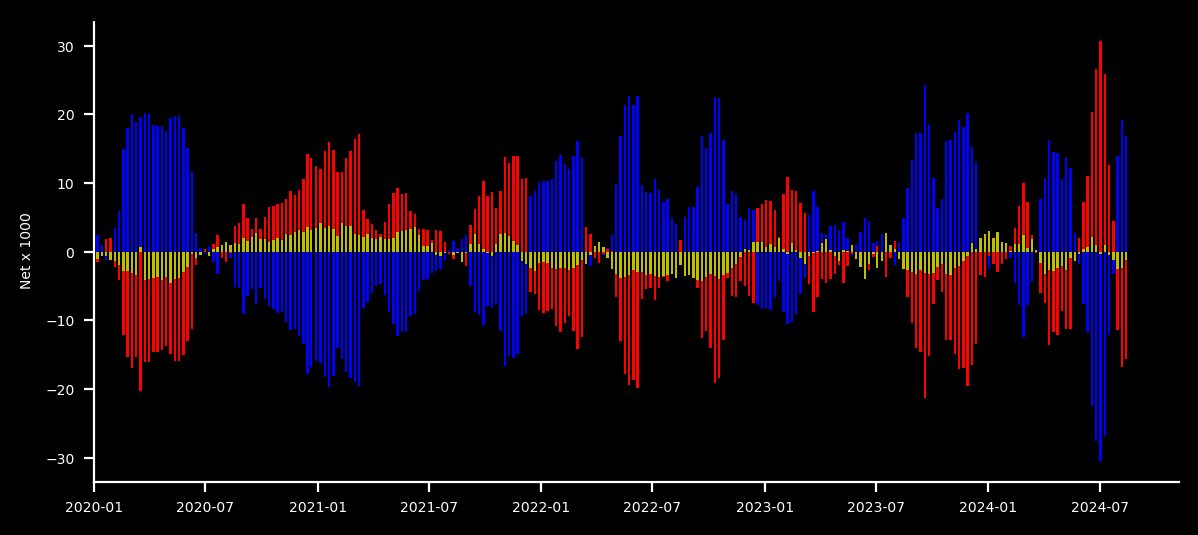

MEXICAN PESO


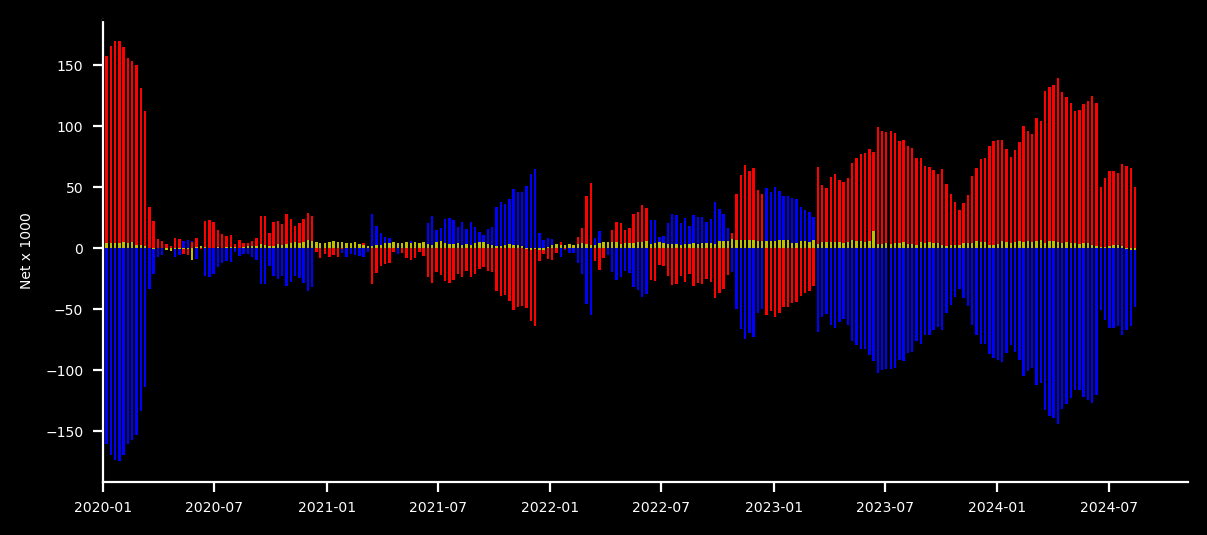

BRAZILIAN REAL


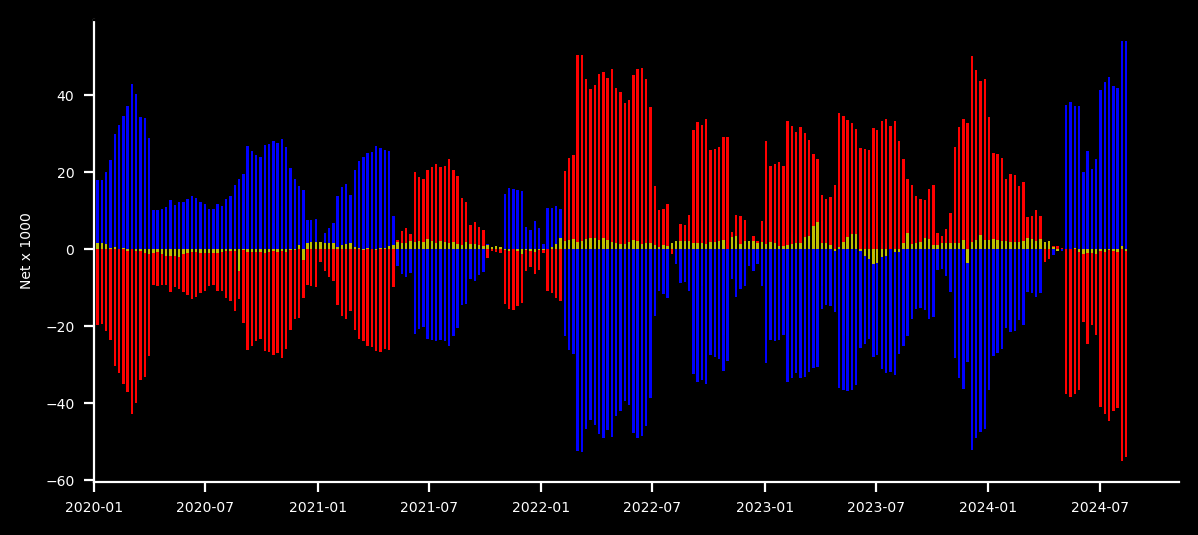

SOUTH AFRICAN RAND


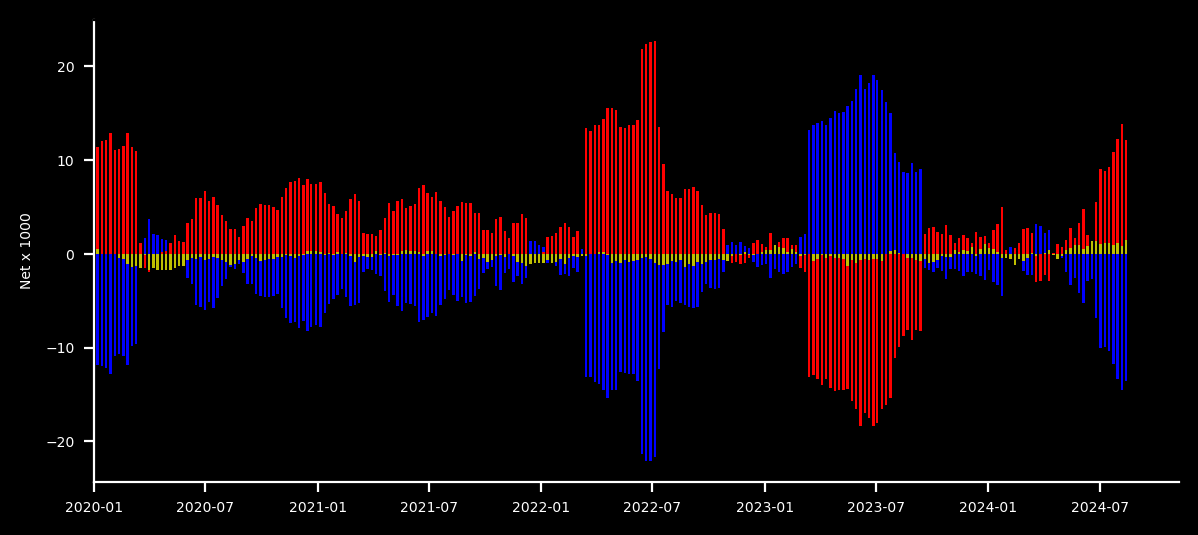

BITCOIN


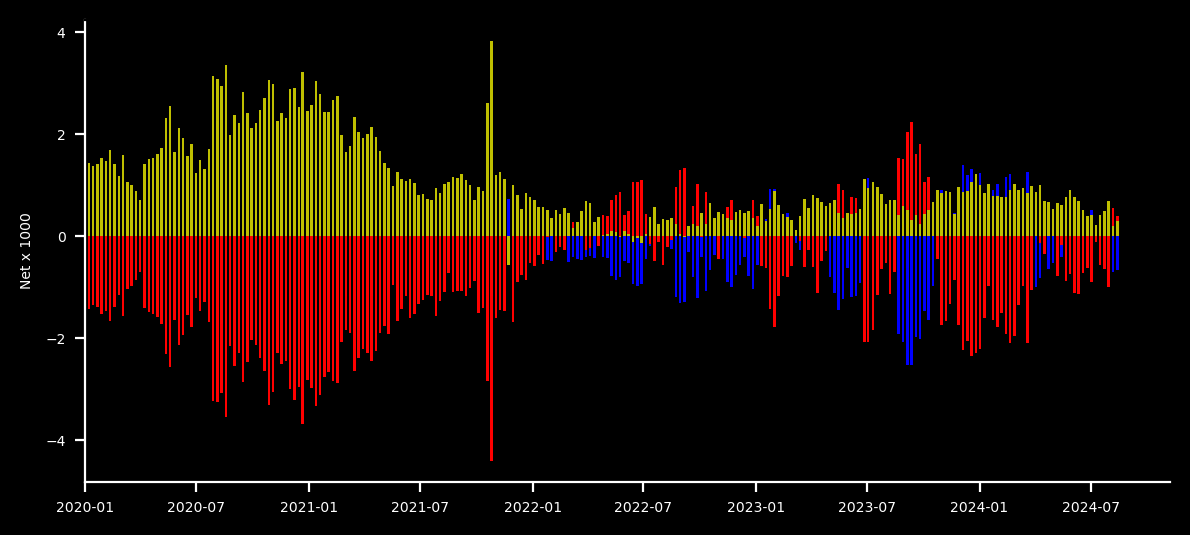

ETHEREUM


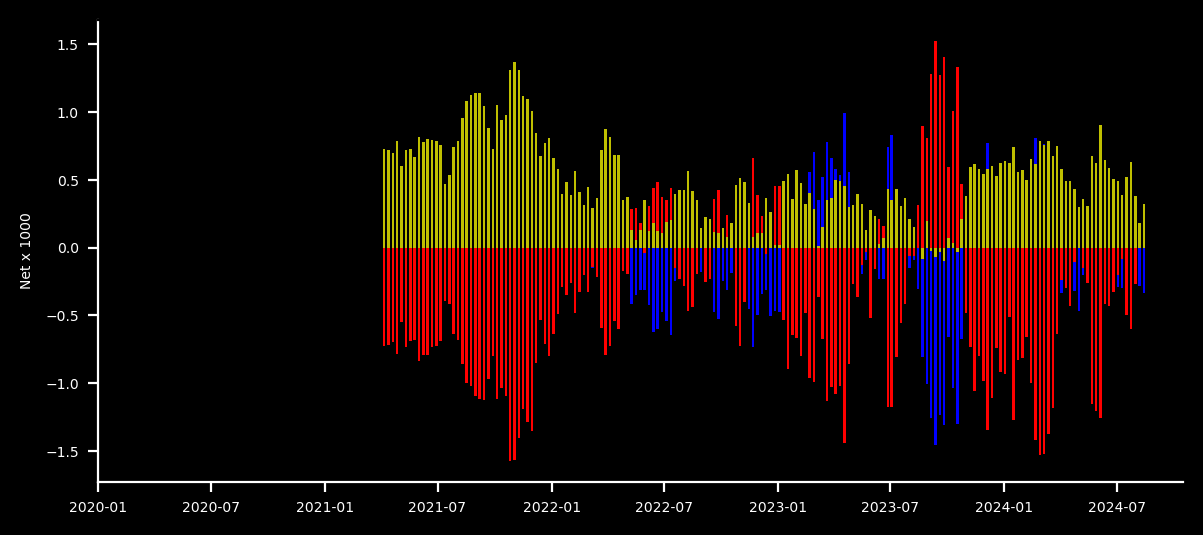

BBG COMMODITY INDEX


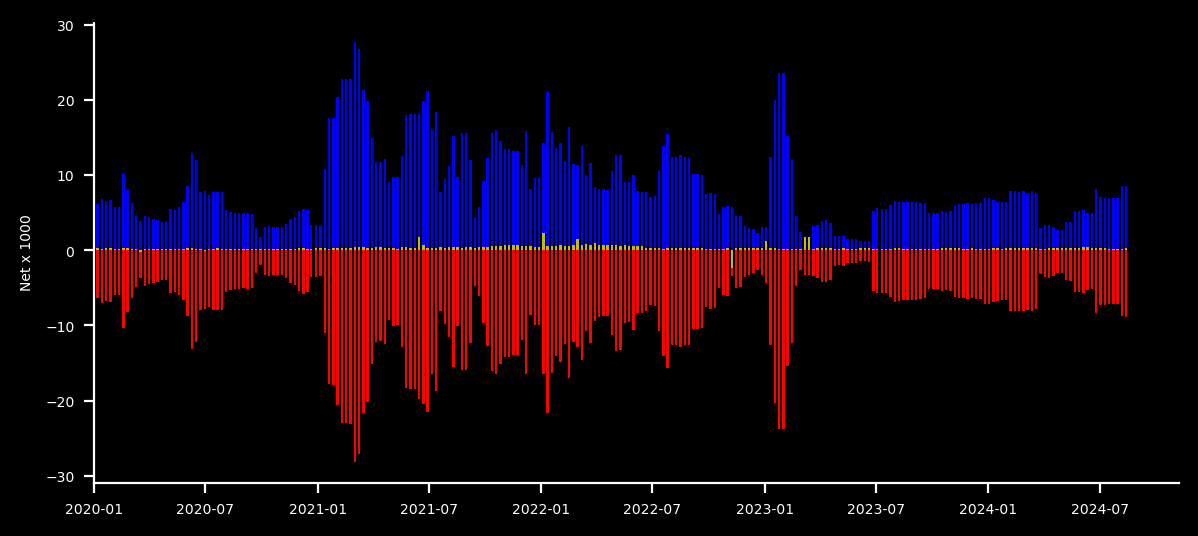

CRUDE OIL


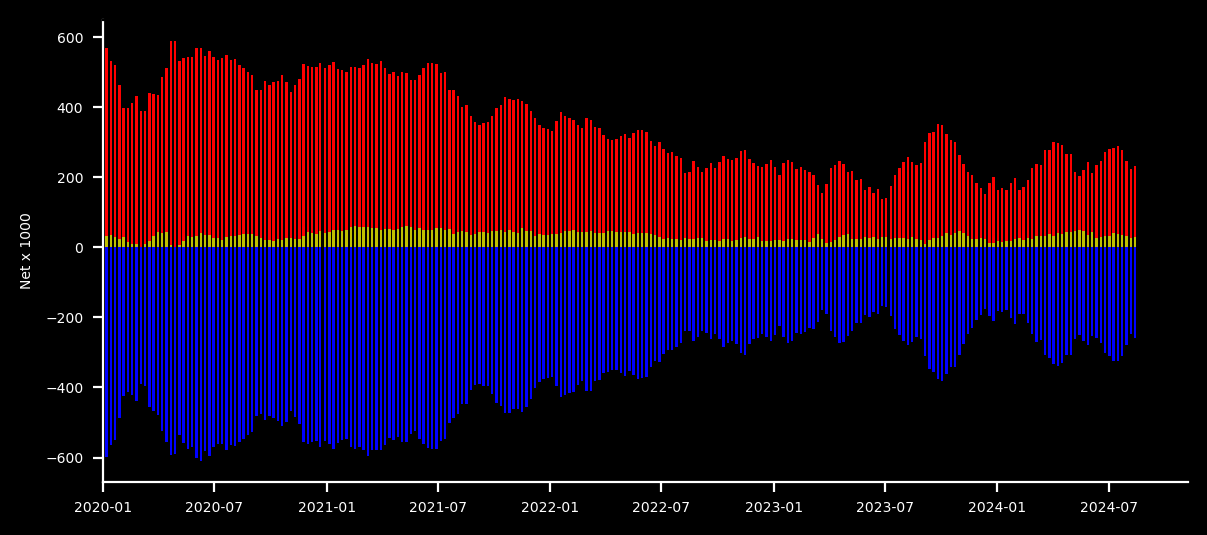

BRENT CRUDE OIL


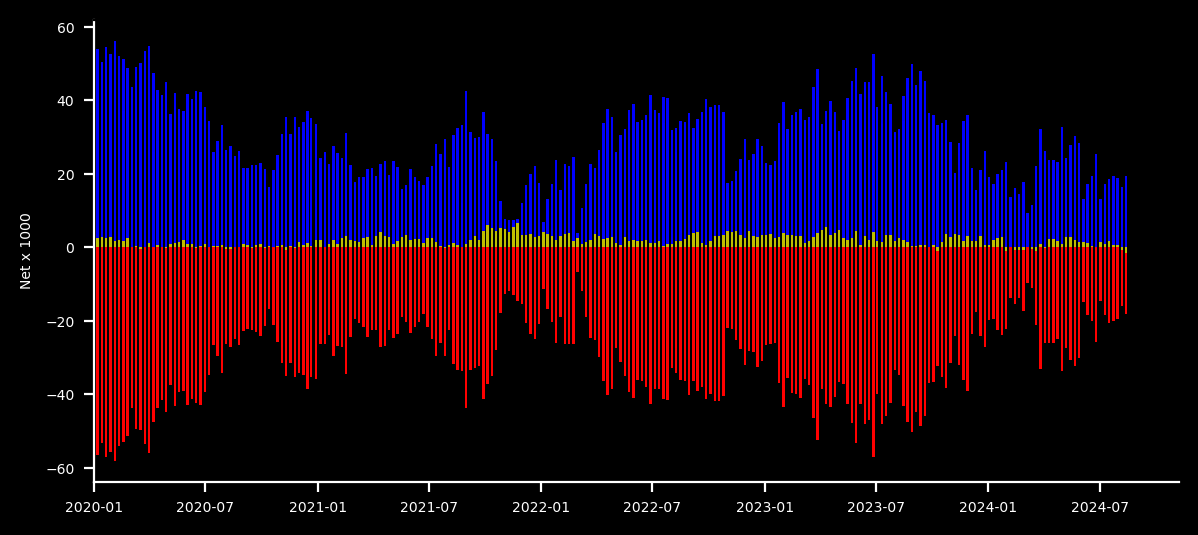

GASOLINE RBOB


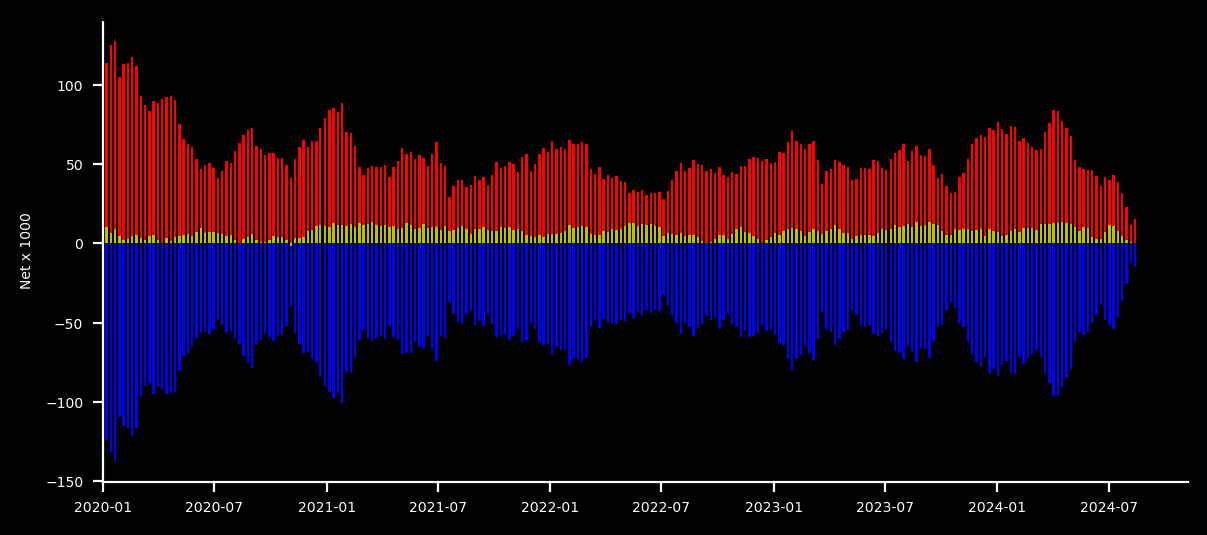

HEATING OIL


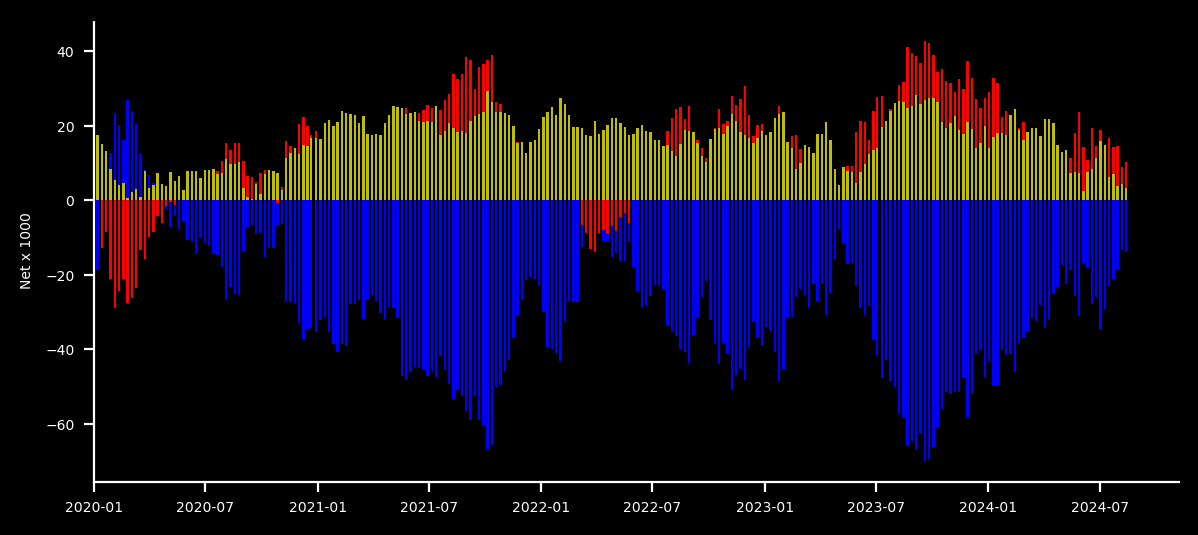

NATURAL GAS


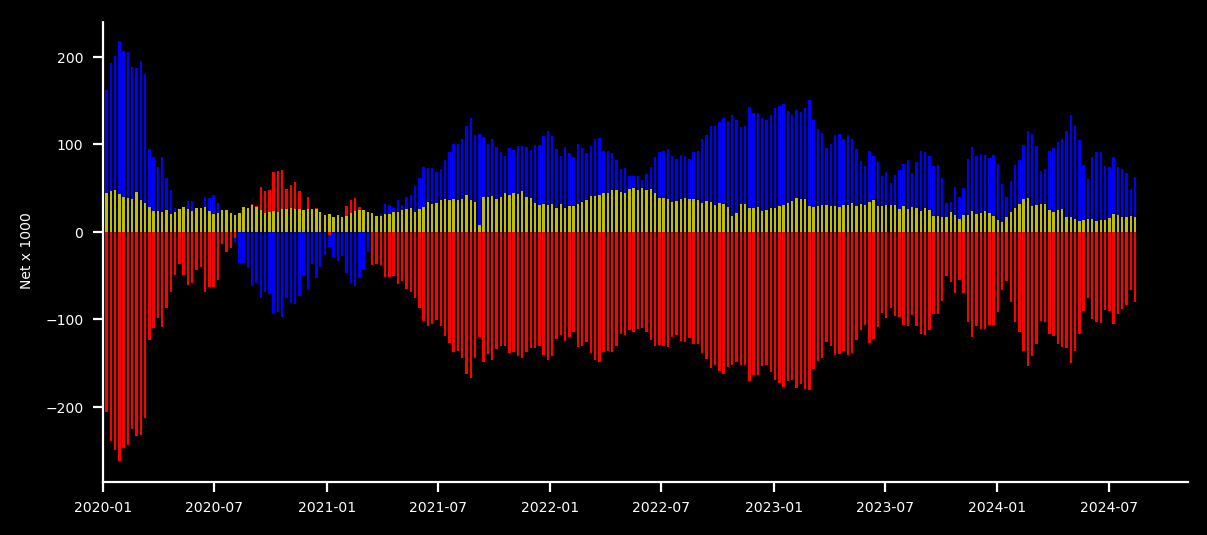

GOLD


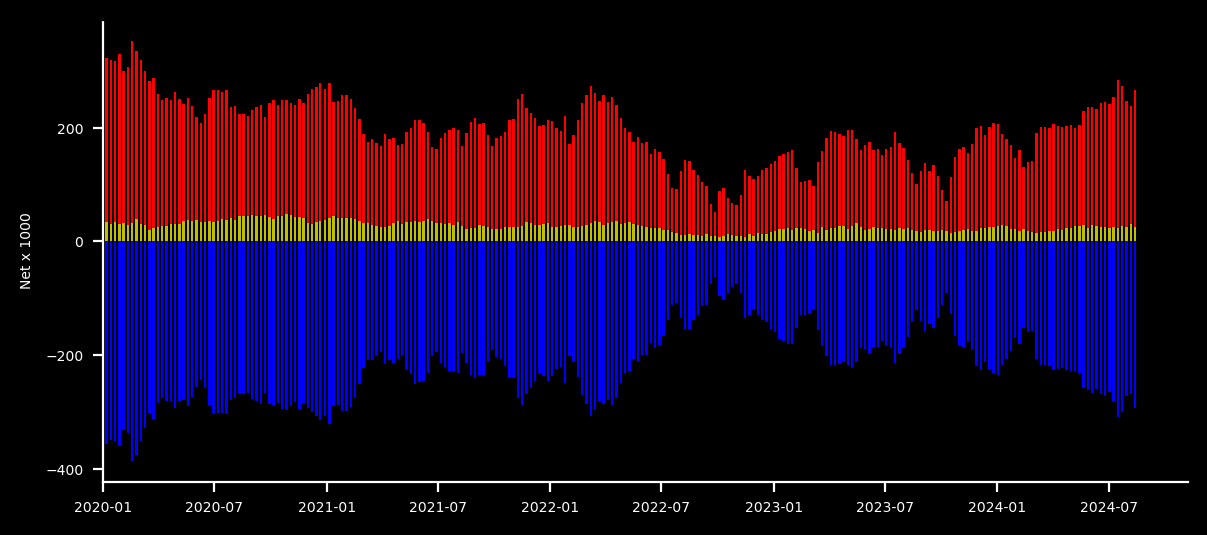

PLATINUM


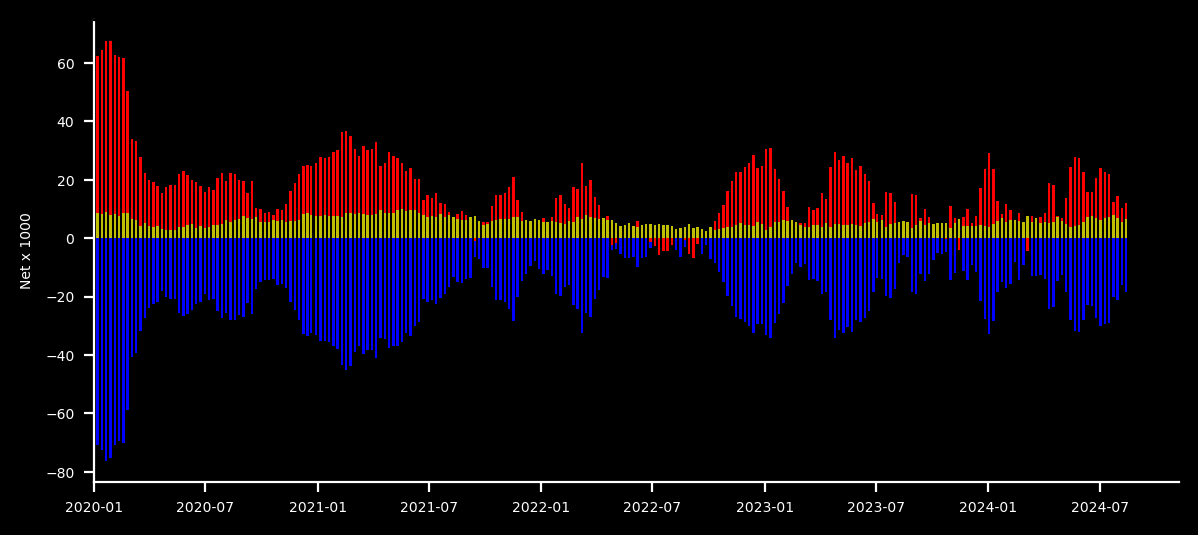

PALLADIUM


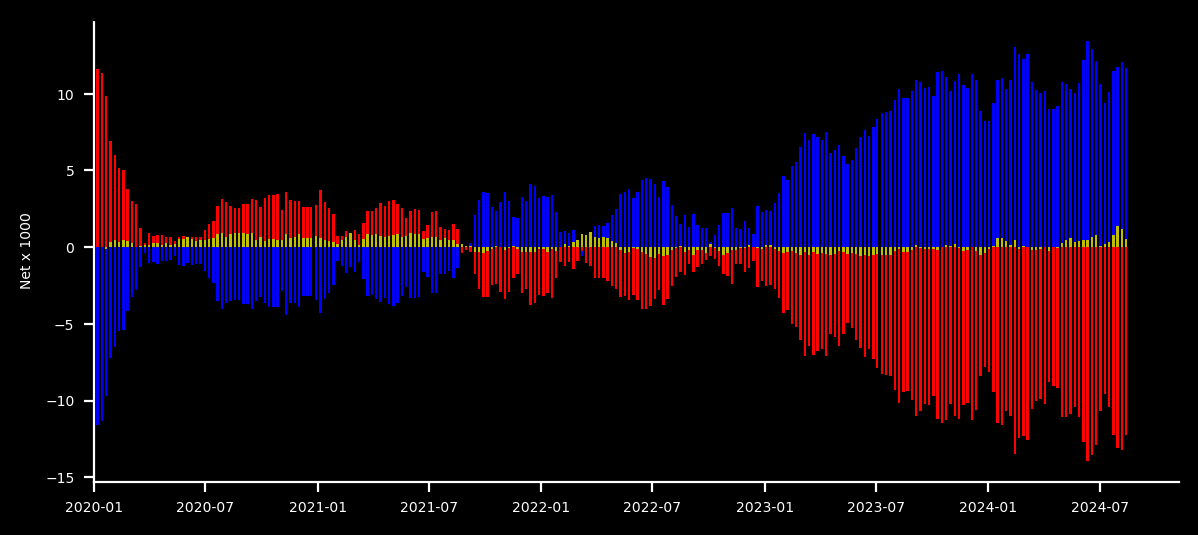

SILVER


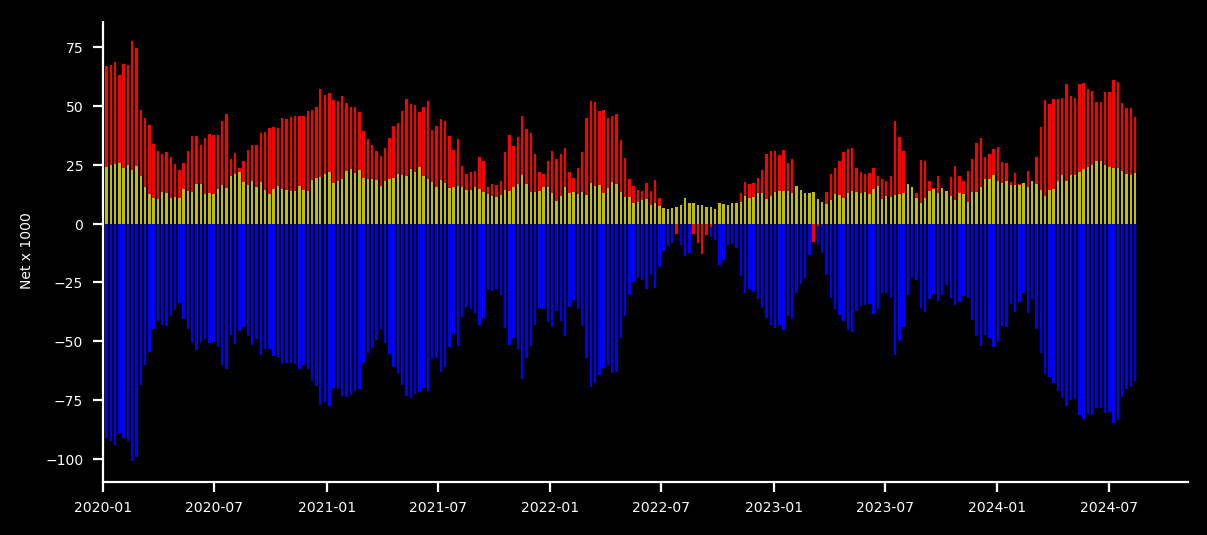

COPPER


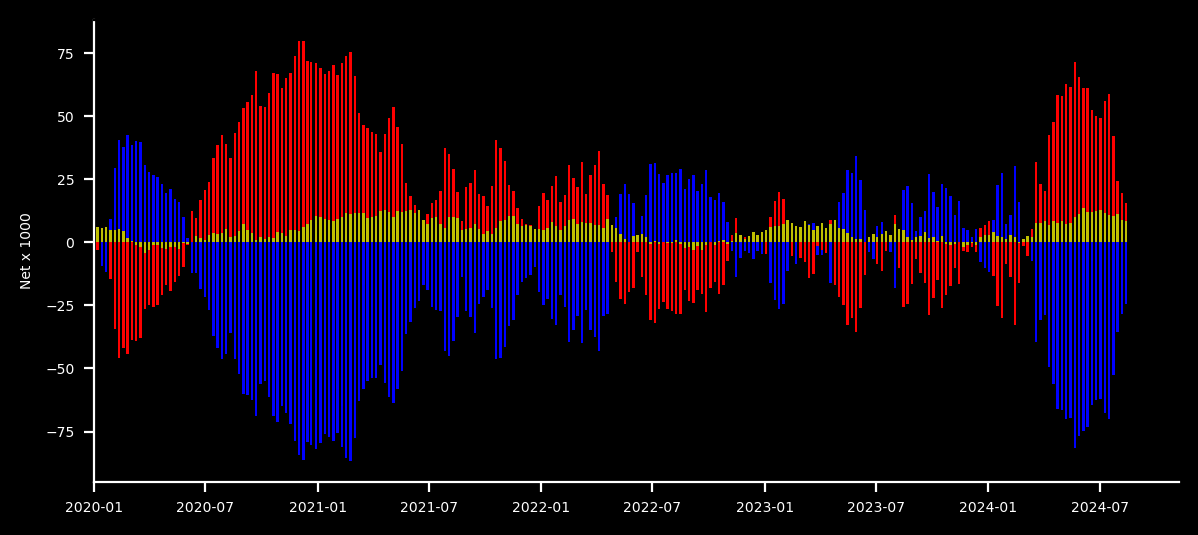

ALUMINUM


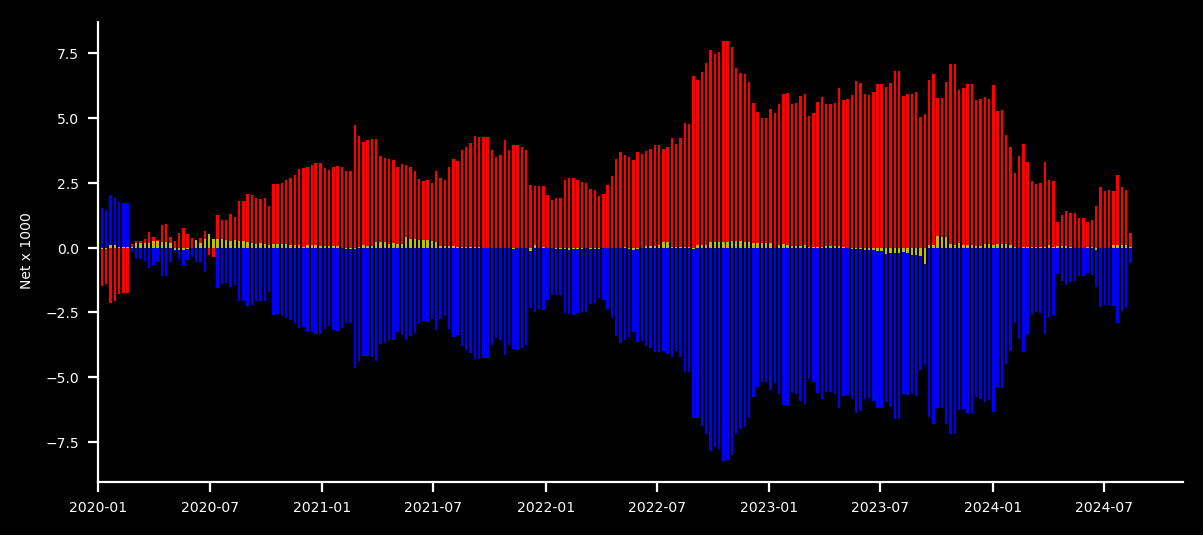

STEEL


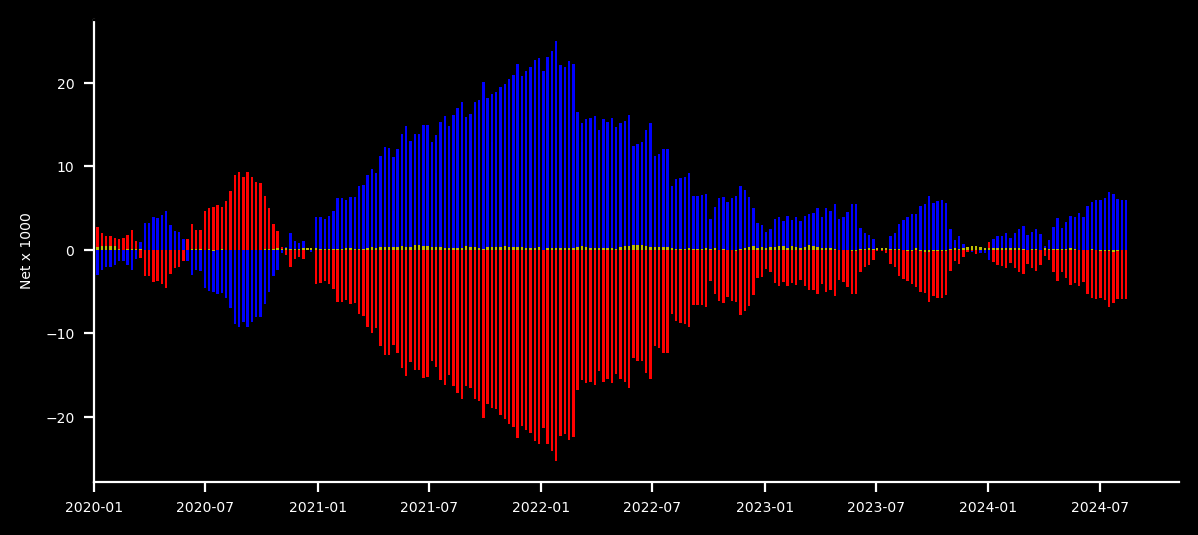

COCOA


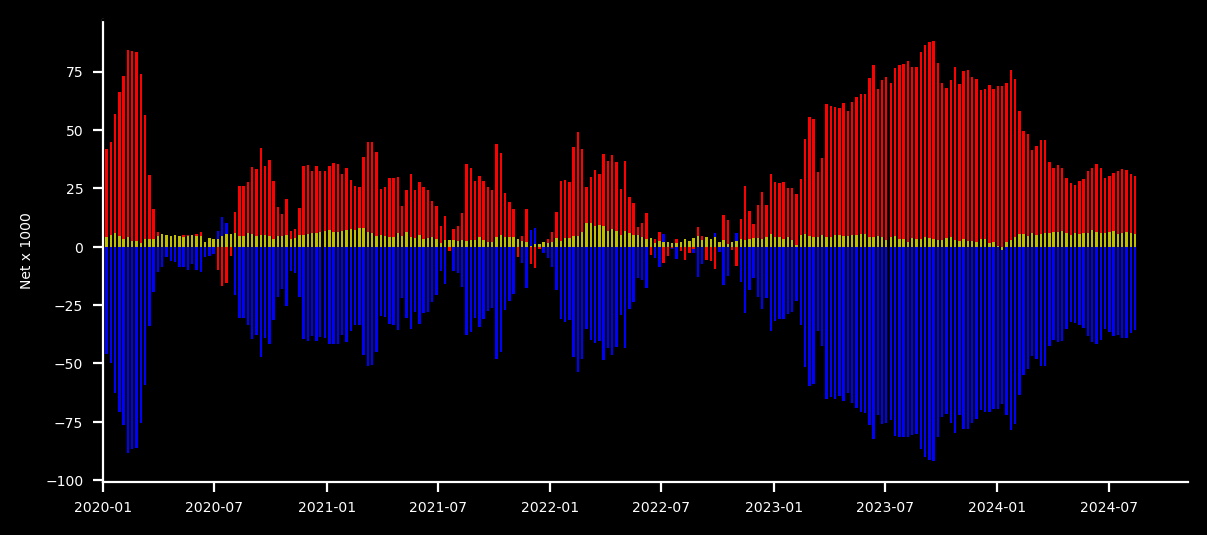

COFFEE


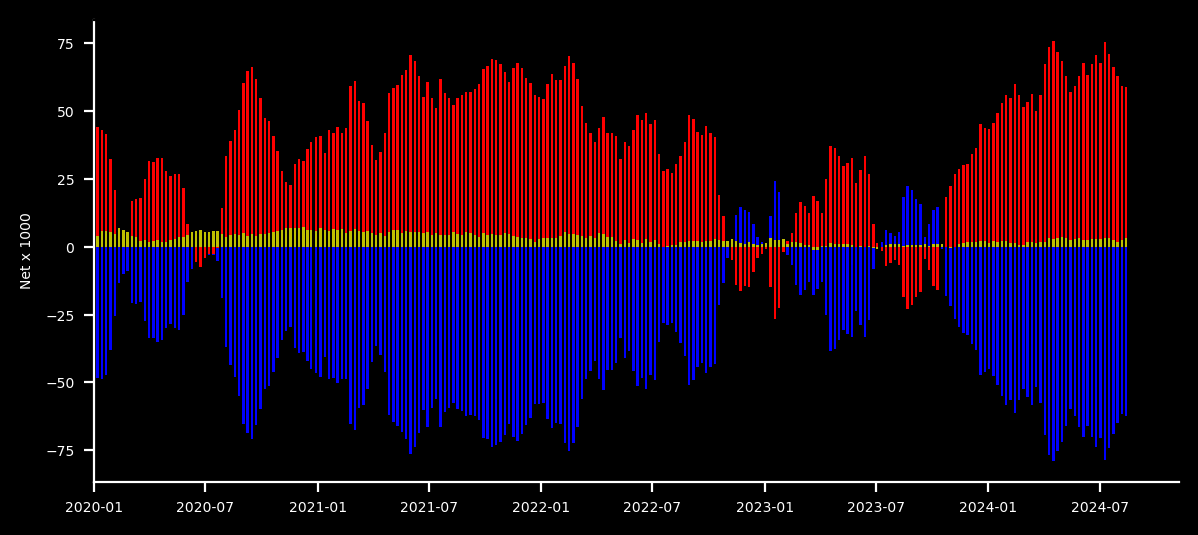

COTTON


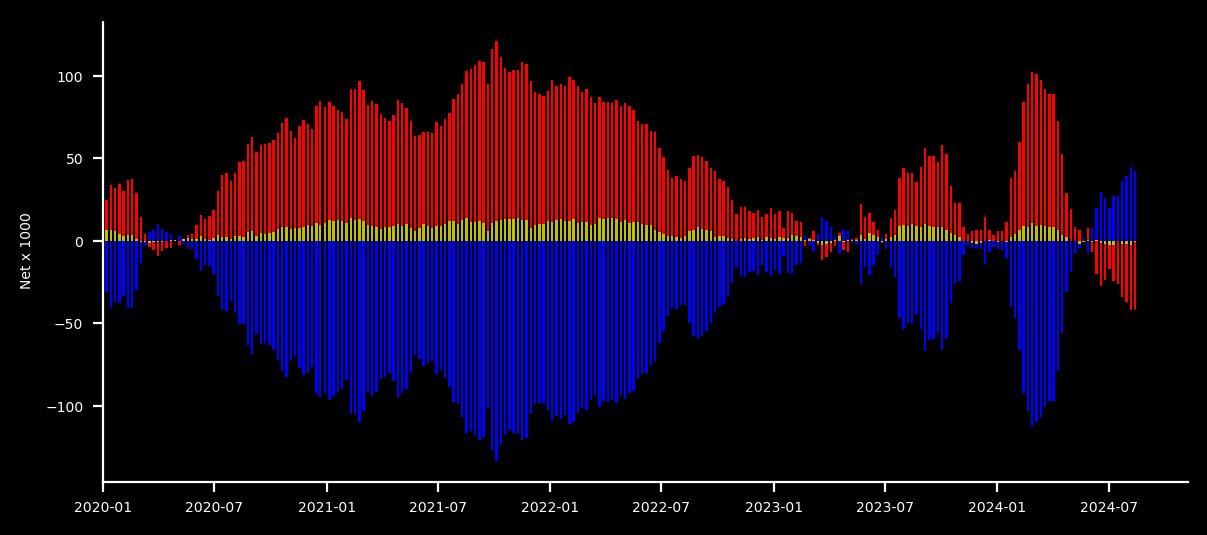

ORANGE JUICE


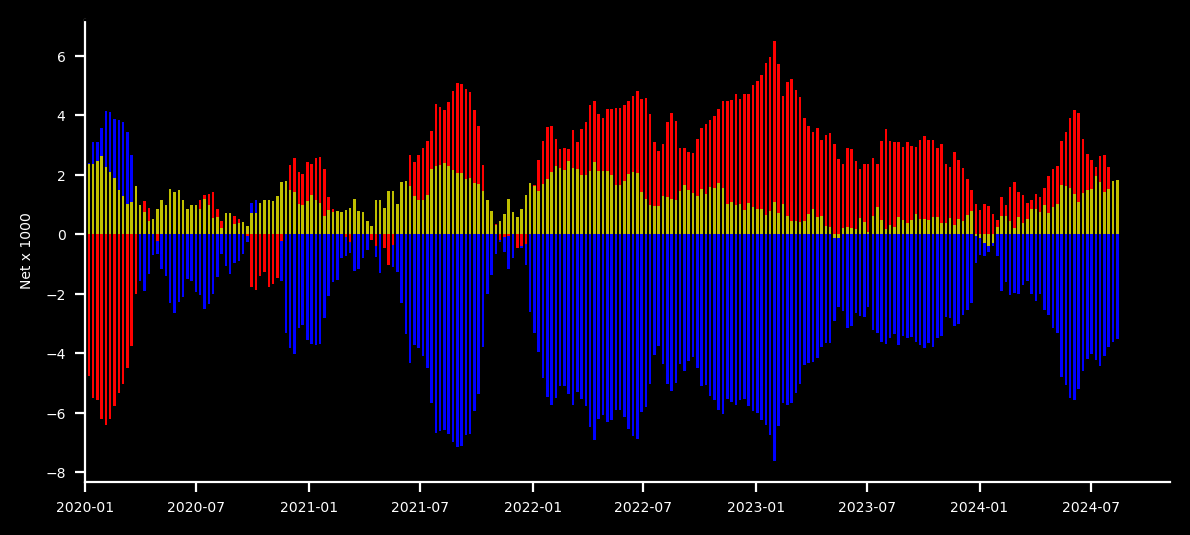

SUGAR


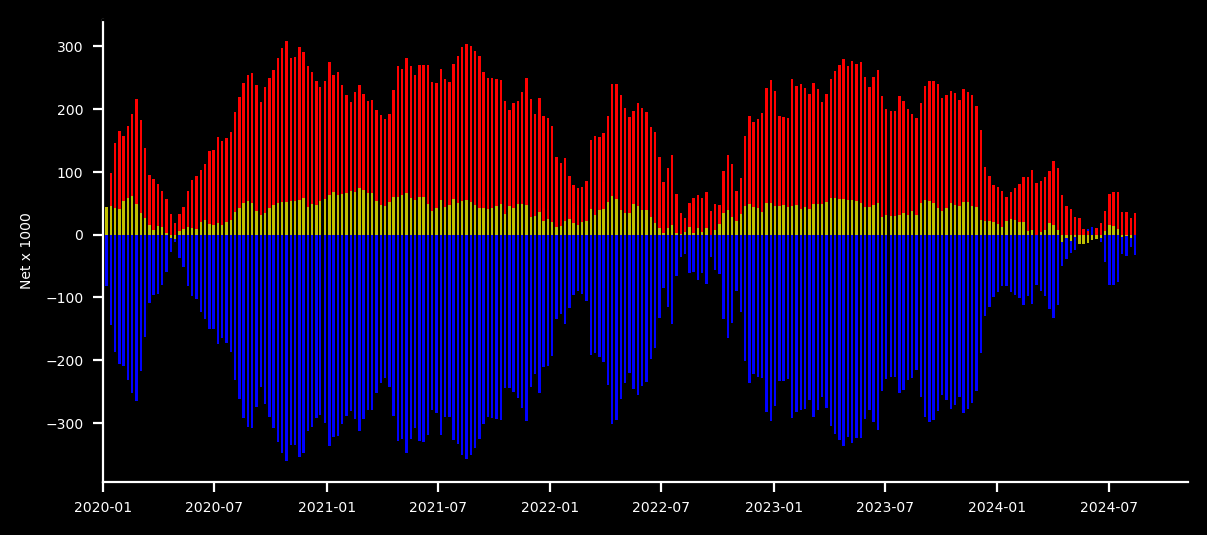

LUMBER


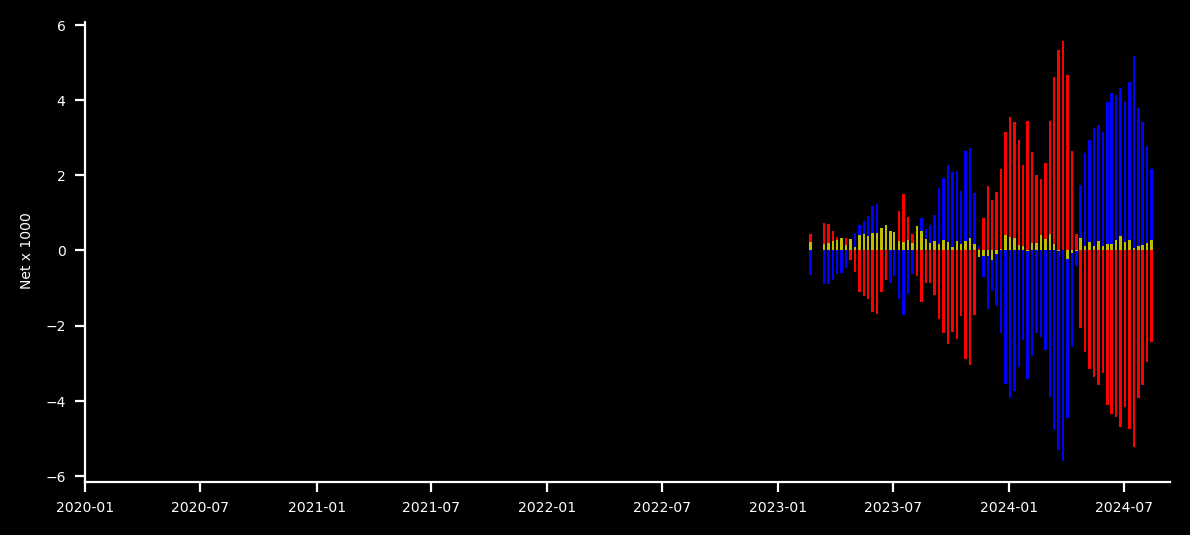

WHEAT-SRW


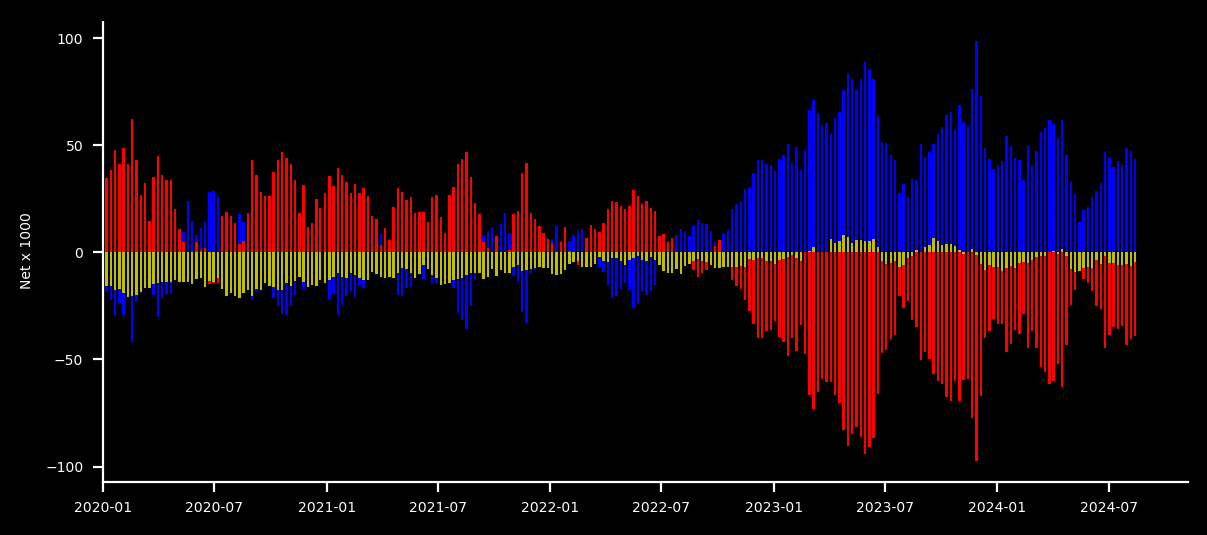

WHEAT-HRW


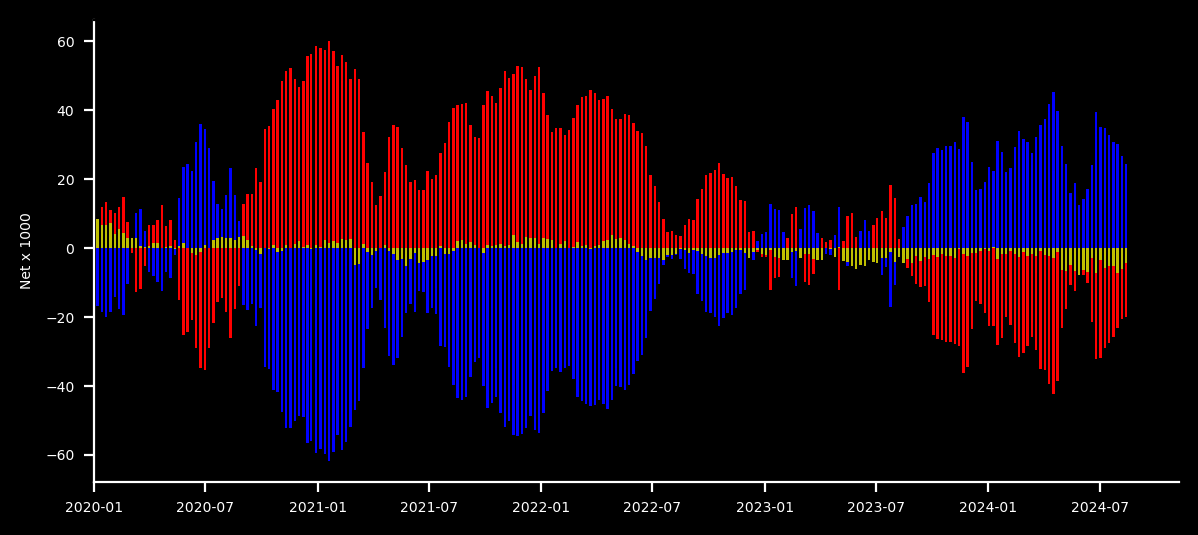

CORN


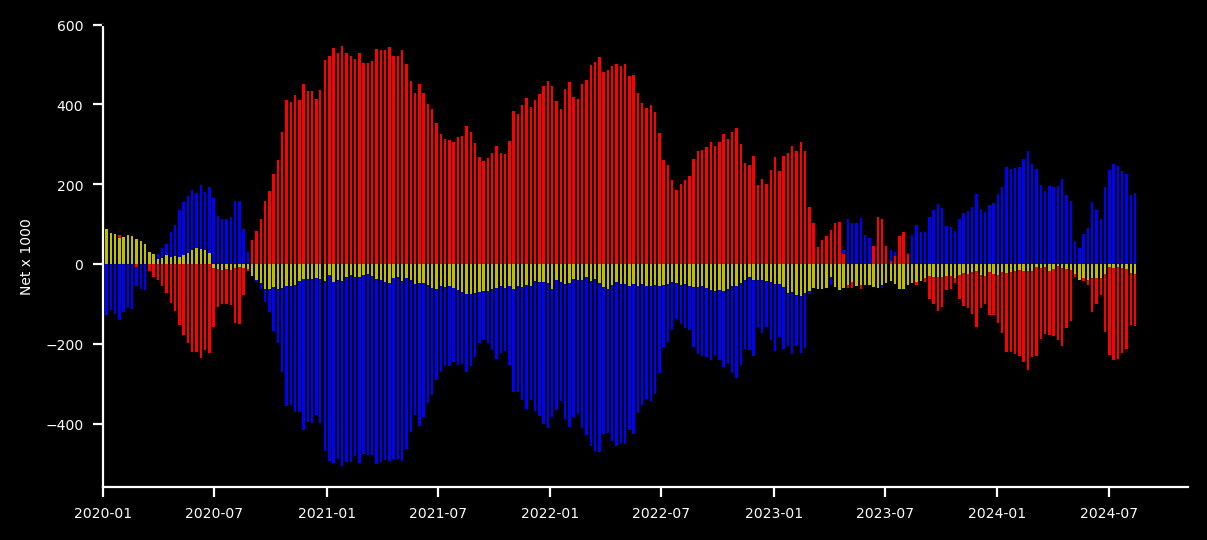

SOYBEANS


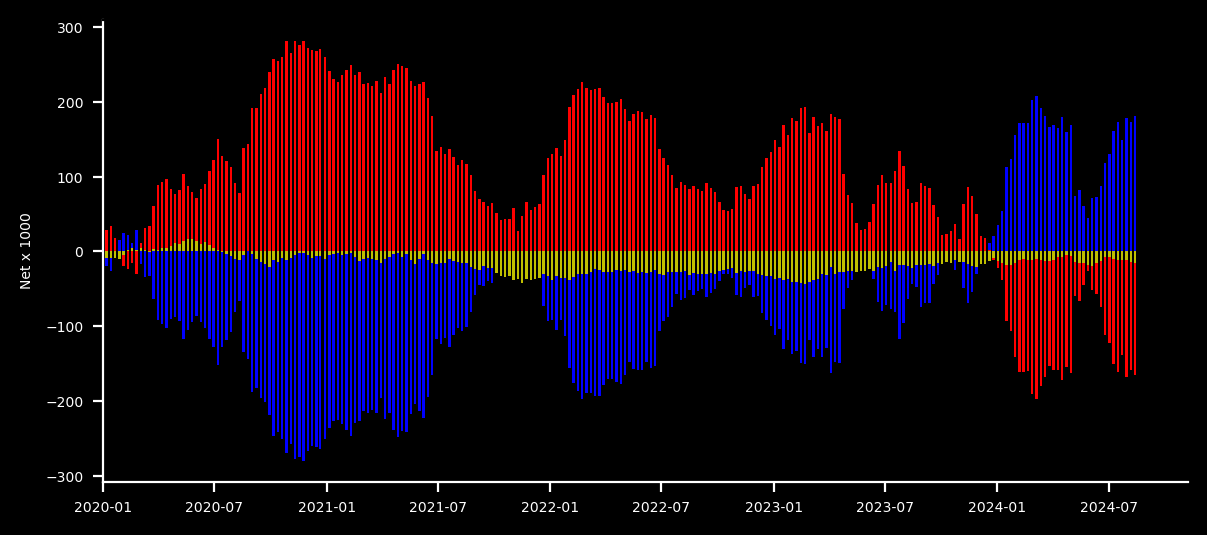

SOYBEAN MEAL


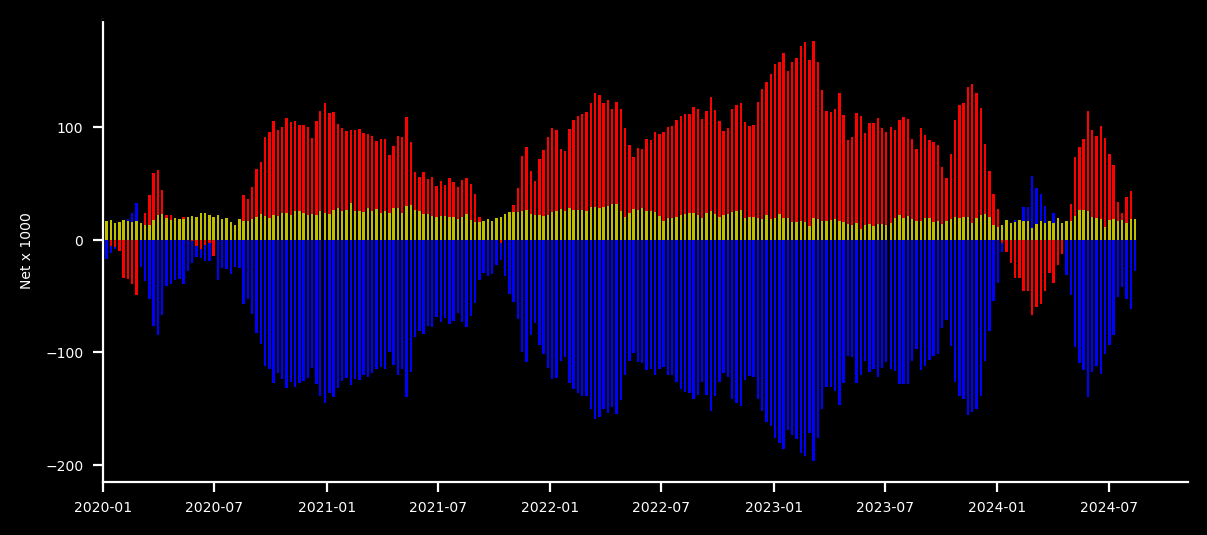

SOYBEAN OIL


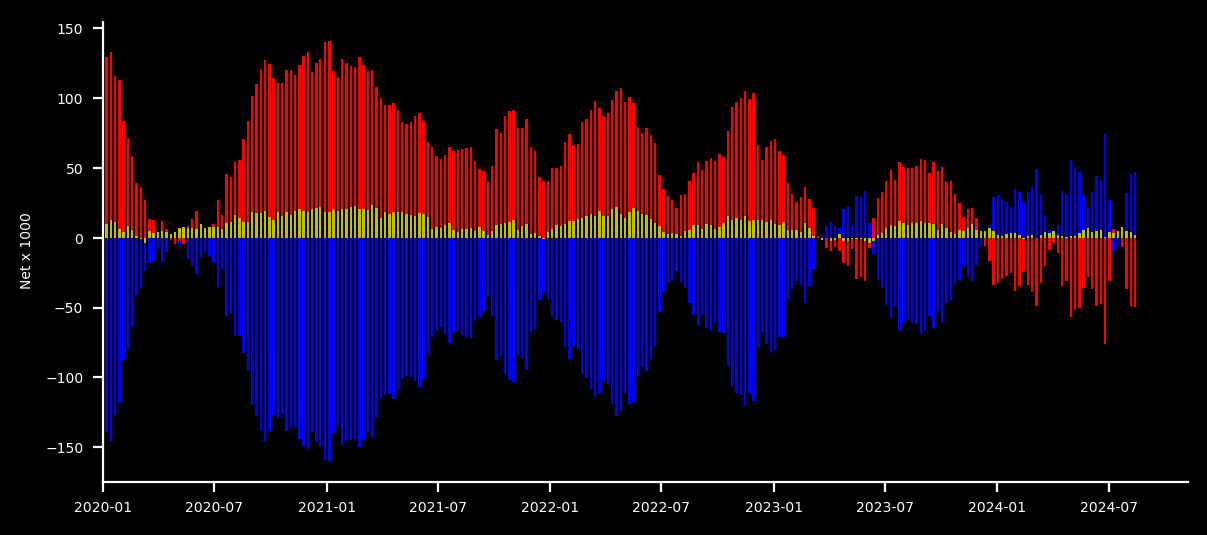

CANOLA


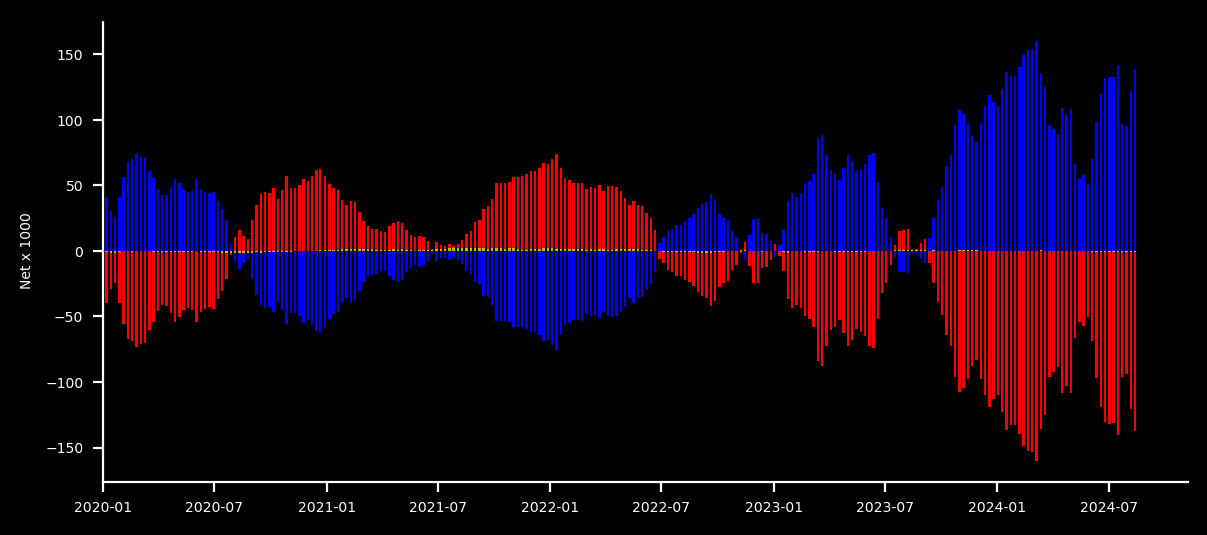

ROUGH RICE


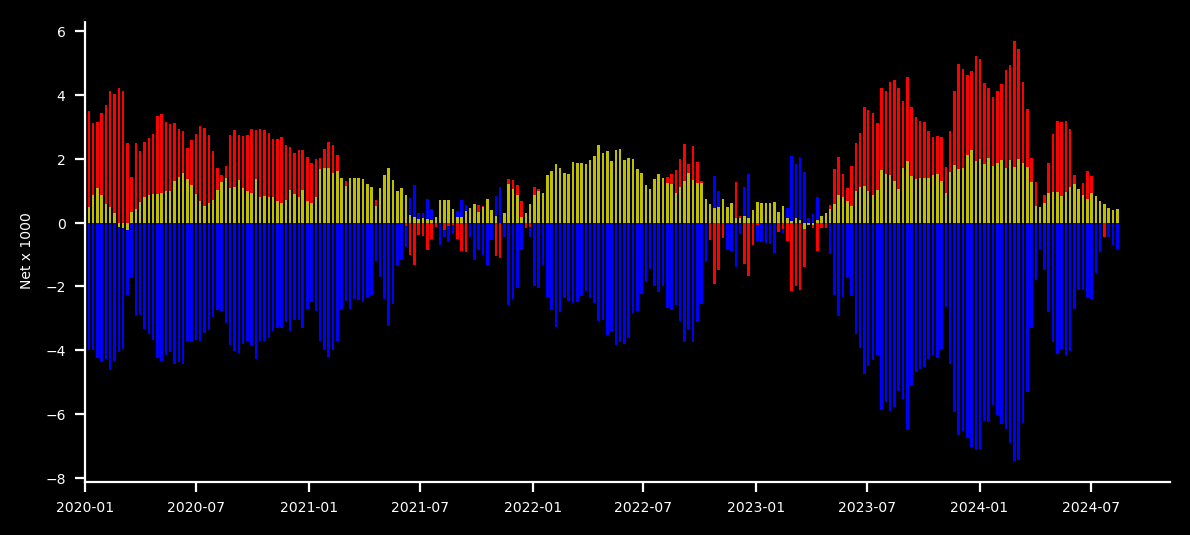

OATS


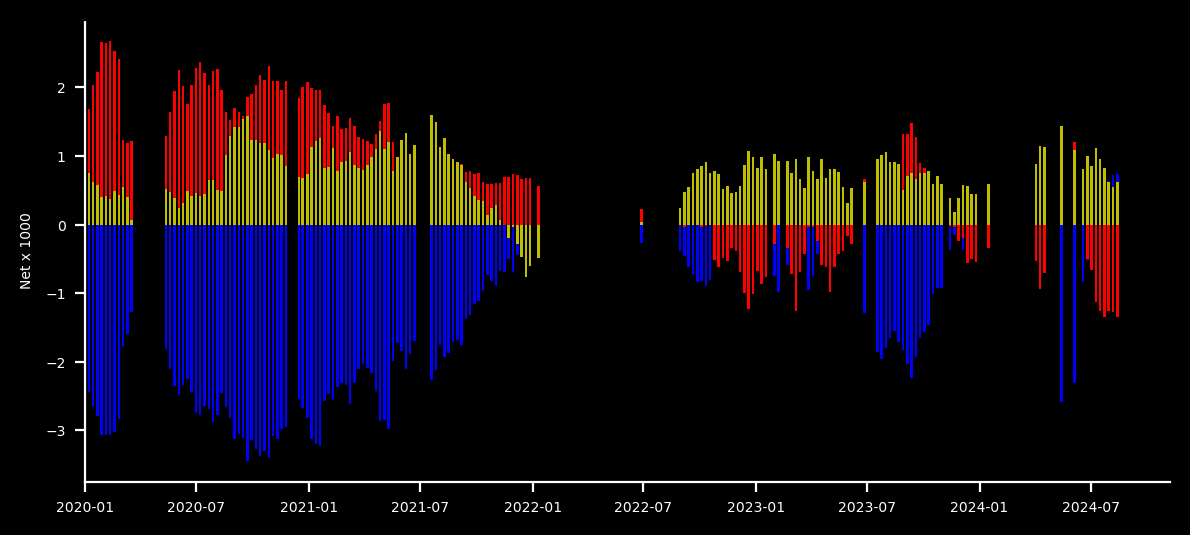

LEAN HOGS


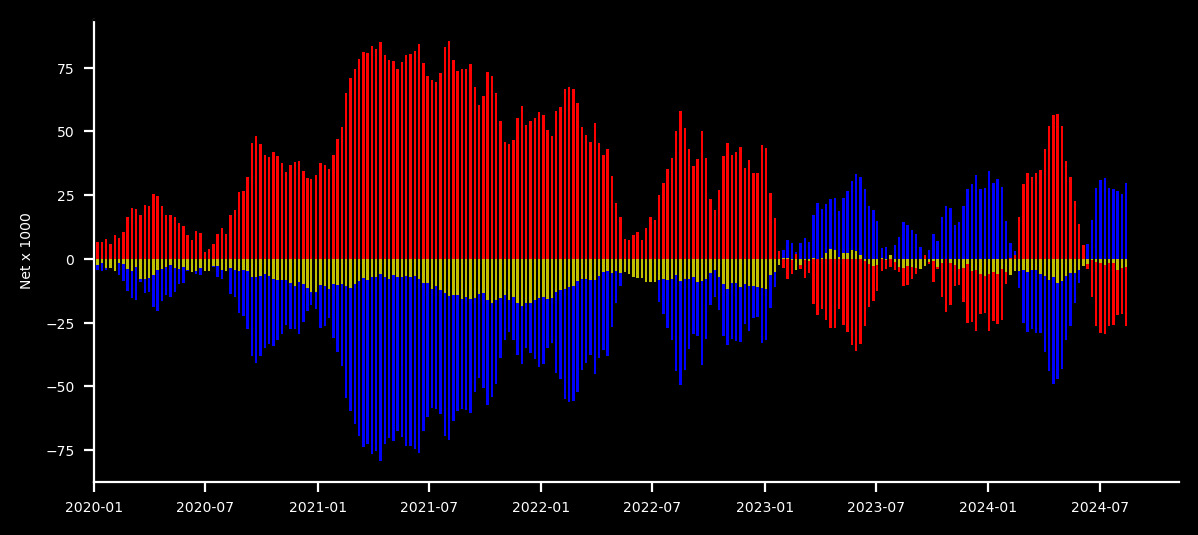

FEEDER CATTLE


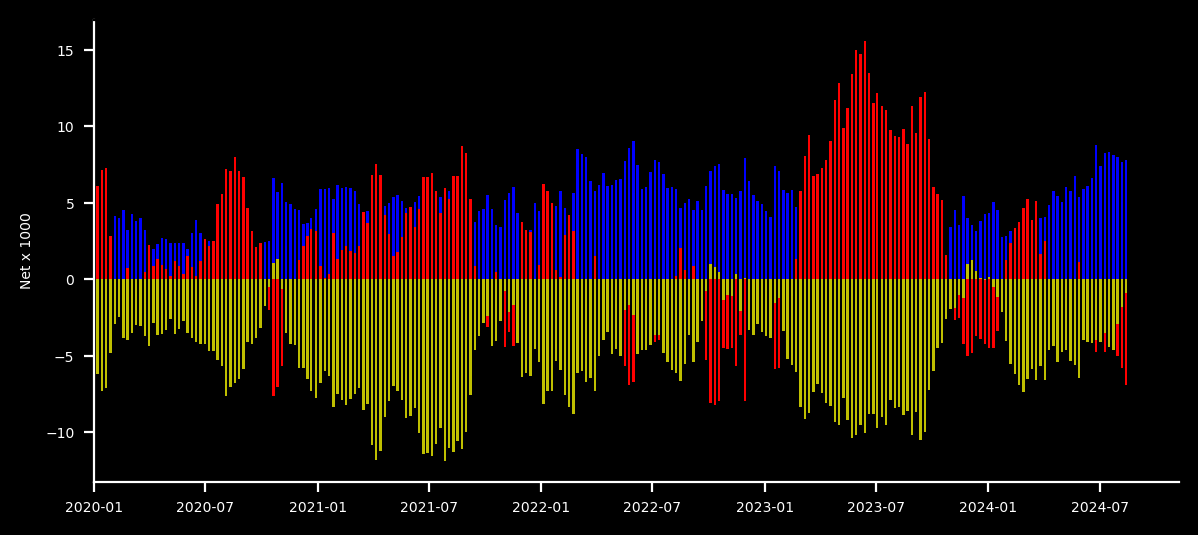

LIVE CATTLE


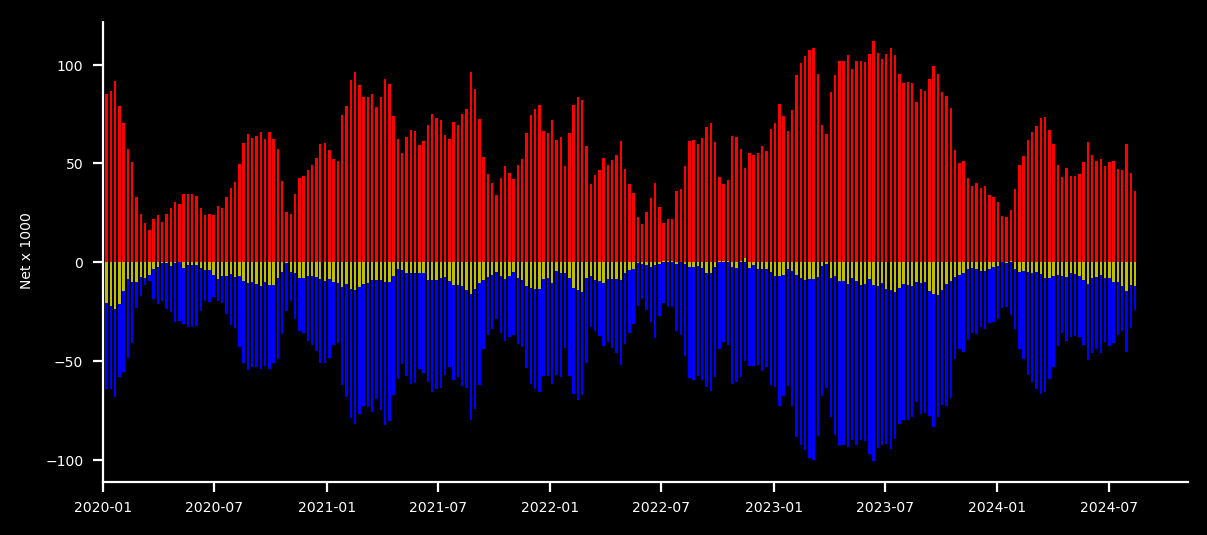

In [3]:
plot_net('2020-01-01')